# Project 2: Ames Housing Saleprice Challenge (Part 1)

## Problem Statement:

Housing prices are dependent upon many factors, the question therefore is to determine which features play a bigger impact on increasing or decreasing the overall housing sale price. Using the Ames housing data, the goal of this project is to create a regression model that is able to accurately predict the sale price of each house in Ames, IA. The evaluation of this project will be done through a Kaggle submission, with leaderboard standings determined by the root mean squared error (RMSE) of your predicted house sale price vs. the actual house sale price.

## Executive Summary

### Contents (Part 1):
- [1. Importing the Libraries](#1.-Importing-the-Libraries)
- [2. Importing Training dataset](#2.-Importing-The-dataset)
- [3. Manual Inspection of Dataset](#3.-Manual-Inspection-of-Dataset)
- [4. Data Cleaning](#4.-Data-Cleaning)
- [5. Experimental Data Analysis (EDA)](#5.-Experimental-Data-Analysis-(EDA))

## 1. Importing the Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Importing Training dataset

In [2]:
# Opening training data

df_train = pd.read_csv("./datasets/train.csv")

In [3]:
# Training dataset imported

df_train.head(3)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  

[3 rows x 81 columns]

## 3. Manual Inspection of Dataset

In [4]:
# Determining the number of rows and columns in this dataset

df_train.shape

(2051, 81)

### 3.1) First 20 features

In [5]:
# There are a total of 81 features
# Viewing the first 20

df_train.iloc[:, :20].head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  
0        RRAe        Norm      1Fam      2Story             6             8  
1        Norm        Norm      1Fam      2Story             7             5  
2        Norm        Norm      1Fam      1Story             5             7  
3        Norm        Norm      1Fam      2Story             5             5  
4        Norm        Norm      1Fam      1.5Fin             6             8

In [6]:
df_train.iloc[:, :20].dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
Alley            object
Lot Shape        object
Land Contour     object
Utilities        object
Lot Config       object
Land Slope       object
Neighborhood     object
Condition 1      object
Condition 2      object
Bldg Type        object
House Style      object
Overall Qual      int64
Overall Cond      int64
dtype: object

In [7]:
df_train.iloc[:, :20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
Id              2051 non-null int64
PID             2051 non-null int64
MS SubClass     2051 non-null int64
MS Zoning       2051 non-null object
Lot Frontage    1721 non-null float64
Lot Area        2051 non-null int64
Street          2051 non-null object
Alley           140 non-null object
Lot Shape       2051 non-null object
Land Contour    2051 non-null object
Utilities       2051 non-null object
Lot Config      2051 non-null object
Land Slope      2051 non-null object
Neighborhood    2051 non-null object
Condition 1     2051 non-null object
Condition 2     2051 non-null object
Bldg Type       2051 non-null object
House Style     2051 non-null object
Overall Qual    2051 non-null int64
Overall Cond    2051 non-null int64
dtypes: float64(1), int64(6), object(13)
memory usage: 320.5+ KB


In [8]:
df_train.iloc[:, :20].describe(include="all").T

count unique     top  freq        mean          std          min  \
Id            2051    NaN     NaN   NaN     1474.03      843.981            1   
PID           2051    NaN     NaN   NaN  7.1359e+08  1.88692e+08  5.26301e+08   
MS SubClass   2051    NaN     NaN   NaN     57.0088      42.8242           20   
MS Zoning     2051      7      RL  1598         NaN          NaN          NaN   
Lot Frontage  1721    NaN     NaN   NaN     69.0552      23.2607           21   
Lot Area      2051    NaN     NaN   NaN     10065.2      6742.49         1300   
Street        2051      2    Pave  2044         NaN          NaN          NaN   
Alley          140      2    Grvl    85         NaN          NaN          NaN   
Lot Shape     2051      4     Reg  1295         NaN          NaN          NaN   
Land Contour  2051      4     Lvl  1843         NaN          NaN          NaN   
Utilities     2051      3  AllPub  2049         NaN          NaN          NaN   
Lot Config    2051      5  Inside  1503         NaN          NaN          NaN   
Land Slope    2051      3     Gtl  1953         NaN          NaN          NaN   
Neighborhood  2051     28   NAmes   310         NaN          NaN          NaN   
Condition 1   2051      9    Norm  1767         NaN          NaN          NaN   
Condition 2   2051      8    Norm  2025         NaN          NaN          NaN   
Bldg Type     2051      5    1Fam  1700         NaN          NaN          NaN   
House Style   2051      8  1Story  1059         NaN          NaN          NaN   
Overall Qual  2051    NaN     NaN   NaN     6.11214      1.42627            1   
Overall Cond  2051    NaN     NaN   NaN     5.56216       1.1045            1   

                      25%          50%         75%          max  
Id                  753.5         1486        2198         2930  
PID           5.28458e+08  5.35453e+08  9.0718e+08  9.24152e+08  
MS SubClass            20           50          70          190  
MS Zoning             NaN          NaN         NaN          NaN  
Lot Frontage           58           68          80          313  
Lot Area             7500         9430     11513.5       159000  
Street                NaN          NaN         NaN          NaN  
Alley                 NaN          NaN         NaN          NaN  
Lot Shape             NaN          NaN         NaN          NaN  
Land Contour          NaN          NaN         NaN          NaN  
Utilities             NaN          NaN         NaN          NaN  
Lot Config            NaN          NaN         NaN          NaN  
Land Slope            NaN          NaN         NaN          NaN  
Neighborhood          NaN          NaN         NaN          NaN  
Condition 1           NaN          NaN         NaN          NaN  
Condition 2           NaN          NaN         NaN          NaN  
Bldg Type             NaN          NaN         NaN          NaN  
House Style           NaN          NaN         NaN          NaN  
Overall Qual            5            6           7           10  
Overall Cond            5            5           6            9

#### 3.1.1) Comments: First 20 features
- All dtypes for the first 20 features are correct for their representative data.
- **"PID"** feature may be removed as it represents a unique number string of unknown data. Most probably it is a transaction reference code and has no relation to the target price.
- Missing features in:
    - Lot Frontage (float64)
    - Alley (object)
- No outliers or negative-values found.

### 3.2) Second 20 features

In [9]:
# Viewing the second 20

df_train.iloc[:, 20:40].head()

Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  
0           0.0        192.0          725.0  
1           0.0        276.0          913.0  
2           0.0        326.0         1057.0  
3           0.0        384.0          384.0  
4           0.0        676.0          676.0

In [10]:
df_train.iloc[:, 20:40].dtypes

Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
dtype: object

In [11]:
df_train.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
Year Built        2051 non-null int64
Year Remod/Add    2051 non-null int64
Roof Style        2051 non-null object
Roof Matl         2051 non-null object
Exterior 1st      2051 non-null object
Exterior 2nd      2051 non-null object
Mas Vnr Type      2029 non-null object
Mas Vnr Area      2029 non-null float64
Exter Qual        2051 non-null object
Exter Cond        2051 non-null object
Foundation        2051 non-null object
Bsmt Qual         1996 non-null object
Bsmt Cond         1996 non-null object
Bsmt Exposure     1993 non-null object
BsmtFin Type 1    1996 non-null object
BsmtFin SF 1      2050 non-null float64
BsmtFin Type 2    1995 non-null object
BsmtFin SF 2      2050 non-null float64
Bsmt Unf SF       2050 non-null float64
Total Bsmt SF     2050 non-null float64
dtypes: float64(5), int64(2), object(13)
memory usage: 320.5+ KB


In [12]:
df_train.iloc[:, 20:40].describe(include="all").T

count unique      top  freq     mean      std   min     25%  \
Year Built      2051    NaN      NaN   NaN  1971.71  30.1779  1872  1953.5   
Year Remod/Add  2051    NaN      NaN   NaN  1984.19  21.0363  1950  1964.5   
Roof Style      2051      6    Gable  1619      NaN      NaN   NaN     NaN   
Roof Matl       2051      6  CompShg  2025      NaN      NaN   NaN     NaN   
Exterior 1st    2051     15  VinylSd   724      NaN      NaN   NaN     NaN   
Exterior 2nd    2051     15  VinylSd   721      NaN      NaN   NaN     NaN   
Mas Vnr Type    2029      4     None  1218      NaN      NaN   NaN     NaN   
Mas Vnr Area    2029    NaN      NaN   NaN  99.6959  174.963     0       0   
Exter Qual      2051      4       TA  1247      NaN      NaN   NaN     NaN   
Exter Cond      2051      5       TA  1778      NaN      NaN   NaN     NaN   
Foundation      2051      6    PConc   926      NaN      NaN   NaN     NaN   
Bsmt Qual       1996      5       TA   887      NaN      NaN   NaN     NaN   
Bsmt Cond       1996      5       TA  1834      NaN      NaN   NaN     NaN   
Bsmt Exposure   1993      4       No  1339      NaN      NaN   NaN     NaN   
BsmtFin Type 1  1996      6      GLQ   615      NaN      NaN   NaN     NaN   
BsmtFin SF 1    2050    NaN      NaN   NaN    442.3  461.204     0       0   
BsmtFin Type 2  1995      6      Unf  1749      NaN      NaN   NaN     NaN   
BsmtFin SF 2    2050    NaN      NaN   NaN   47.959  165.001     0       0   
Bsmt Unf SF     2050    NaN      NaN   NaN  567.728  444.955     0     220   
Total Bsmt SF   2050    NaN      NaN   NaN  1057.99  449.411     0     793   

                  50%      75%   max  
Year Built       1974     2001  2010  
Year Remod/Add   1993     2004  2010  
Roof Style        NaN      NaN   NaN  
Roof Matl         NaN      NaN   NaN  
Exterior 1st      NaN      NaN   NaN  
Exterior 2nd      NaN      NaN   NaN  
Mas Vnr Type      NaN      NaN   NaN  
Mas Vnr Area        0      161  1600  
Exter Qual        NaN      NaN   NaN  
Exter Cond        NaN      NaN   NaN  
Foundation        NaN      NaN   NaN  
Bsmt Qual         NaN      NaN   NaN  
Bsmt Cond         NaN      NaN   NaN  
Bsmt Exposure     NaN      NaN   NaN  
BsmtFin Type 1    NaN      NaN   NaN  
BsmtFin SF 1      368   733.75  5644  
BsmtFin Type 2    NaN      NaN   NaN  
BsmtFin SF 2        0        0  1474  
Bsmt Unf SF     474.5      811  2336  
Total Bsmt SF   994.5  1318.75  6110

#### 3.2.1) Comments: Second 20 features
- All dtypes for the second 20 features are correct for their representative data.
- All features may be kept
- Missing features in:
    - Mas Vnr Type (object)
    - Mas Vnr Area (float64)
    - Bsmt Qual (object)
    - Bsmt Cond (object)
    - Bsmt Exposure (object)
    - BsmtFin Type 1 (object)
    - BsmtFin SF 1 (float64)
    - BsmtFin Type 2 (object)
    - BsmtFin SF 2 (float64)
    - Bsmt Unf SF (float64)
    - Total Bsmt SF (float64)
- No outliers or negative-values found

### 3.3) Third 20 features

In [13]:
# Viewing the third 20

df_train.iloc[:, 40:60].head()

Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
0    GasA         Ex           Y      SBrkr         725         754   
1    GasA         Ex           Y      SBrkr         913        1209   
2    GasA         TA           Y      SBrkr        1057           0   
3    GasA         Gd           Y      SBrkr         744         700   
4    GasA         TA           Y      SBrkr         831         614   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4                0         1445             0.0             0.0          2   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
0          1              3              1           Gd              6   
1          1              4              1           Gd              8   
2          0              3              1           Gd              5   
3          1              3              1           TA              7   
4          0              3              1           TA              6   

  Functional  Fireplaces Fireplace Qu Garage Type  
0        Typ           0          NaN      Attchd  
1        Typ           1           TA      Attchd  
2        Typ           0          NaN      Detchd  
3        Typ           0          NaN     BuiltIn  
4        Typ           0          NaN      Detchd

In [14]:
df_train.iloc[:, 40:60].dtypes

Heating             object
Heating QC          object
Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
dtype: object

In [15]:
df_train.iloc[:, 40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
Heating            2051 non-null object
Heating QC         2051 non-null object
Central Air        2051 non-null object
Electrical         2051 non-null object
1st Flr SF         2051 non-null int64
2nd Flr SF         2051 non-null int64
Low Qual Fin SF    2051 non-null int64
Gr Liv Area        2051 non-null int64
Bsmt Full Bath     2049 non-null float64
Bsmt Half Bath     2049 non-null float64
Full Bath          2051 non-null int64
Half Bath          2051 non-null int64
Bedroom AbvGr      2051 non-null int64
Kitchen AbvGr      2051 non-null int64
Kitchen Qual       2051 non-null object
TotRms AbvGrd      2051 non-null int64
Functional         2051 non-null object
Fireplaces         2051 non-null int64
Fireplace Qu       1051 non-null object
Garage Type        1938 non-null object
dtypes: float64(2), int64(10), object(8)
memory usage: 320.5+ KB


In [16]:
df_train.iloc[:, 40:60].describe(include="all").T

count unique     top  freq       mean       std  min    25%  \
Heating          2051      5    GasA  2018        NaN       NaN  NaN    NaN   
Heating QC       2051      5      Ex  1065        NaN       NaN  NaN    NaN   
Central Air      2051      2       Y  1910        NaN       NaN  NaN    NaN   
Electrical       2051      5   SBrkr  1868        NaN       NaN  NaN    NaN   
1st Flr SF       2051    NaN     NaN   NaN    1164.49   396.447  334  879.5   
2nd Flr SF       2051    NaN     NaN   NaN    329.329   425.671    0      0   
Low Qual Fin SF  2051    NaN     NaN   NaN    5.51292   51.0689    0      0   
Gr Liv Area      2051    NaN     NaN   NaN    1499.33   500.448  334   1129   
Bsmt Full Bath   2049    NaN     NaN   NaN   0.427526  0.522673    0      0   
Bsmt Half Bath   2049    NaN     NaN   NaN  0.0634456  0.251705    0      0   
Full Bath        2051    NaN     NaN   NaN    1.57728  0.549279    0      1   
Half Bath        2051    NaN     NaN   NaN   0.371039  0.501043    0      0   
Bedroom AbvGr    2051    NaN     NaN   NaN    2.84349  0.826618    0      2   
Kitchen AbvGr    2051    NaN     NaN   NaN    1.04291   0.20979    0      1   
Kitchen Qual     2051      4      TA  1047        NaN       NaN  NaN    NaN   
TotRms AbvGrd    2051    NaN     NaN   NaN    6.43588   1.56022    2      5   
Functional       2051      8     Typ  1915        NaN       NaN  NaN    NaN   
Fireplaces       2051    NaN     NaN   NaN   0.590931  0.638516    0      0   
Fireplace Qu     1051      5      Gd   523        NaN       NaN  NaN    NaN   
Garage Type      1938      6  Attchd  1213        NaN       NaN  NaN    NaN   

                  50%     75%   max  
Heating           NaN     NaN   NaN  
Heating QC        NaN     NaN   NaN  
Central Air       NaN     NaN   NaN  
Electrical        NaN     NaN   NaN  
1st Flr SF       1093    1405  5095  
2nd Flr SF          0   692.5  1862  
Low Qual Fin SF     0       0  1064  
Gr Liv Area      1444  1728.5  5642  
Bsmt Full Bath      0       1     3  
Bsmt Half Bath      0       0     2  
Full Bath           2       2     4  
Half Bath           0       1     2  
Bedroom AbvGr       3       3     8  
Kitchen AbvGr       1       1     3  
Kitchen Qual      NaN     NaN   NaN  
TotRms AbvGrd       6       7    15  
Functional        NaN     NaN   NaN  
Fireplaces          1       1     4  
Fireplace Qu      NaN     NaN   NaN  
Garage Type       NaN     NaN   NaN

#### 3.3.1) Comments: Third 20 features
- All dtypes for the third 20 features are correct for their representative data.
- All features may be kept
- Missing features in:
    - Bsmt Full Bath (float64)
    - Bsmt Half Bath (float64)
    - Fireplace Qu (object)
    - Garage Type (object)
- No outliers or negative-values found

### 3.4) Last 21 features

In [17]:
# Viewing the last 21

df_train.iloc[:, 60:75].head()

Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual  \
0         1976.0           RFn          2.0        475.0          TA   
1         1997.0           RFn          2.0        559.0          TA   
2         1953.0           Unf          1.0        246.0          TA   
3         2007.0           Fin          2.0        400.0          TA   
4         1957.0           Unf          2.0        484.0          TA   

  Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0          TA           Y             0             44               0   
1          TA           Y             0             74               0   
2          TA           Y             0             52               0   
3          TA           Y           100              0               0   
4          TA           N             0             59               0   

   3Ssn Porch  Screen Porch  Pool Area Pool QC Fence  
0           0             0          0     NaN   NaN  
1           0             0          0     NaN   NaN  
2           0             0          0     NaN   NaN  
3           0             0          0     NaN   NaN  
4           0             0          0     NaN   NaN

In [18]:
df_train.iloc[:, 75:].head()

Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice
0          NaN         0        3     2010       WD      130500
1          NaN         0        4     2009       WD      220000
2          NaN         0        1     2010       WD      109000
3          NaN         0        4     2010       WD      174000
4          NaN         0        3     2010       WD      138500

In [19]:
# Viewing their datatypes

df_train.iloc[:, 60:].dtypes

Garage Yr Blt     float64
Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
3Ssn Porch          int64
Screen Porch        int64
Pool Area           int64
Pool QC            object
Fence              object
Misc Feature       object
Misc Val            int64
Mo Sold             int64
Yr Sold             int64
Sale Type          object
SalePrice           int64
dtype: object

In [20]:
# Viewing their missing values

df_train.iloc[:, 60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 21 columns):
Garage Yr Blt     1937 non-null float64
Garage Finish     1937 non-null object
Garage Cars       2050 non-null float64
Garage Area       2050 non-null float64
Garage Qual       1937 non-null object
Garage Cond       1937 non-null object
Paved Drive       2051 non-null object
Wood Deck SF      2051 non-null int64
Open Porch SF     2051 non-null int64
Enclosed Porch    2051 non-null int64
3Ssn Porch        2051 non-null int64
Screen Porch      2051 non-null int64
Pool Area         2051 non-null int64
Pool QC           9 non-null object
Fence             400 non-null object
Misc Feature      65 non-null object
Misc Val          2051 non-null int64
Mo Sold           2051 non-null int64
Yr Sold           2051 non-null int64
Sale Type         2051 non-null object
SalePrice         2051 non-null int64
dtypes: float64(3), int64(10), object(8)
memory usage: 336.6+ KB


In [21]:
df_train.iloc[:, 60:].describe(include="all").T

count unique    top  freq     mean       std    min     25%  \
Garage Yr Blt   1937    NaN    NaN   NaN  1978.71   25.4411   1895    1961   
Garage Finish   1937      3    Unf   849      NaN       NaN    NaN     NaN   
Garage Cars     2050    NaN    NaN   NaN  1.77659  0.764537      0       1   
Garage Area     2050    NaN    NaN   NaN  473.672   215.935      0     319   
Garage Qual     1937      5     TA  1832      NaN       NaN    NaN     NaN   
Garage Cond     1937      5     TA  1868      NaN       NaN    NaN     NaN   
Paved Drive     2051      3      Y  1861      NaN       NaN    NaN     NaN   
Wood Deck SF    2051    NaN    NaN   NaN  93.8337   128.549      0       0   
Open Porch SF   2051    NaN    NaN   NaN  47.5568   66.7472      0       0   
Enclosed Porch  2051    NaN    NaN   NaN  22.5719   59.8451      0       0   
3Ssn Porch      2051    NaN    NaN   NaN  2.59142   25.2296      0       0   
Screen Porch    2051    NaN    NaN   NaN  16.5115   57.3742      0       0   
Pool Area       2051    NaN    NaN   NaN  2.39785   37.7826      0       0   
Pool QC            9      4     Gd     4      NaN       NaN    NaN     NaN   
Fence            400      4  MnPrv   227      NaN       NaN    NaN     NaN   
Misc Feature      65      5   Shed    56      NaN       NaN    NaN     NaN   
Misc Val        2051    NaN    NaN   NaN  51.5744   573.394      0       0   
Mo Sold         2051    NaN    NaN   NaN  6.21989   2.74474      1       4   
Yr Sold         2051    NaN    NaN   NaN  2007.78   1.31201   2006    2007   
Sale Type       2051      9    WD   1781      NaN       NaN    NaN     NaN   
SalePrice       2051    NaN    NaN   NaN   181470   79258.7  12789  129825   

                   50%     75%     max  
Garage Yr Blt     1980    2002    2207  
Garage Finish      NaN     NaN     NaN  
Garage Cars          2       2       5  
Garage Area        480     576    1418  
Garage Qual        NaN     NaN     NaN  
Garage Cond        NaN     NaN     NaN  
Paved Drive        NaN     NaN     NaN  
Wood Deck SF         0     168    1424  
Open Porch SF       27      70     547  
Enclosed Porch       0       0     432  
3Ssn Porch           0       0     508  
Screen Porch         0       0     490  
Pool Area            0       0     800  
Pool QC            NaN     NaN     NaN  
Fence              NaN     NaN     NaN  
Misc Feature       NaN     NaN     NaN  
Misc Val             0       0   17000  
Mo Sold              6       8      12  
Yr Sold           2008    2009    2010  
Sale Type          NaN     NaN     NaN  
SalePrice       162500  214000  611657

#### 3.4.1) Comments: Last 21 features
- All dtypes for the last 21 features are correct for their representative data.
- All features may be kept
- Missing features in:
    - Garage Yr Blt (float64)
    - Garage Finish (object)
    - Garage Cars (float64)
    - Garage Area (float64)
    - Garage Qual (object)
    - Garage Cond (object)
    - Pool QC (object)
    - Fence (object)
    - Misc Feature (object)
- No outliers or negative-values found


## 4. Data Cleaning

### 4.1) Counting the number of missing values

In [22]:
missing_count = pd.DataFrame(df_train.isna().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]

In [23]:
# The variable missing_features show the columns which have at least 1 missing value.

missing_features

Training
Pool QC             2042
Misc Feature        1986
Alley               1911
Fence               1651
Fireplace Qu        1000
Lot Frontage         330
Garage Finish        114
Garage Cond          114
Garage Qual          114
Garage Yr Blt        114
Garage Type          113
Bsmt Exposure         58
BsmtFin Type 2        56
BsmtFin Type 1        55
Bsmt Cond             55
Bsmt Qual             55
Mas Vnr Type          22
Mas Vnr Area          22
Bsmt Half Bath         2
Bsmt Full Bath         2
Garage Cars            1
Garage Area            1
Bsmt Unf SF            1
BsmtFin SF 2           1
Total Bsmt SF          1
BsmtFin SF 1           1

#### 4.1.1) Comment:
- A total of 26 features have missing values, these have to be either removed or filled in.

### 4.2) Displaying the features with missing values

In [24]:
df_train[missing_features.index].head(10)

Pool QC Misc Feature Alley  Fence Fireplace Qu  Lot Frontage Garage Finish  \
0     NaN          NaN   NaN    NaN          NaN           NaN           RFn   
1     NaN          NaN   NaN    NaN           TA          43.0           RFn   
2     NaN          NaN   NaN    NaN          NaN          68.0           Unf   
3     NaN          NaN   NaN    NaN          NaN          73.0           Fin   
4     NaN          NaN   NaN    NaN          NaN          82.0           Unf   
5     NaN          NaN   NaN    NaN           Gd         137.0           Fin   
6     NaN          NaN   NaN    NaN          NaN          35.0           Fin   
7     NaN          NaN   NaN  MnPrv          NaN           NaN           RFn   
8     NaN         Shed   NaN  MnPrv          NaN           NaN           Unf   
9     NaN          NaN   NaN    NaN           TA          70.0           Unf   

  Garage Cond Garage Qual  Garage Yr Blt  ... Mas Vnr Type Mas Vnr Area  \
0          TA          TA         1976.0  ...      BrkFace        289.0   
1          TA          TA         1997.0  ...      BrkFace        132.0   
2          TA          TA         1953.0  ...         None          0.0   
3          TA          TA         2007.0  ...         None          0.0   
4          TA          TA         1957.0  ...         None          0.0   
5          TA          TA         1966.0  ...         None          0.0   
6          TA          TA         2005.0  ...      BrkFace         82.0   
7          TA          TA         1959.0  ...      BrkFace        180.0   
8          TA          TA         1952.0  ...         None          0.0   
9          TA          TA         1969.0  ...      BrkFace        192.0   

  Bsmt Half Bath Bsmt Full Bath Garage Cars Garage Area Bsmt Unf SF  \
0            0.0            0.0         2.0       475.0       192.0   
1            0.0            1.0         2.0       559.0       276.0   
2            0.0            1.0         1.0       246.0       326.0   
3            0.0            0.0         2.0       400.0       384.0   
4            0.0            0.0         2.0       484.0       676.0   
5            0.0            0.0         2.0       578.0       557.0   
6            0.0            1.0         2.0       525.0         0.0   
7            0.0            1.0         2.0       531.0       188.0   
8            0.0            0.0         1.0       420.0       632.0   
9            1.0            0.0         2.0       504.0       390.0   

   BsmtFin SF 2  Total Bsmt SF  BsmtFin SF 1  
0           0.0          725.0         533.0  
1           0.0          913.0         637.0  
2           0.0         1057.0         731.0  
3           0.0          384.0           0.0  
4           0.0          676.0           0.0  
5         713.0         1517.0         247.0  
6           0.0          547.0         547.0  
7           0.0         1188.0        1000.0  
8           0.0          924.0         292.0  
9           0.0         1040.0         650.0  

[10 rows x 26 columns]

### 4.3) Solving the Pool QC feature: Pool Quality (categorical)

#### 4.3.1) Comment:
- Based on the Data Dictionary, empty rows (nan) should refer to houses without pools.
- However, because of the way the CSV file was imported, raw string "NA" values have been misread into nan values. 
- To remedy this situation, another dataframe would be created using the CSV without `na_filters` for comparison.
- Any corrections can then be successfully made.

In [25]:
# Reading test.csv without na_filters

df_train_raw = pd.read_csv("./datasets/train.csv", na_filter=False)

In [26]:
df_train_raw.head()

Id        PID  MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL                  13517   Pave    NA   
1  544  531379050           60        RL           43     11492   Pave    NA   
2  153  535304180           20        RL           68      7922   Pave    NA   
3  318  916386060           60        RL           73      9802   Pave    NA   
4  255  906425045           50        RL           82     14235   Pave    NA   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0      NA    NA   
1       IR1          Lvl  ...            0         0      NA    NA   
2       Reg          Lvl  ...            0         0      NA    NA   
3       Reg          Lvl  ...            0         0      NA    NA   
4       IR1          Lvl  ...            0         0      NA    NA   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0           NA        0       3    2010        WD      130500  
1           NA        0       4    2009        WD      220000  
2           NA        0       1    2010        WD      109000  
3           NA        0       4    2010        WD      174000  
4           NA        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [27]:
# Listing the possible types of values for "Pool QC"

df_train["Pool QC"].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [28]:
# RAW CSV - Listing the possible types for "Pool QC" (na_filter = False)

df_train_raw["Pool QC"].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [29]:
# Getting the indexes of "Pool QC" rows that have "NA"

unique_index = df_train_raw[df_train_raw["Pool QC"] == "NA"].index

In [30]:
unique_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=2042)

In [31]:
# Replacing with "NA" at these specific indices

df_train.loc[unique_index, "Pool QC"] = "NA"

In [32]:
# Confirming that missing values have been removed

df_train["Pool QC"].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

#### 4.3.2) Comment:
- All missing values in "Pool QC" have been filled up with "NA" (no pool present)

### 4.4) Solving the "Misc Feature" feature: Miscellaneous feature not covered in other categories (categorical)

#### 4.4.1) Comments:
- Based on the Data Dictionary, empty rows (nan) should refer to houses without miscellaneous features.
- Comparing with the dataframe using `na_filters=False` will help to remedy this error. 

In [33]:
# Listing the possible types of values for "Misc Feature"

df_train["Misc Feature"].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [34]:
# Listing the possible types of values for "Misc Feature", na_filters=False

df_train_raw["Misc Feature"].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [35]:
# Getting the indexes of "Misc Feature" rows that have "NA"

unique_index = df_train_raw[df_train_raw["Misc Feature"] == "NA"].index
unique_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    9,   10,
            ...
            2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=1986)

In [36]:
# Replacing with "NA" at these specific indices

df_train.loc[unique_index, "Misc Feature"] = "NA"

In [37]:
df_train["Misc Feature"].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

#### 4.4.2) Comment:
- All missing values in "Misc Feature" have been filled up with "NA".

### 4.5) Solving the "Alley" feature: Type of alley access to property (categorical)

#### 4.5.1) Comments:
- Based on the Data Dictionary, empty rows (nan) should refer to houses without alley access.
- To compare with the dataframe using `na_filter=False`.

In [38]:
# Listing the possible types of values for "Alley"

df_train["Alley"].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [39]:
# Listing the possible types of values for "Alley", na_filters=False

df_train_raw["Alley"].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [40]:
# Getting the indexes of "Alley" rows that have "NA"

unique_index = df_train_raw[df_train_raw["Alley"] == "NA"].index
unique_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2040, 2041, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=1911)

In [41]:
# Replacing with "NA" at these specific indices

df_train.loc[unique_index, "Alley"] = "NA"

In [42]:
df_train["Alley"].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

#### 4.5.2) Comment:
- All missing values in "Alley" have been filled up with "NA"

### 4.6) Solving the "Fence" feature: Fence quality (categorical)

#### 4.6.1) Comments:
- Based on the Data Dictionary, empty rows (nan) should refer to houses without fences.
- To compare with the dataframe using `na_filter=False`.

In [43]:
# Listing the possible types of values for "Alley"

df_train["Fence"].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [44]:
# Listing the possible types of values for "Fence", na_filters=False

df_train_raw["Fence"].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [45]:
# Getting the indexes of "Fence" rows that have "NA"

unique_index = df_train_raw[df_train_raw["Fence"] == "NA"].index
unique_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    9,   10,   11,
            ...
            2040, 2041, 2042, 2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', length=1651)

In [46]:
# Replacing with "NA" at these specific indices

df_train.loc[unique_index, "Fence"] = "NA"

In [47]:
df_train["Fence"].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

#### 4.6.2) Comment:
- All missing values in "Fence" have been filled up with "NA".

### 4.7) Solving the "Fireplace Qu" feature: Fireplace quality (categorical)

#### 4.7.1) Comments:
- Based on the Data Dictionary, empty rows (nan) should refer to houses without fireplaces.
- "NA" values will then be imputed into the "Fireplace Qu" feature column, based on `na_filter=False`.

In [48]:
# Listing the possible types of values for "Fireplace Qu"

df_train["Fireplace Qu"].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [49]:
# Listing the possible types of values for "Fireplace Qu", na_filters=False

df_train_raw["Fireplace Qu"].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [50]:
# Getting the indexes of "Fireplace Qu" rows that have "NA"

unique_index = df_train_raw[df_train_raw["Fireplace Qu"] == "NA"].index
unique_index

Int64Index([   0,    2,    3,    4,    6,    7,    8,   10,   11,   13,
            ...
            2017, 2019, 2021, 2027, 2030, 2034, 2038, 2039, 2044, 2047],
           dtype='int64', length=1000)

In [51]:
# Replacing with "NA" at these specific indices

df_train.loc[unique_index, "Fireplace Qu"] = "NA"

In [52]:
df_train["Fireplace Qu"].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

#### 4.7.2) Comment:
- All missing values in "Fireplace Qu" have been filled up with "NA" (to denote that this house has no fireplace).

### 4.8) Correcting for "Lot Frontage" - Linear feet of street connected to the property (continuous)

#### 4.8.1) Comments:
- Based on the Data Dictionary, empty rows should refer to houses without street connecting to the property.
- However this information cannot be verified without referring to the data source/collector.
- Given that a large proportion of values are also empty, it would be more feasible to remove this column.

In [53]:
df_train.drop(["Lot Frontage"], axis=1, inplace=True)

In [54]:
# The "Lot Frontage" feature has been removed from the dataset. 80 features now remain.

df_train.shape

(2051, 80)

### \*\*Midway sanity check for missing values**

In [55]:
missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]

In [56]:
missing_features

Training
Garage Cond          114
Garage Yr Blt        114
Garage Finish        114
Garage Qual          114
Garage Type          113
Bsmt Exposure         58
BsmtFin Type 2        56
Bsmt Qual             55
BsmtFin Type 1        55
Bsmt Cond             55
Mas Vnr Area          22
Mas Vnr Type          22
Bsmt Half Bath         2
Bsmt Full Bath         2
Bsmt Unf SF            1
Total Bsmt SF          1
BsmtFin SF 2           1
Garage Area            1
Garage Cars            1
BsmtFin SF 1           1

### 4.9) Correcting for the "Garage" list of colums (continuous/categorical)

In [57]:
# Selecting for Garage-associated features

df_garage = df_train.filter(regex="Garage")

In [58]:
df_garage.isnull().sum()

Garage Type      113
Garage Yr Blt    114
Garage Finish    114
Garage Cars        1
Garage Area        1
Garage Qual      114
Garage Cond      114
dtype: int64

#### 4.9.1) Manual inspection of garage columns
- Using the "Garage Area" feature, a 0 value will indicate that this house has no garage.
- This knowledge of whether a house does/does-not have a garage would be useful in imputing the missing garage-related values.

In [59]:
# Retreiving the indexes where "Garage Area" is 0

df_garage_0 = df_garage[["Garage Area"]][df_garage["Garage Area"] == 0.0]

In [60]:
# 113 rows have a "Garage Area" of 0.0

df_garage_0_index = df_garage_0.index

In [61]:
df_garage.loc[df_garage_0.index].head()

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
28          NaN            NaN           NaN          0.0          0.0   
53          NaN            NaN           NaN          0.0          0.0   
65          NaN            NaN           NaN          0.0          0.0   
79          NaN            NaN           NaN          0.0          0.0   
101         NaN            NaN           NaN          0.0          0.0   

    Garage Qual Garage Cond  
28          NaN         NaN  
53          NaN         NaN  
65          NaN         NaN  
79          NaN         NaN  
101         NaN         NaN

In [62]:
# Checking with the reference dataframe, where na_filter=False

df_train_raw.loc[df_garage_0_index].filter(regex="Garage").head()

Garage Type Garage Yr Blt Garage Finish Garage Cars Garage Area  \
28           NA                          NA           0           0   
53           NA                          NA           0           0   
65           NA                          NA           0           0   
79           NA                          NA           0           0   
101          NA                          NA           0           0   

    Garage Qual Garage Cond  
28           NA          NA  
53           NA          NA  
65           NA          NA  
79           NA          NA  
101          NA          NA

#### 4.9.2) Comments:
- Out of 113 rows with a "Garage Area" of 0.0, all 113 of them have nan values within the other features.
- By comparing with the reference dataset (na_filter=False), "NA" value may be introduced into these features:
    - Garage Type
    - Garage Finish
    - Garage Qual
    - Garage Cond
- The feature "Garage Yr Blt" denotes the year the garage is built, however, as these houses have no garages, a number has to be introduced to preserve the "int64" nature of this feature.
    - "Garage Yr Blt" will be a 0 value for houses without a garage.

In [63]:
# Filling in with "NA" string values to indicate No Garage

df_train.loc[df_garage_0_index, "Garage Type"] = "NA"
df_train.loc[df_garage_0_index, "Garage Cond"] = "NA"
df_train.loc[df_garage_0_index, "Garage Qual"] = "NA"
df_train.loc[df_garage_0_index, "Garage Finish"] = "NA"

In [64]:
# Filling in with 0 integer value to indicate No Garage

df_train.loc[df_garage_0_index, "Garage Yr Blt"] = 0

#### 4.9.3) Comments:
- Row 1712 has a garage, but has missing values.
- These missing values can be replaced with the mean or mode.

In [65]:
df_garage = df_train.filter(regex="Garage")
df_garage.isnull().sum()

Garage Type      0
Garage Yr Blt    1
Garage Finish    1
Garage Cars      1
Garage Area      1
Garage Qual      1
Garage Cond      1
dtype: int64

In [66]:
df_garage[df_garage.isnull().any(axis=1)]   # Row 1712 has a garage, but no "Garage Cars" or "Garage Area" values

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  
1712         NaN         NaN

In [67]:
# Getting the mean of "Garage Area"
print("The mean of \"Garage Area\" is " + str(round(df_garage["Garage Area"].mean(), 1)))

# Getting the mode of "Garage Yr Blt"
print("The mode of \"Garage Yr Blt\" is " + str(df_garage["Garage Yr Blt"].mode()[0]))

# Getting the mode of "Garage Finish"
print("The mode of \"Garage Finish\" is " + str(df_garage["Garage Finish"].mode()[0]))

# Getting the mode of "Garage Cars"
print("The mode of \"Garage Cars\" is " + str(df_garage["Garage Cars"].mode()[0]))

# Getting the mode of "Garage Qual"
print("The mode of \"Garage Qual\" is " + str(df_garage["Garage Qual"].mode()[0]))

# Getting the mode of "Garage Cond"
print("The mode of \"Garage Cond\" is " + str(df_garage["Garage Cond"].mode()[0]))

The mean of "Garage Area" is 473.7
The mode of "Garage Yr Blt" is 0.0
The mode of "Garage Finish" is Unf
The mode of "Garage Cars" is 2.0
The mode of "Garage Qual" is TA
The mode of "Garage Cond" is TA


In [68]:
# Filling in the "Garage Area" and "Garage Cars" values to row 1712

df_train.at[1712, "Garage Area"] = 473.7   # Mean of Garage Area
df_train.at[1712, "Garage Yr Blt"] = 0.0   # Mode of Garage Yr Blt (i.e. value is unknown)
df_train.at[1712, "Garage Finish"] = "Unf"   # Mode of Garage Finish
df_train.at[1712, "Garage Cars"] = 2.0   # Mode of Garage Cars
df_train.at[1712, "Garage Qual"] = "TA"   # Mode of Garage Qual
df_train.at[1712, "Garage Cond"] = "TA"   # Mode of Garage Cond

In [69]:
df_garage = df_train.filter(regex="Garage")
df_garage.isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

#### 4.9.4) Comment:
- All garage-related features are corrected!

In [70]:
missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]
missing_features

Training
Bsmt Exposure         58
BsmtFin Type 2        56
BsmtFin Type 1        55
Bsmt Cond             55
Bsmt Qual             55
Mas Vnr Type          22
Mas Vnr Area          22
Bsmt Half Bath         2
Bsmt Full Bath         2
Bsmt Unf SF            1
BsmtFin SF 1           1
BsmtFin SF 2           1
Total Bsmt SF          1

### 4.10) Correcting for the "Basement" list of colums (continuous/categorical)

In [71]:
# Selecting for Basement-associated features

df_basement = df_train.filter(regex="Bsmt")

In [72]:
df_basement.isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

#### 4.10.1) Manual inspection of basement columns
- Using the "Total Bsmt SF" feature, a 0 value will indicate that this house has no basement.
- This knowledge of whether a house does/does-not have a basement would be useful in imputing the missing basement-related values.

In [73]:
# Retreiving the indexes where "Total Bsmt SF" area is 0

df_basement_0 = df_basement[["Total Bsmt SF"]][df_basement["Total Bsmt SF"] == 0.0]

In [74]:
# 54 rows have a "Total Bsmt SF" area of 0.0

df_basement_0_index = df_basement_0.index

In [75]:
# Checking with the reference dataframe, where na_filter=False

df_train_raw.loc[df_basement_0_index].filter(regex="Bsmt").head()

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin SF 1  \
12         NA        NA            NA             NA            0   
93         NA        NA            NA             NA            0   
114        NA        NA            NA             NA            0   
146        NA        NA            NA             NA            0   
183        NA        NA            NA             NA            0   

    BsmtFin Type 2 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF Bsmt Full Bath  \
12              NA            0           0             0              0   
93              NA            0           0             0              0   
114             NA            0           0             0              0   
146             NA            0           0             0              0   
183             NA            0           0             0              0   

    Bsmt Half Bath  
12               0  
93               0  
114              0  
146              0  
183              0

#### 4.10.2) Comments:
- By looking up the reference dataset values using `na_filter=False`, it can be concluded that the above mentioned houses have no basement.
- As such, nan values may be replaced with "NA"

In [76]:
# Filling in missing values with "NA"

df_train.loc[df_basement_0_index, "Bsmt Qual"] = "NA"
df_train.loc[df_basement_0_index, "Bsmt Cond"] = "NA"
df_train.loc[df_basement_0_index, "Bsmt Exposure"] = "NA"
df_train.loc[df_basement_0_index, "BsmtFin Type 1"] = "NA"
df_train.loc[df_basement_0_index, "BsmtFin Type 2"] = "NA"

In [77]:
df_basement = df_train.filter(regex="Bsmt")
df_basement.isnull().sum()

Bsmt Qual         1
Bsmt Cond         1
Bsmt Exposure     4
BsmtFin Type 1    1
BsmtFin SF 1      1
BsmtFin Type 2    2
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
dtype: int64

In [78]:
# Getting the null value indexes

unique_index = df_train[df_train["Bsmt Exposure"].isnull() == True].index

In [79]:
df_train.loc[unique_index].filter(regex="Bsmt")

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1327       NaN       NaN           NaN            NaN           NaN   
1456        Gd        TA           NaN            Unf           0.0   
1547        Gd        TA           NaN            Unf           0.0   
1997        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1327            NaN           NaN          NaN            NaN             NaN   
1456            Unf           0.0        725.0          725.0             0.0   
1547            Unf           0.0       1595.0         1595.0             0.0   
1997            Unf           0.0        936.0          936.0             0.0   

      Bsmt Half Bath  
1327             NaN  
1456             0.0  
1547             0.0  
1997             0.0

In [80]:
# Referencing the reference dataset na_filter=False

df_train_raw.loc[unique_index].filter(regex="Bsmt")

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin SF 1  \
1327                                                                 
1456        Gd        TA                          Unf            0   
1547        Gd        TA                          Unf            0   
1997        Gd        TA                          Unf            0   

     BsmtFin Type 2 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF Bsmt Full Bath  \
1327                                                                        
1456            Unf            0         725           725              0   
1547            Unf            0        1595          1595              0   
1997            Unf            0         936           936              0   

     Bsmt Half Bath  
1327                 
1456              0  
1547              0  
1997              0

In [81]:
# Correcting row 1327, imputing the unknown value "UnKn" or -1.0

for i in ["Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2"]:
    df_train.at[1327, i] = "UnKn"
for j in ["BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath"]:
    df_train.at[1327, j] = -1.0

In [82]:
# Filling in "Bsmt Exposure" in rows 1456, 1547, 1997 with "UnKn"

df_train.at[1456, "Bsmt Exposure"] = "UnKn"
df_train.at[1547, "Bsmt Exposure"] = "UnKn"
df_train.at[1997, "Bsmt Exposure"] = "UnKn"

In [83]:
# Correcting the last few Bsmt related error

missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]
missing_features

Training
Mas Vnr Type          22
Mas Vnr Area          22
Bsmt Half Bath         1
BsmtFin Type 2         1
Bsmt Full Bath         1

In [84]:
unique_index = df_train[df_train["Bsmt Half Bath"].isnull() == True].index
unique_index

Int64Index([616], dtype='int64')

In [85]:
df_train.loc[[616]].filter(regex="Bsmt")

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
616        NA        NA            NA             NA           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
616             NA           0.0          0.0            0.0             NaN   

     Bsmt Half Bath  
616             NaN

In [86]:
# Referencing the raw dataset

df_train_raw.loc[[616]].filter(regex="Bsmt")

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin SF 1  \
616        NA        NA            NA             NA            0   

    BsmtFin Type 2 BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF Bsmt Full Bath  \
616             NA            0           0             0                  

    Bsmt Half Bath  
616

In [87]:
# Filling row 616 with -1.0 given its unknown value

df_train.at[616, "Bsmt Full Bath"] = -1.0
df_train.at[616, "Bsmt Half Bath"] = -1.0

In [88]:
# Correcting for BsmtFin Type 2 error

unique_index = df_train[df_train["BsmtFin Type 2"].isnull() == True].index
unique_index

Int64Index([1147], dtype='int64')

In [89]:
df_train.loc[[1147]].filter(regex="Bsmt")

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1147        Gd        TA            No            GLQ        1124.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1147            NaN         479.0       1603.0         3206.0             1.0   

      Bsmt Half Bath  
1147             0.0

In [90]:
# Filling in row 1147 with the mode of "BsmtFin Type 2"

df_train.at[1147, "BsmtFin Type 2"] = df_train["BsmtFin Type 2"].mode()[0]

In [91]:
# Correcting the last few Bsmt related error

missing_count = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False), columns=["Training"])
missing_features = missing_count[missing_count["Training"] >= 1]
missing_features

# All Bsmt values have been corrected!

Training
Mas Vnr Type        22
Mas Vnr Area        22

### 4.11) Correcting for the Masonry list of colums (categorical)

#### 4.11.1) Comments:
- "Mas Vnr Type" refers to the masonry veneer type, and it is a categorical variable.
    - There are no other features where these missing values could be validated against. A "UnKn" value would thus be introduced.
- "Mas Vnr Area" refers to the masonry veneer area in square feet, and its a categorical variable.
    - Again, missing values cannot be validated with other features, a value of -1.0 will be added to show it is an unknown value.

In [92]:
# Getting the indexes of error rows

unique_index = df_train[df_train["Mas Vnr Type"].isnull() == True].index
unique_index

Int64Index([  22,   41,   86,  212,  276,  338,  431,  451,  591,  844,  913,
             939, 1025, 1244, 1306, 1430, 1434, 1606, 1699, 1815, 1820, 1941],
           dtype='int64')

In [93]:
df_train[["Mas Vnr Type", "Mas Vnr Area"]].loc[unique_index]

Mas Vnr Type  Mas Vnr Area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN

In [94]:
# Referring to the reference set

df_train_raw[["Mas Vnr Type", "Mas Vnr Area"]].loc[unique_index]

Mas Vnr Type Mas Vnr Area
22                            
41                            
86                            
212                           
276                           
338                           
431                           
451                           
591                           
844                           
913                           
939                           
1025                          
1244                          
1306                          
1430                          
1434                          
1606                          
1699                          
1815                          
1820                          
1941

In [95]:
# As all these values in the refence set are empty, values of "UnKn" or -1.0 will be used
df_train["Mas Vnr Type"] = df_train["Mas Vnr Type"].fillna("UnKn")
df_train["Mas Vnr Area"] = df_train["Mas Vnr Area"].fillna(-1.0)

### 4.12 Final check for missing values

In [96]:
# Sum of the sum of columns with null-values
# 0 value means all missing values have been cleared

df_train.isnull().sum().sum()   

0

### \** All missing values in the dataframe has been corrected**

In [97]:
# Saving the cleaned dataset

df_train.to_csv("./datasets/train_clean.csv", index=False)

## 5. Experimental Data Analysis (EDA)
- To determine which features exhibit a correlatiion with the target "SalePrice".
- To also conduct dimensional reduction for X-features.

In [98]:
# Creating new instance of df for EDA purposes.

df_eda = pd.read_csv("./datasets/train_clean.csv", na_filter=False)

In [99]:
df_eda.head()

Id        PID  MS SubClass MS Zoning  Lot Area Street Alley Lot Shape  \
0  109  533352170           60        RL     13517   Pave    NA       IR1   
1  544  531379050           60        RL     11492   Pave    NA       IR1   
2  153  535304180           20        RL      7922   Pave    NA       Reg   
3  318  916386060           60        RL      9802   Pave    NA       Reg   
4  255  906425045           50        RL     14235   Pave    NA       IR1   

  Land Contour Utilities  ... Screen Porch Pool Area Pool QC Fence  \
0          Lvl    AllPub  ...            0         0      NA    NA   
1          Lvl    AllPub  ...            0         0      NA    NA   
2          Lvl    AllPub  ...            0         0      NA    NA   
3          Lvl    AllPub  ...            0         0      NA    NA   
4          Lvl    AllPub  ...            0         0      NA    NA   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
0           NA        0       3     2010        WD      130500  
1           NA        0       4     2009        WD      220000  
2           NA        0       1     2010        WD      109000  
3           NA        0       4     2010        WD      174000  
4           NA        0       3     2010        WD      138500  

[5 rows x 80 columns]

In [100]:
df_eda.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
                 ..
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0


### 5.1) MS SubClass - The building class

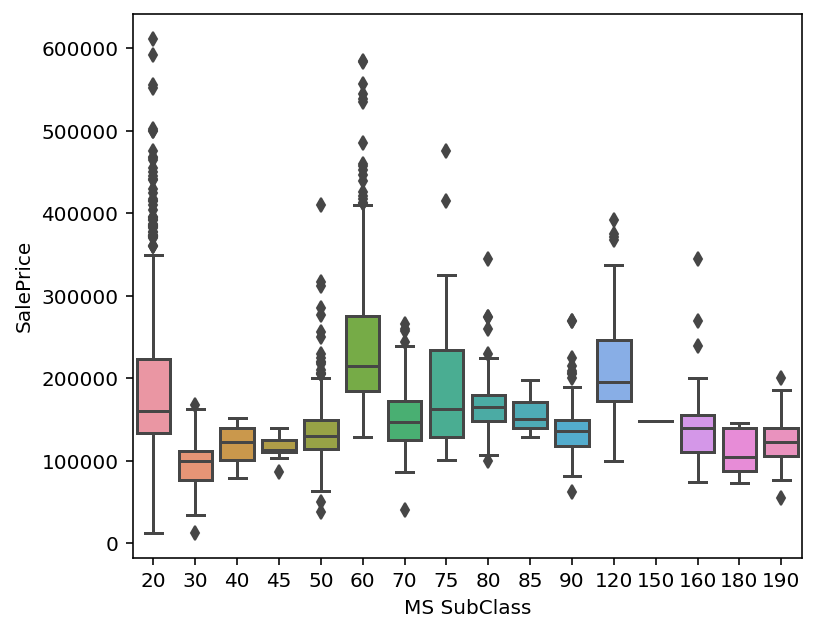

In [101]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="MS SubClass", y="SalePrice", data=df_eda);

#### Comment: (MS SubClass vs. SalePrice)
- The median of some subclasses of buildings appear to affect sale price.
- "MS SubClass" to be used for futher analysis.

### 5.2) MS Zoning - The general zoning classification of the sale

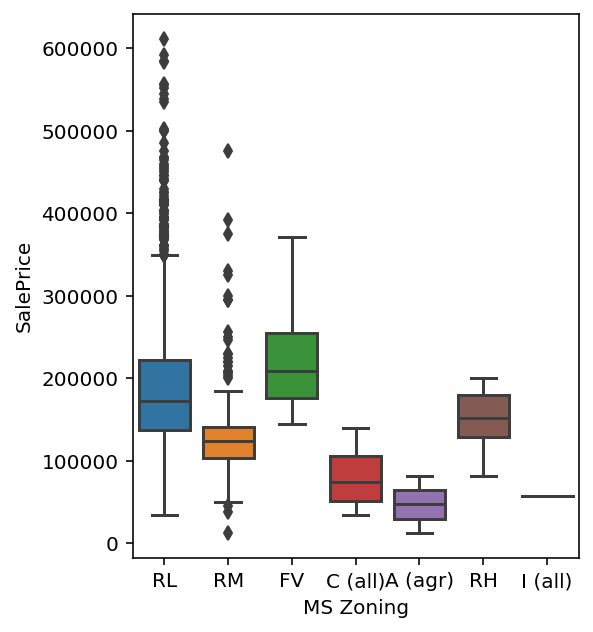

In [102]:
plt.figure(figsize=(4, 5))
sns.boxplot(x="MS Zoning", y="SalePrice", data=df_eda);

#### Comment: (MS Zoning vs. SalePrice)
- The zone in which the house is located, appears to influence the sale price of the house.
- The "MS SubClass" feature may be used for further analysis.

### 5.3) Lot Area: Lot size in square feet

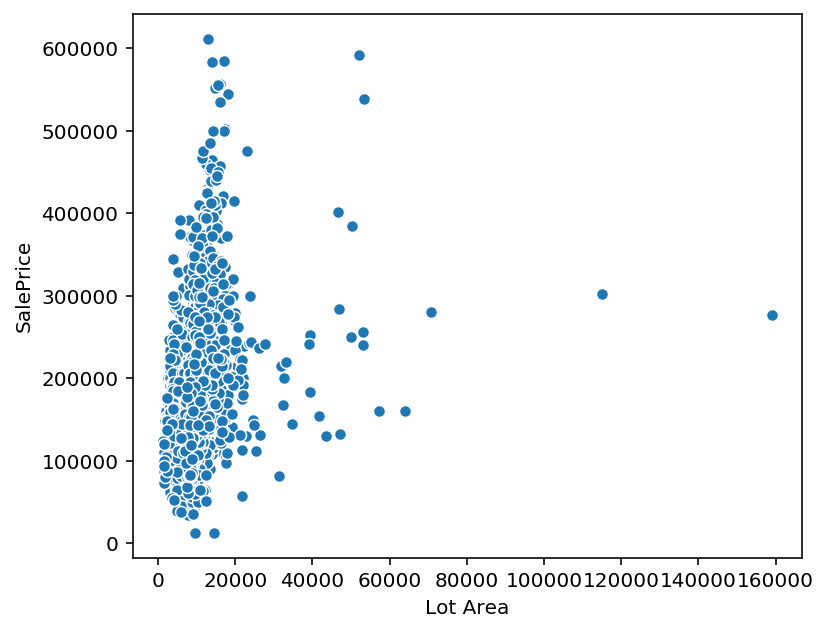

In [103]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Lot Area", y="SalePrice", data=df_eda);

In [104]:
# Defining a function to check for correlation between 2 columns a vs. b

def eda_correlation(a, b):
    return df_eda[a].corr(df_eda[b], method='pearson')

In [105]:
eda_correlation("Lot Area", "SalePrice")

0.2965658323667789

In [106]:
df_eda.drop(["Lot Area"], axis=1, inplace=True)

#### Comments:
- There is a weak positive correlation between the "Lot Area" and the target.
- This "Lot Area" feature has been removed.

### 5.4) Street: Type of road access to property

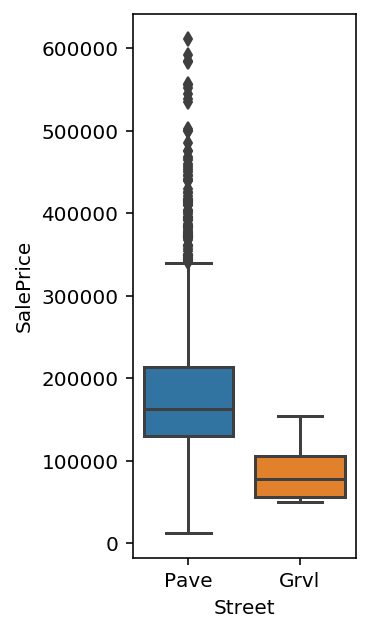

In [107]:
plt.figure(figsize=(2, 5))
sns.boxplot(x="Street", y="SalePrice", data=df_eda);

#### Comments:
- The mean of the "Pave" value is larger than the "Grvl" value. The spread of "Pave" is also larger.
- The "Street" feature can be retained for further analysis.

### 5.5) Alley: Type of alley access to property

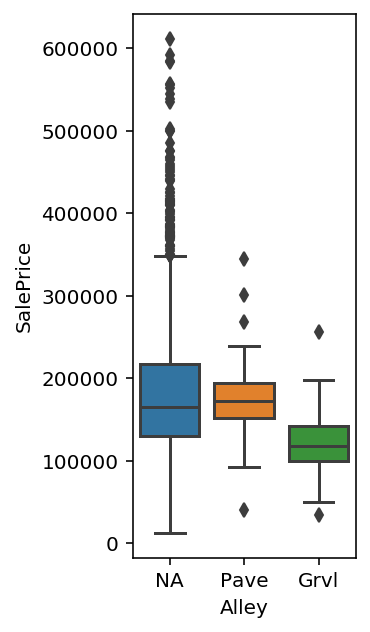

In [108]:
plt.figure(figsize=(2, 5))
sns.boxplot(x="Alley", y="SalePrice", data=df_eda);

In [109]:
df_eda["Alley"].value_counts()

NA      1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

In [110]:
df_eda.drop(["Alley"], axis=1, inplace=True)

#### Comments:
- A large proportion of the houses within the "Alley" feature do not have an alley.
- It is thus reasonable to drop this feature from the dataset given its limited utility towards our analysis.

In [111]:
df_train.shape

(2051, 80)

### 5.6) Lot Shape: General shape of property

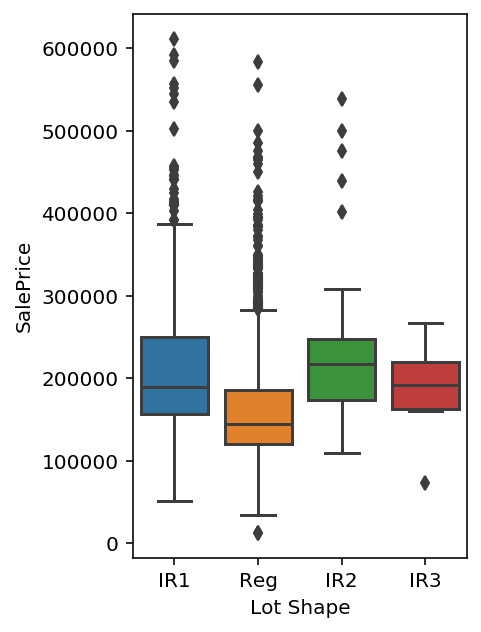

In [112]:
plt.figure(figsize=(3, 5))
sns.boxplot(x="Lot Shape", y="SalePrice", data=df_eda);

In [113]:
df_eda.drop(["Lot Shape"], axis=1, inplace=True)

#### Comments:
- The medians within the "Lot Shape" feature appear to be approximately-centered across different value types.
- In this case, as no clear distinction may be made, this column will be dropped.

### 5.7) Land Contour: Flatness of the property

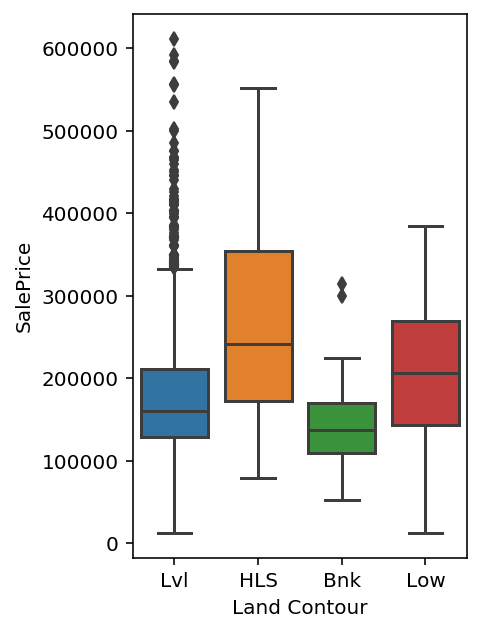

In [114]:
plt.figure(figsize=(3, 5))
sns.boxplot(x="Land Contour", y="SalePrice", data=df_eda);

#### Comments:
- The medians within the "Land Contour" show distinct separation between the "HLS" and "Bnk" values, and could be useful in predicting the target.
- This "Land Contour" value will be retained in the EDA dataset.

### 5.8) Utilities: Type of utilities available

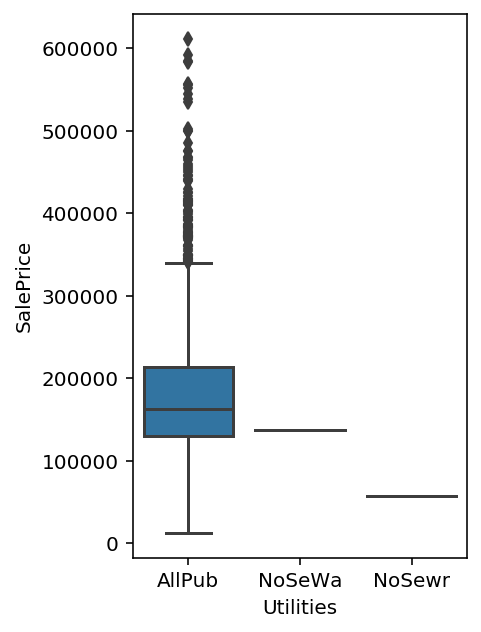

In [115]:
plt.figure(figsize=(3, 5))
sns.boxplot(x="Utilities", y="SalePrice", data=df_eda);

In [116]:
df_eda["Utilities"].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [117]:
df_eda.drop(["Utilities"], axis=1, inplace=True)

#### Comments:
- Almost all values within this "Utilities" column comprise of "AllPub" values (>99.9%)
- This feature should be removed as it does not provide any useful information to build our prediction model.

### 5.9) Lot Config: Lot configuration

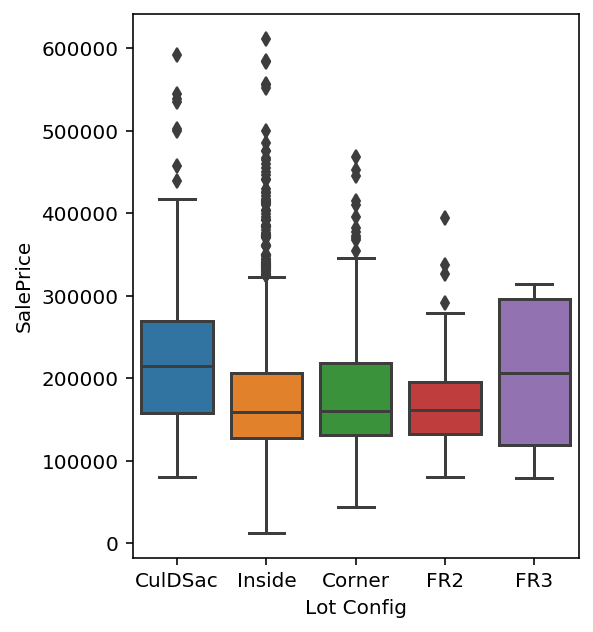

In [118]:
plt.figure(figsize=(4, 5))
sns.boxplot(x="Lot Config", y="SalePrice", data=df_eda);

In [119]:
df_eda.drop(["Lot Config"], axis=1, inplace=True)

#### Comments:
- The medians and spreads of the values within this "Lot Config" feature appear to overlap without any clear distinction.
- This feature will thus be removed from our modelling.

### 5.10) Land Slope: Slope of property

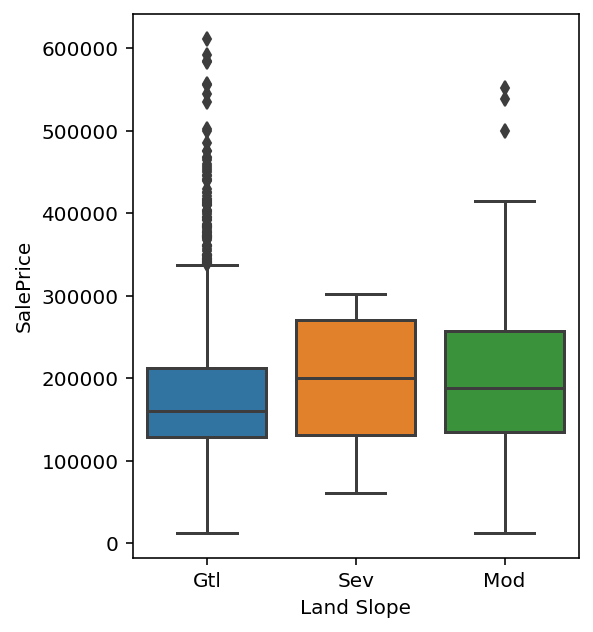

In [120]:
plt.figure(figsize=(4, 5))
sns.boxplot(x="Land Slope", y="SalePrice", data=df_eda);

In [121]:
df_eda.drop(["Land Slope"], axis=1, inplace=True)

#### Comments:
- The medians and spreads of the values within this "Land Slope" feature appear to overlap without any clear distinction.
- This feature will thus be removed from our modelling.

### 5.11) Neighborhood: Physical locations within Ames city limits

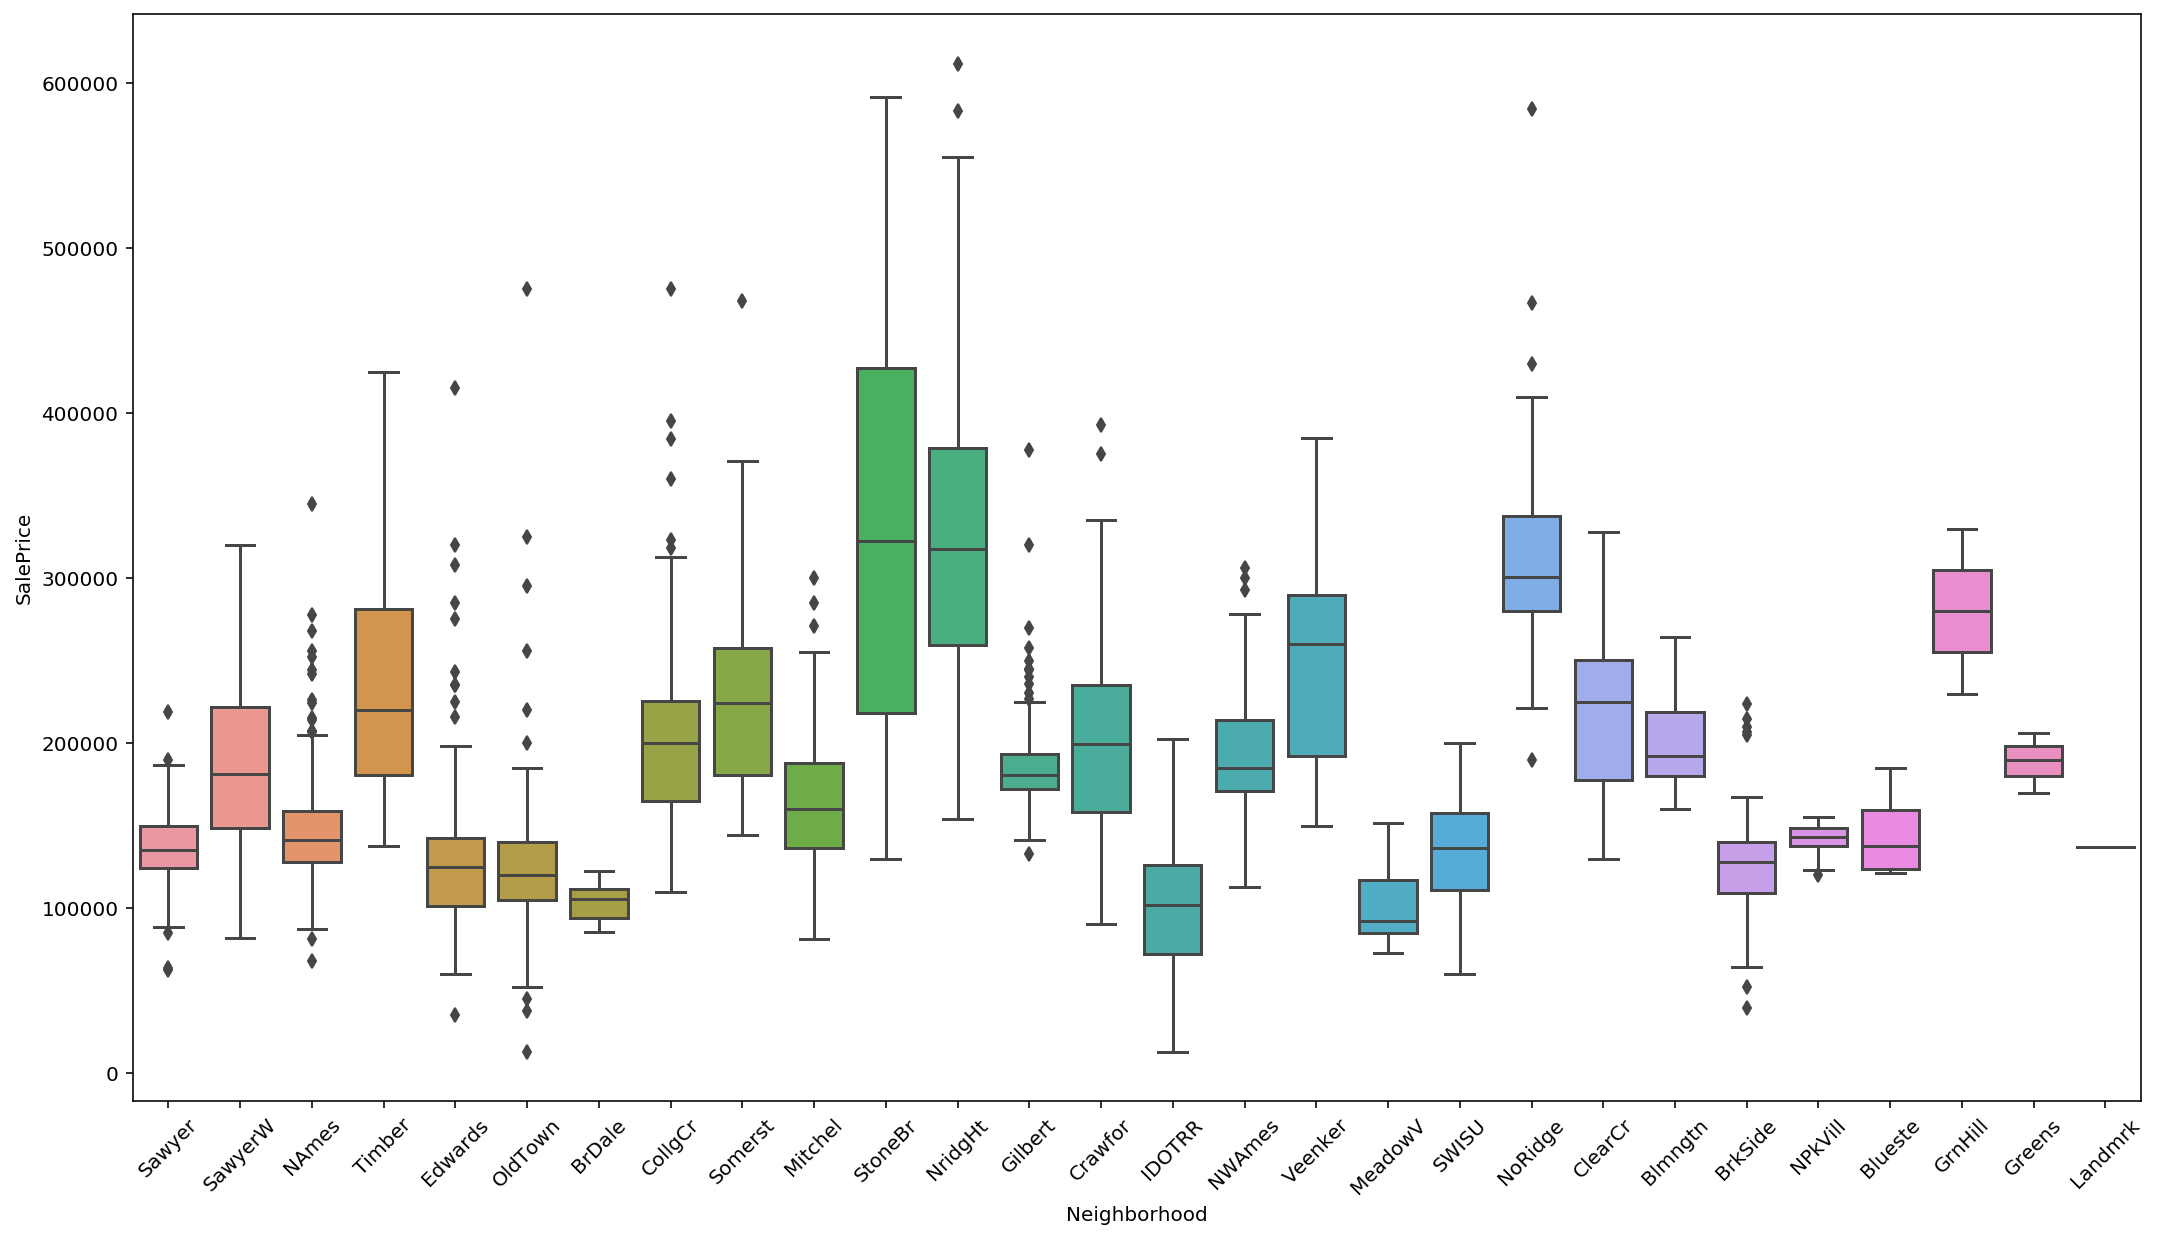

In [122]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Comments:
- The neighborhood in which the house is located appears to have strong impact on the target sale price.
- This "Neighborhood" feature will be retained for our downstream analysis.

### 5.12) Condition1: Proximity to main road or railroad

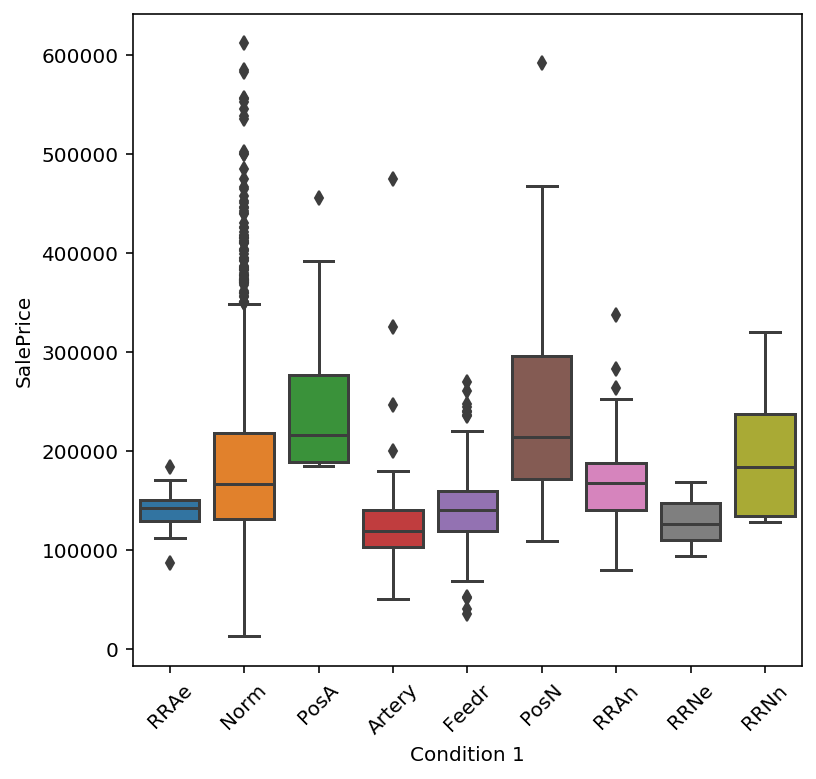

In [123]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="Condition 1", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Comments:
- The proximity of the house to a main road or railraod appears to have an impact on the sale price.
- This "Condition 1" feature will be retained for our downstream analysis.

### 5.13) Condition 2: Proximity to main road or railroad (if a second is present)

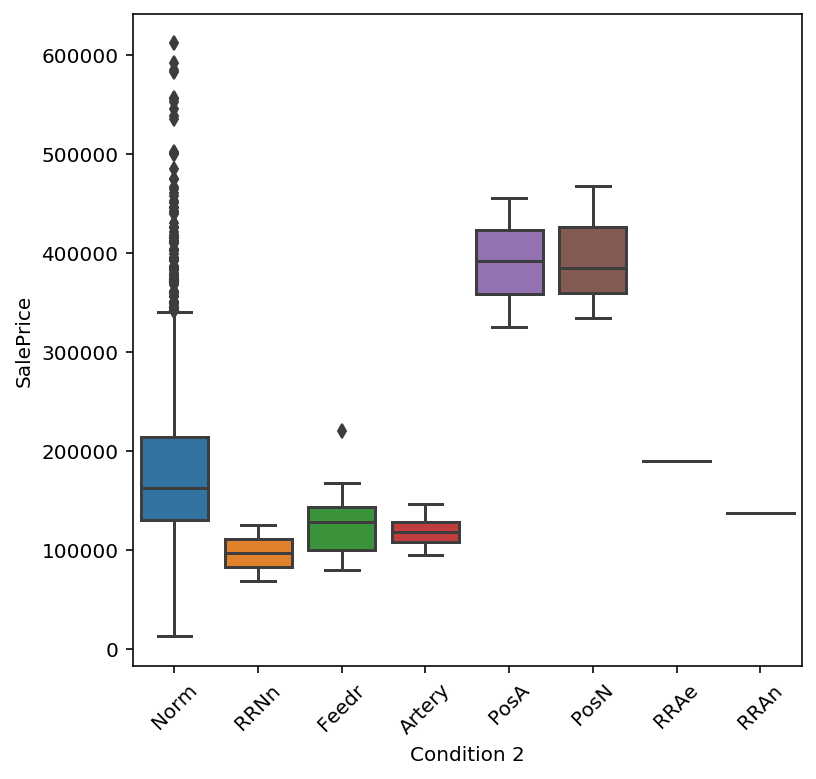

In [124]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="Condition 2", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [125]:
df_eda["Condition 2"].value_counts()

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition 2, dtype: int64

In [126]:
df_eda.drop(["Condition 2"], axis=1, inplace=True)

#### Comment:
- Almost the entire dataset of "Condition 2" refers to houses without a secondary access road/rail.
- As such, this feature may be removed as it does not add value to our modelling.

### 5.14) BldgType: Type of dwelling

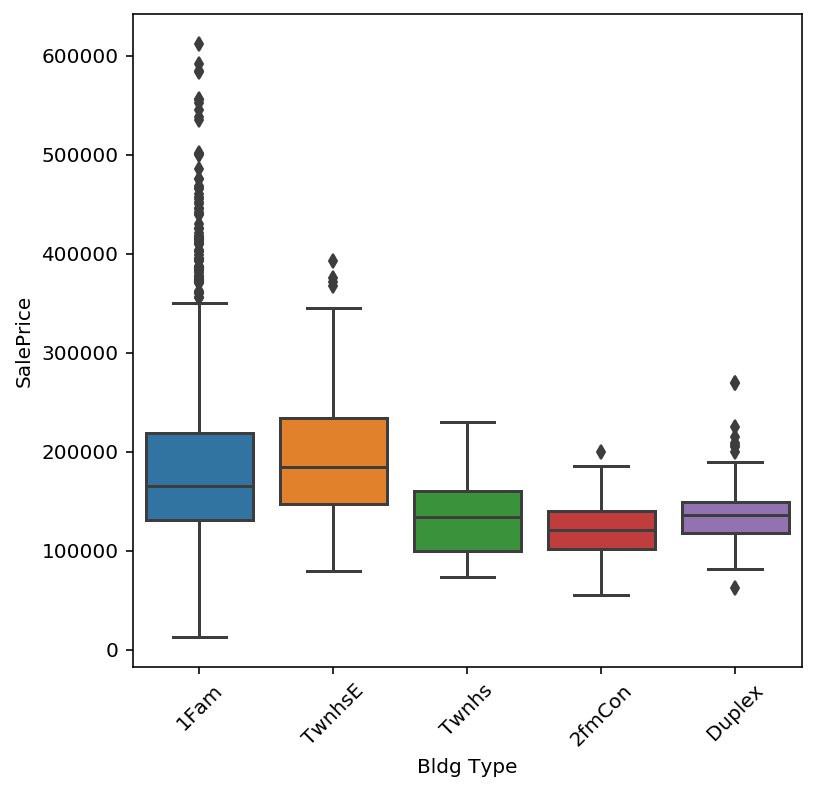

In [127]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="Bldg Type", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [128]:
df_eda["Bldg Type"].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

#### Comment:
- While a sizable proportion of the "Bldg Type" feature contains "1Fam" (Single-family Detached) houses, it would make sense to still retain this value for our analysis.
- Depending upon the housing type, it is logical to assume that the floor area, number of room etc could impact the overall sale price of the house.
- As such, this "Bldg Type" feature will be retained for our subsequent analysis.

### 5.15) House Style: Style of dwelling

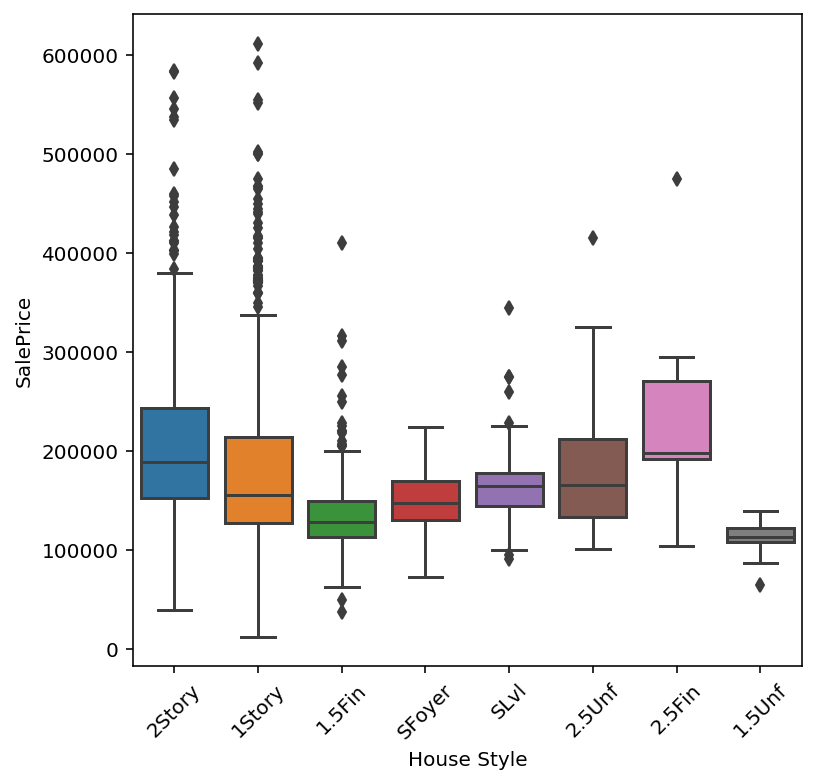

In [129]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="House Style", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [130]:
df_eda["House Style"].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

#### Comment:
- Again, depending upon the housing type/style, it is logical to assume that the floor area, number of room etc could impact the overall sale price of the house.
- As such, this "House Style" feature will be retained for our subsequent analysis.

### 5.16) Overall Qual: Overall material and finish quality

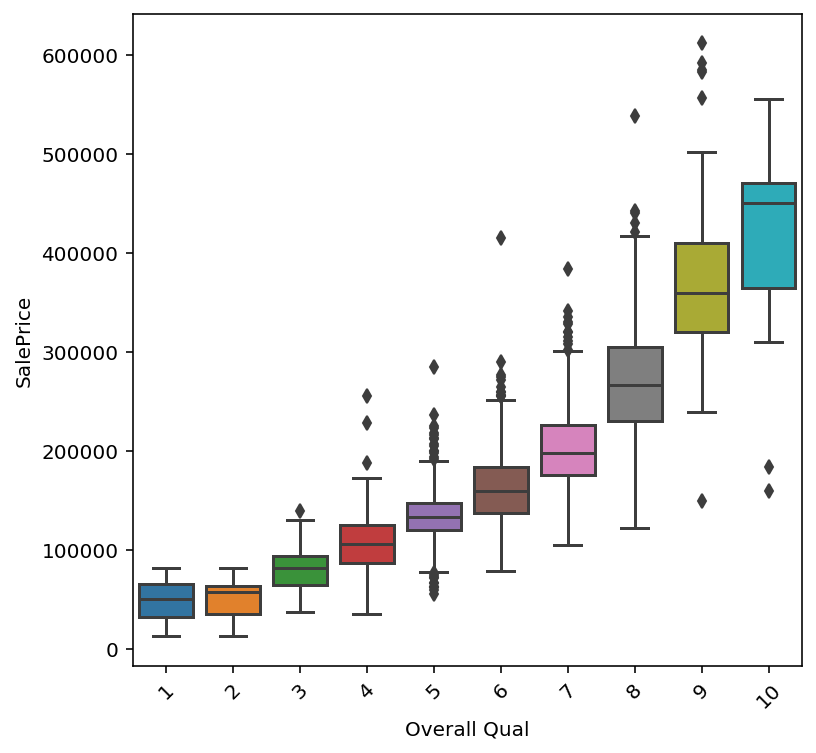

In [131]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="Overall Qual", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [132]:
df_eda["Overall Qual"].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

#### Comment:
- A house which was made using excellent materials with excellent finishing will fetch a higher selling price.
- This "Overall Qual" feature will be retained for our subsequent analysis.

### 5.17) Overall Cond: Overall condition rating

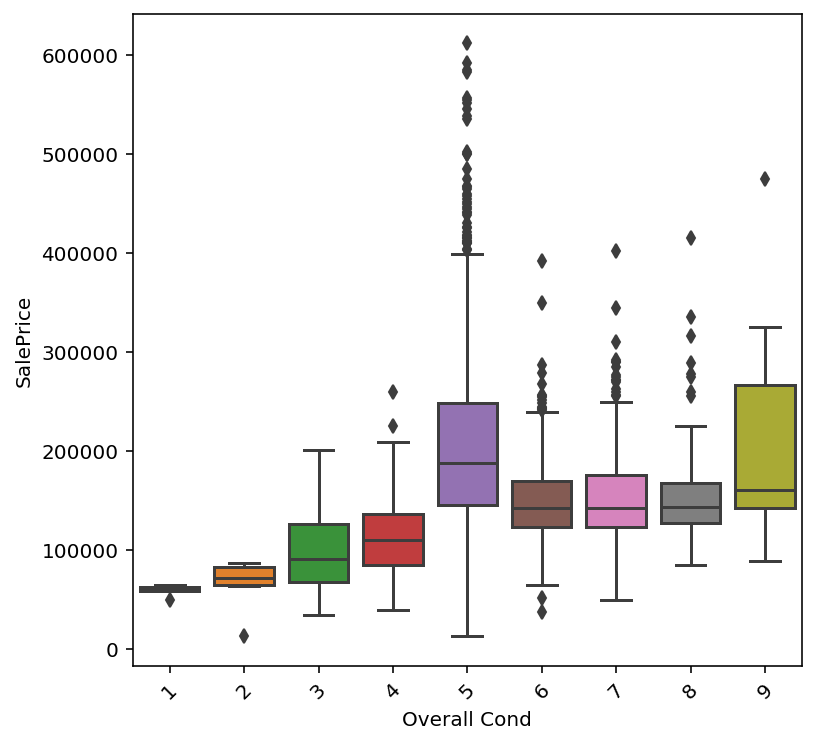

In [133]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="Overall Cond", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [134]:
df_eda["Overall Cond"].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

#### Comment:
- There is a general trend that house which are in better condition, will fetch a higher selling price.
- However, this trend appear to plateau after the score of 5-6 (Average).
- Nevertheless, this "Overall Cond" feature can be used to help with our modelling.

### 5.18) Year Built: Original construction date

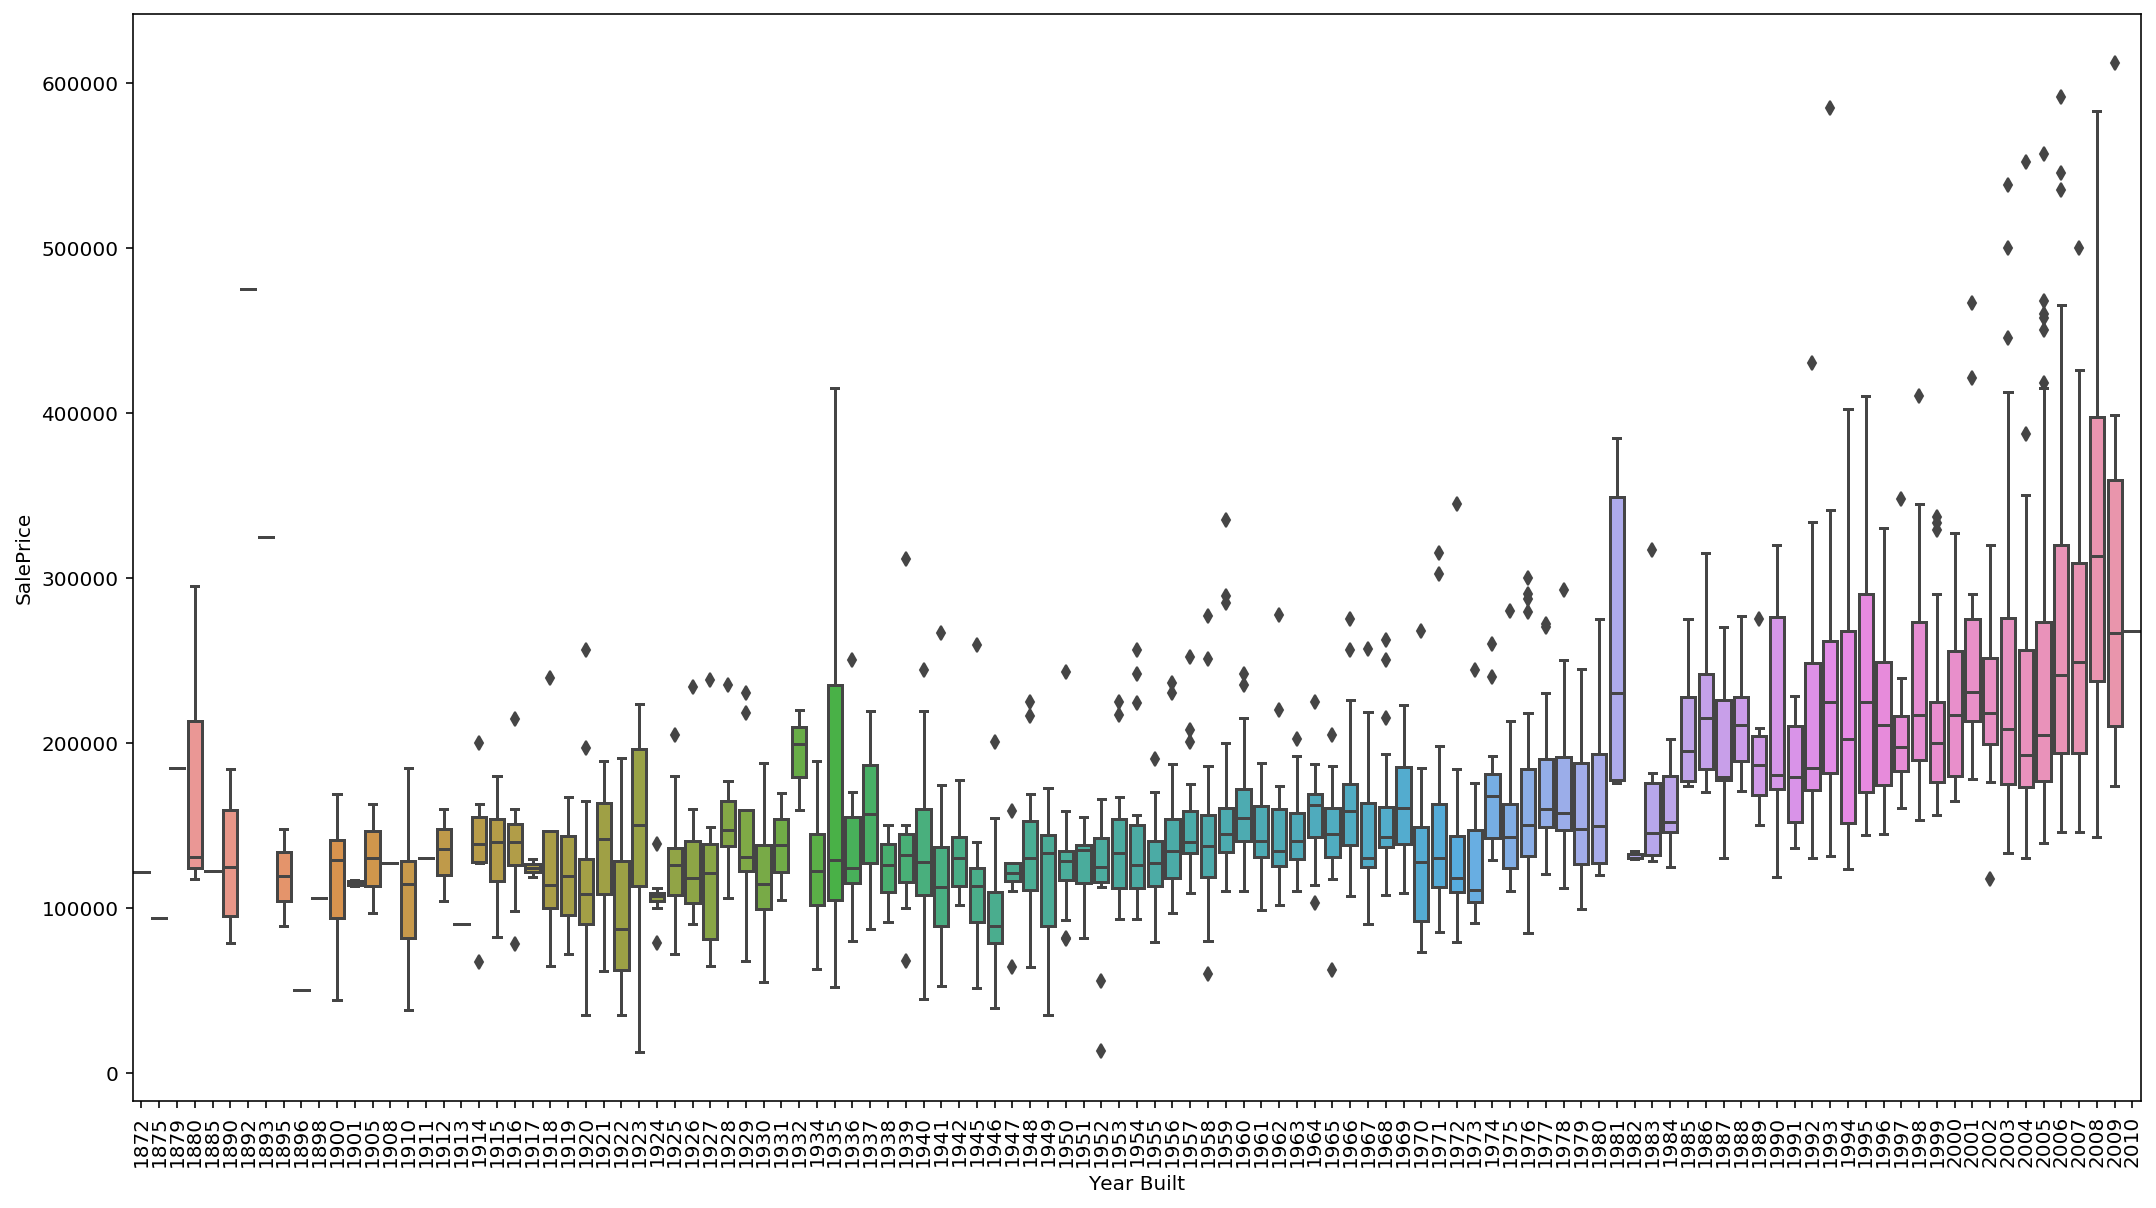

In [135]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x="Year Built", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

#### Comments:
- There is a trend that the sale price of the house increases as the age of the house decreases.
- As such, the "Year Built" feature will be used for our modelling.

### 5.19) Year Remod/Add: Remodel date

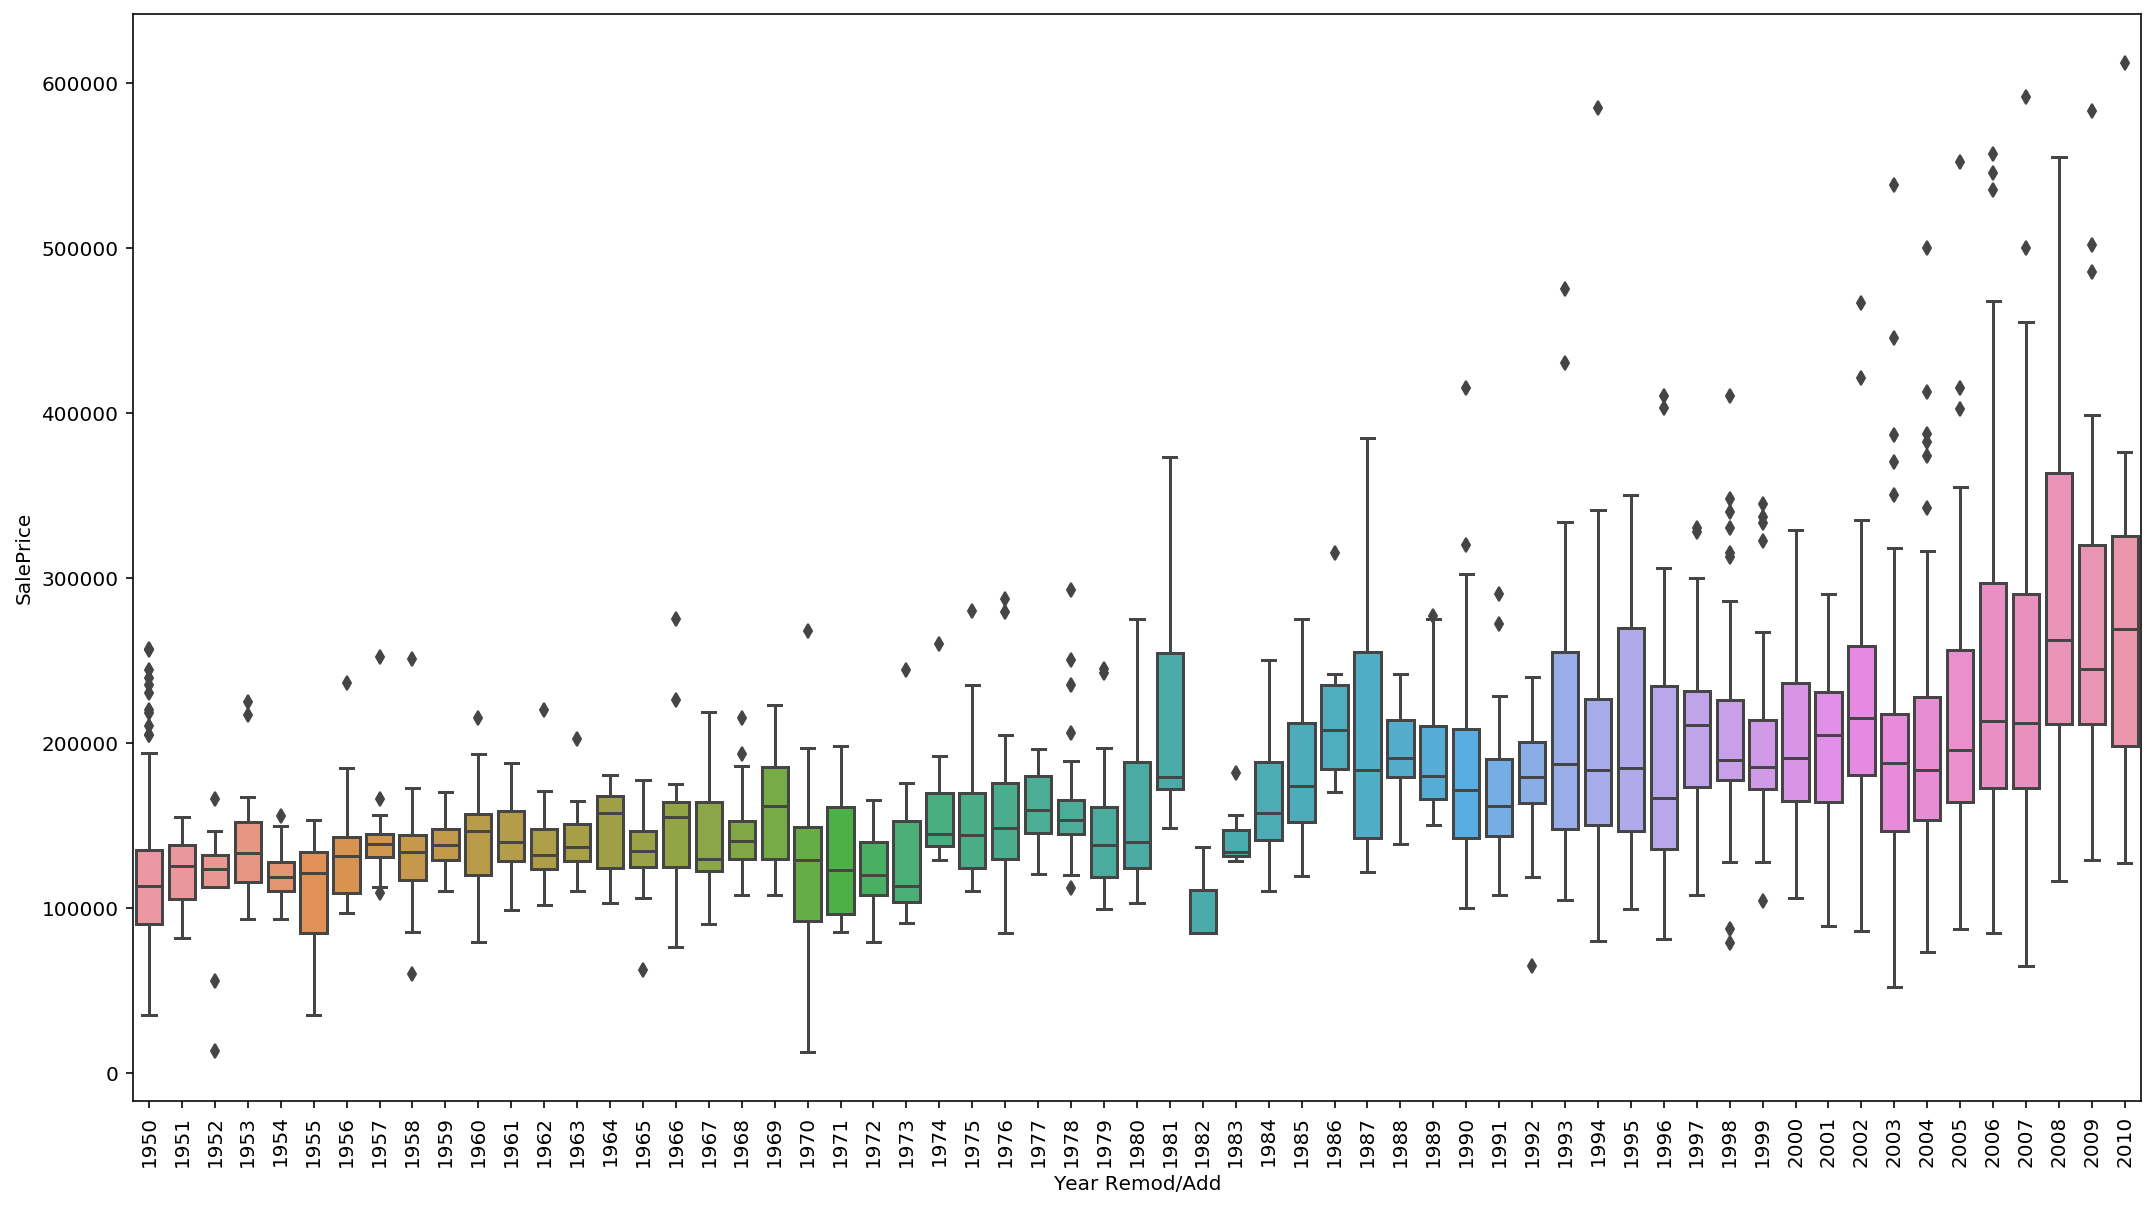

In [136]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x="Year Remod/Add", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

#### Comments:
- There is a trend that the more recent the house was remodeled, the higher the sale price will be.
- As such, the "Year Remod/Add" feature will be included in our dataset.

### 5.20) Roof Style: Type of roof

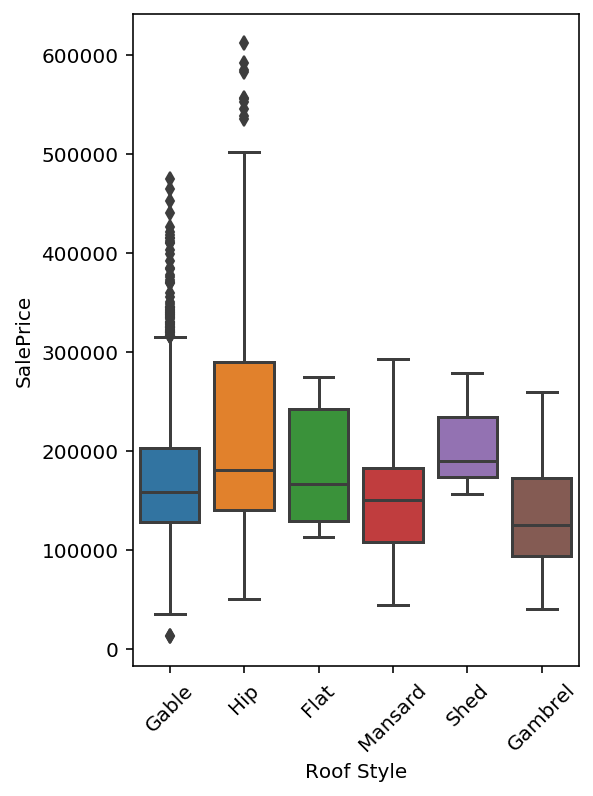

In [137]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Roof Style", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [138]:
df_eda["Roof Style"].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

#### Comments:
- The various values appear to center around the same price range.
- However, the sale price of "Hip" style roofs have a right-skew.
- As such, the "Roof Style" feature will be included in our analysis.

### 5.21) Roof Matl: Roof material

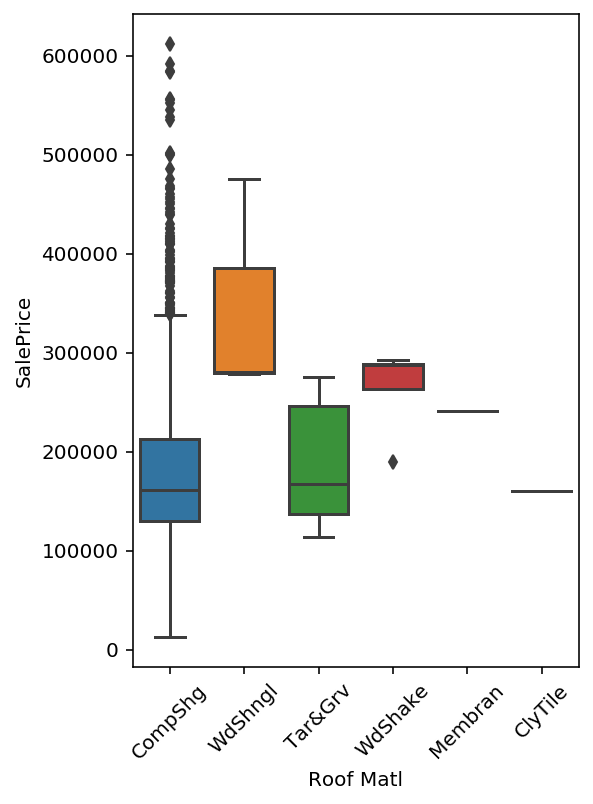

In [139]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Roof Matl", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [140]:
df_eda["Roof Matl"].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

In [141]:
df_eda.drop(["Roof Matl"], axis=1, inplace=True)

#### Comments:
- A large majority (>99%) of the house roof materials are made from "CompShg" (Standard Shingle) type.
- As such, this feature does not contribute any meaningful data towards our prediction model.
- This feature is thus dropped from our dataset.

### 5.22) Exterior 1st: Exterior covering on house

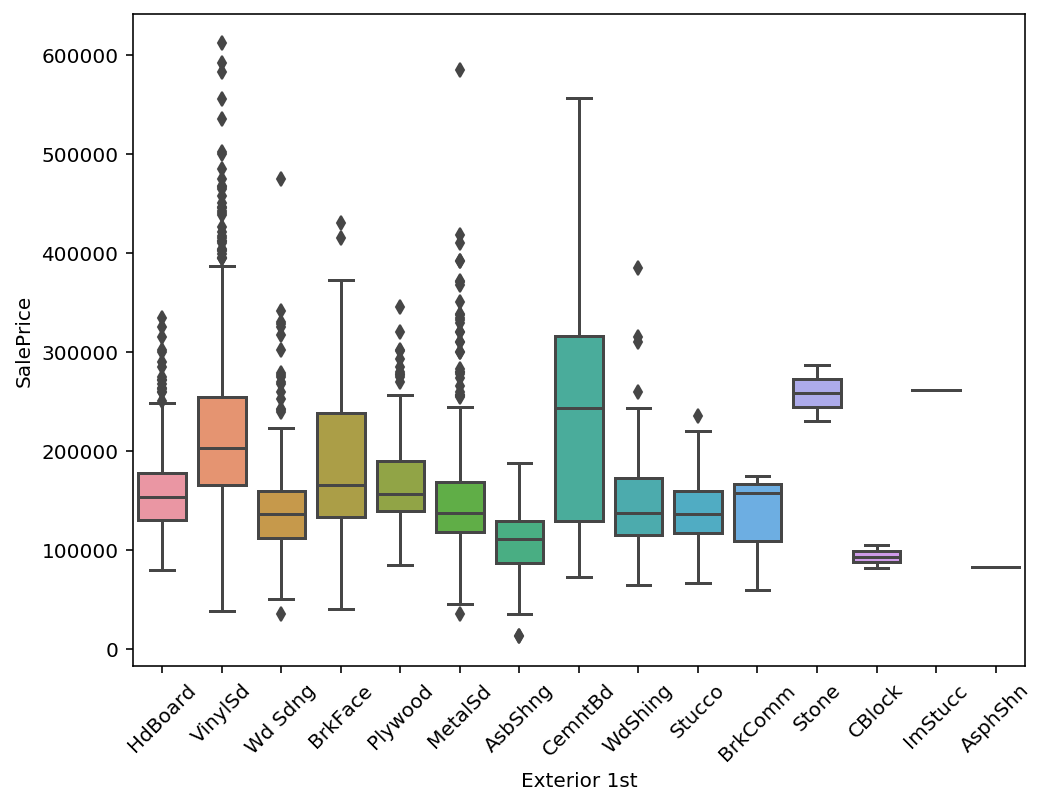

In [142]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Exterior 1st", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [143]:
df_eda["Exterior 1st"].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

#### Comments:
- The median values appear to differ between different exterior types.
- This feature would be retained for our analysis.

### 5.23) Exterior 2nd: Exterior covering on house (if more than one material)

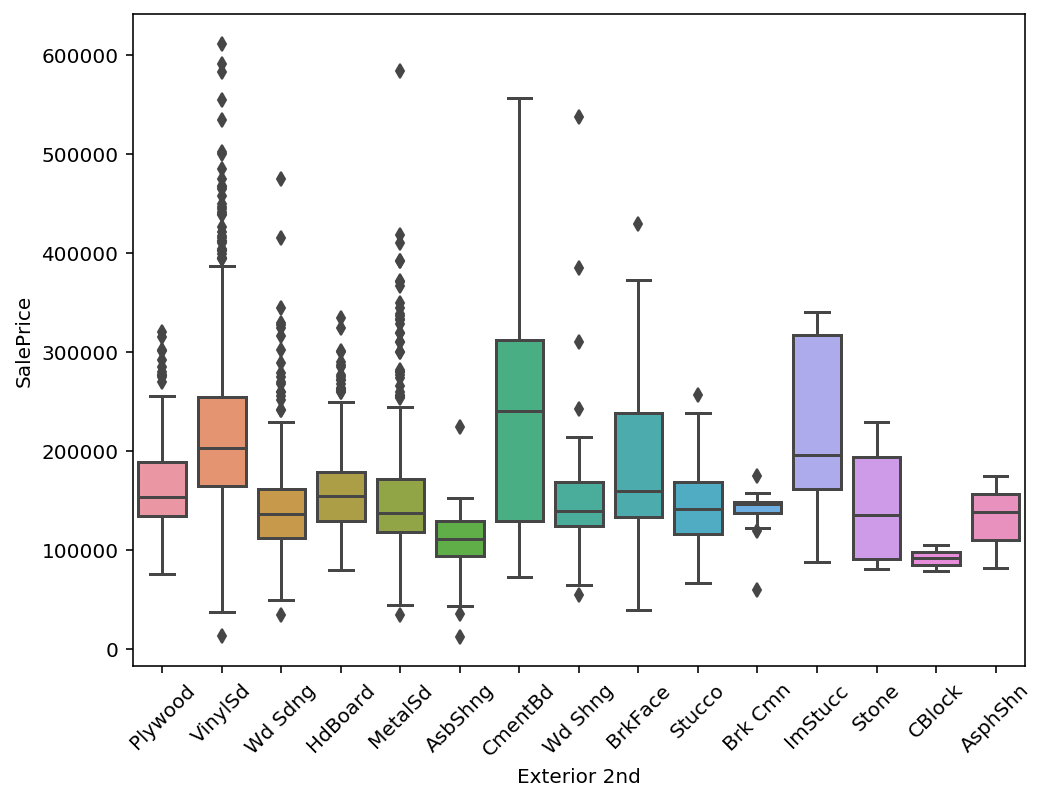

In [144]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Exterior 2nd", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [145]:
df_eda["Exterior 2nd"].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [146]:
# Accessing the similarity between Exterior 1 vs Exterior 2

similar = 0
different = 0

for i in df_eda.index:
    if df_eda["Exterior 1st"][i] == df_eda["Exterior 2nd"][i]:
        similar += 1
    else:
        different += 1

print("There are {} similar values between Ext1 and Ext 2, out of 2051 values.".format(similar))
print("There are {} different values between Ext1 and Ext 2, out of 2051 values.".format(different))

There are 1733 similar values between Ext1 and Ext 2, out of 2051 values.
There are 318 different values between Ext1 and Ext 2, out of 2051 values.


#### Comments:
- While more than 80% of values between Ext 1nd Ext 2 are similar, there is approximately 20% of values which are different.
- As such, I will retain Exterior 2 in the anlaysis.

### 5.24) Mas Vnr Type: Masonry veneer type

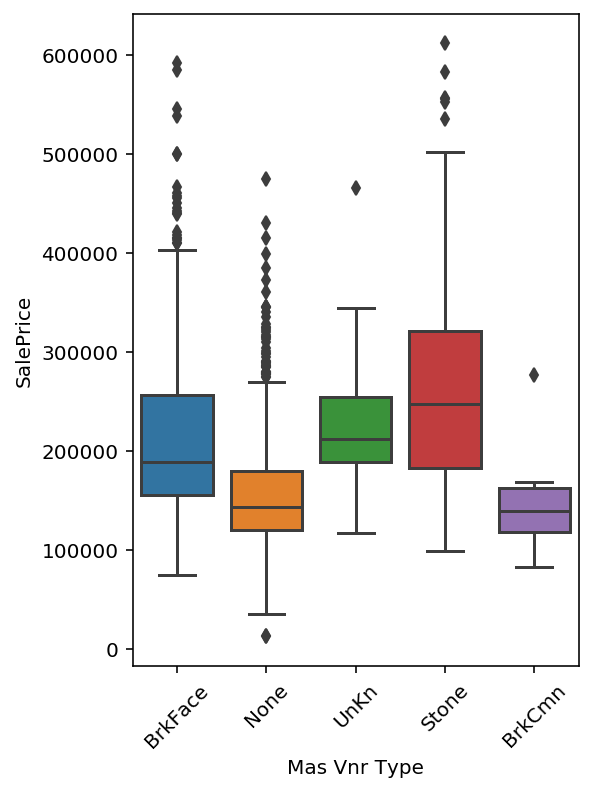

In [147]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Mas Vnr Type", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [148]:
df_eda["Mas Vnr Type"].value_counts()

None       1218
BrkFace     630
Stone       168
UnKn         22
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

#### Comments:
- There appears to be a different median between houses with no "Mas Vnr Type" vs. houses with "BrkFace"/"Stone".
- This feature will thus be kept for downstream analysis.

### 5.25) Mas Vnr Area: Masonry veneer area in square feet

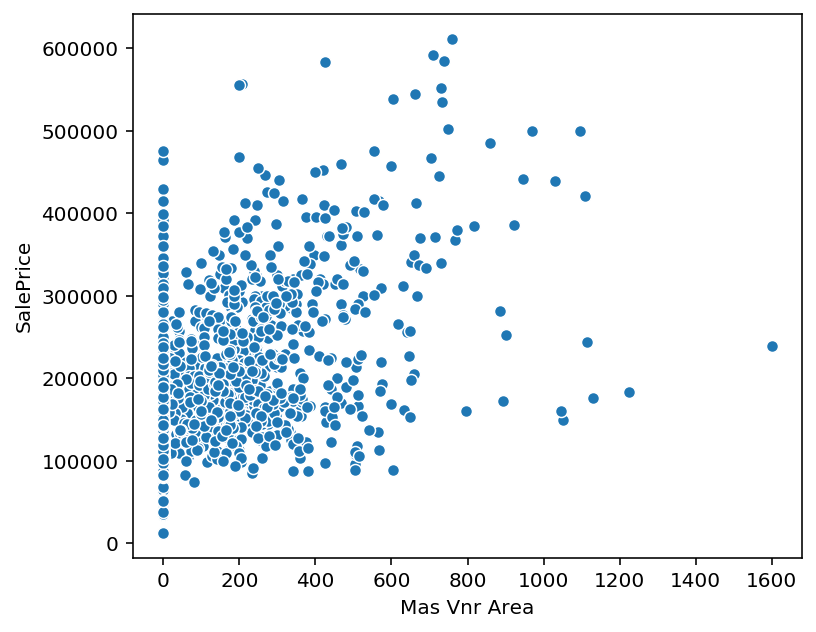

In [149]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Mas Vnr Area", y="SalePrice", data=df_eda);

In [150]:
df_eda["Mas Vnr Area"].corr(df_eda["SalePrice"], method="pearson")

0.5035194345529418

#### Comment:
- There is a moderately positive correlation between "Mas Vnr Area" and the house "SalePrice".
- This feature will be kept for additional analysis.

### 5.26) Exter Qual: Exterior material quality

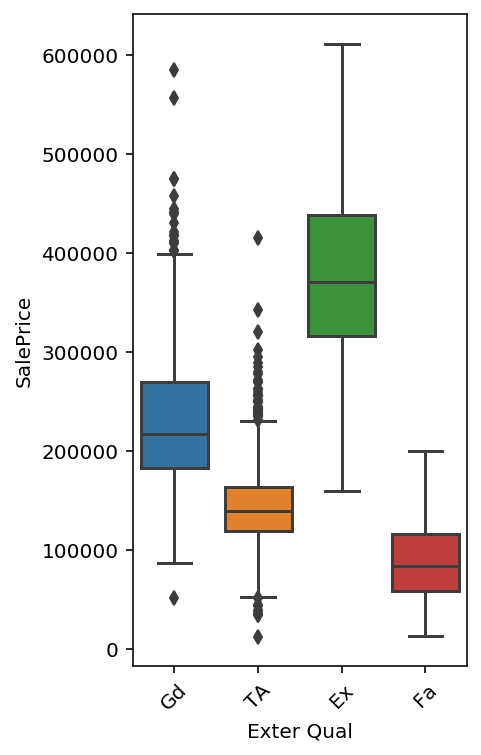

In [151]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Exter Qual", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [152]:
df_eda["Exter Qual"].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

#### Comment:
- There appears to be a difference between the type of exterior material quality.
- This value will be kept for further analysis.

### 5.27) Exter Cond: Present condition of the material on the exterior

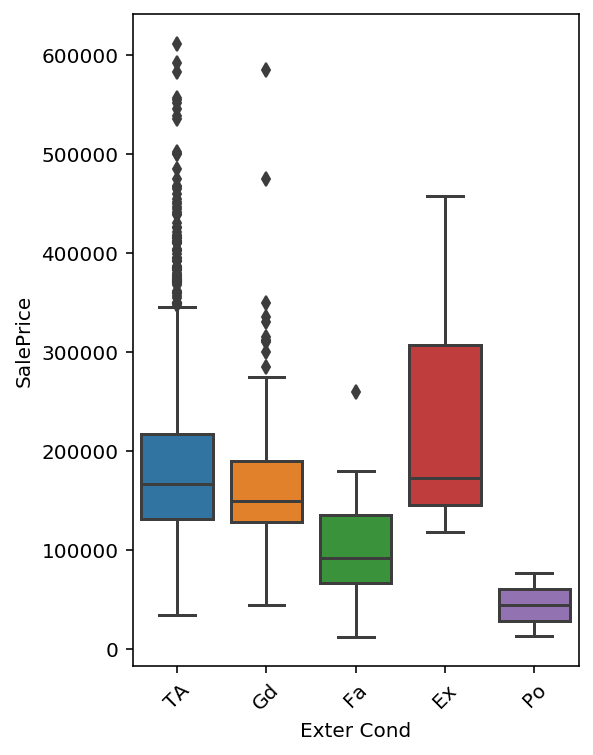

In [153]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Exter Cond", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [154]:
df_eda["Exter Cond"].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

#### Comments:
- Based on the boxplot and the number of samples per value, it is unclear if there is a relationship between the exterior condition vs sale price.
- Keeping this feature however appears to be logical and will be retained for our analysis.

### 5.28) Foundation: Type of foundation

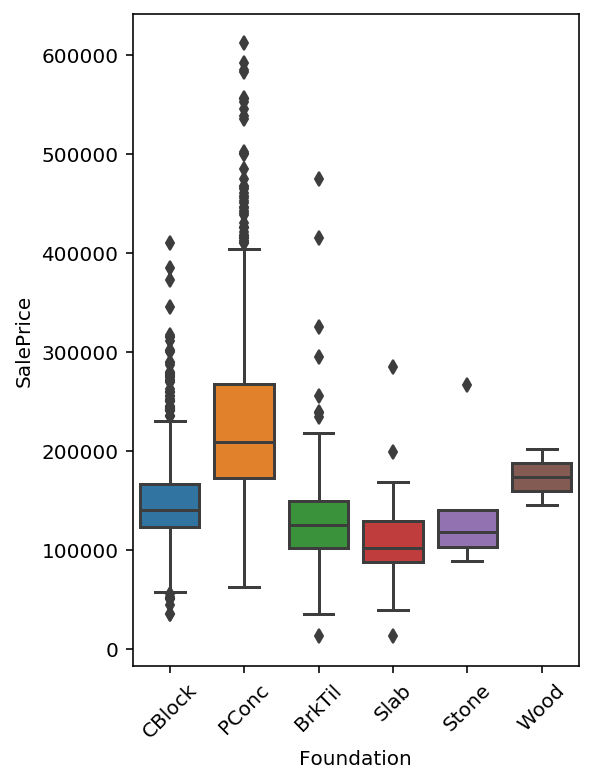

In [155]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Foundation", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Comments:
- The type of housing foundation appears to impact the saleprice of the house.
- This feature will be retained.

### 5.29) BsmtQual: Height of the basement

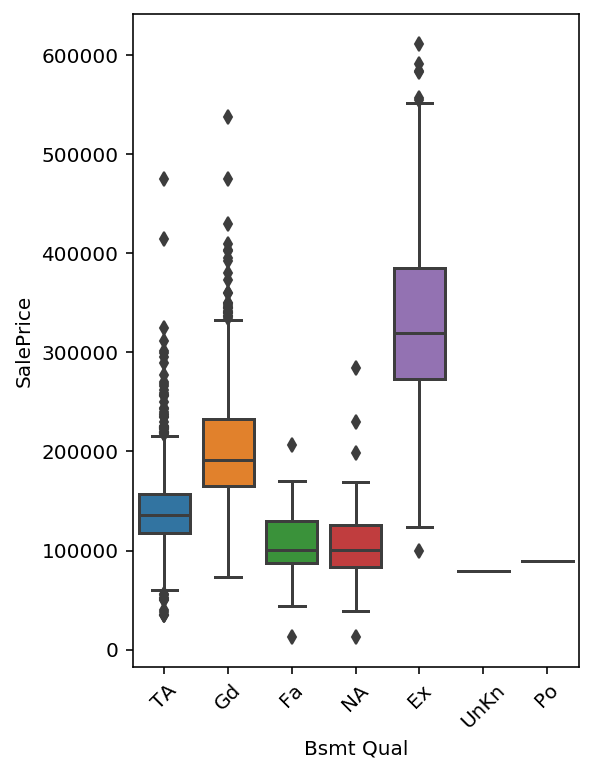

In [156]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Bsmt Qual", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [157]:
df_eda["Bsmt Qual"].value_counts()

TA      887
Gd      864
Ex      184
Fa       60
NA       54
UnKn      1
Po        1
Name: Bsmt Qual, dtype: int64

#### Comments:
- The height of house basement can impact the saleprice of the house. Houses with basement heights of >90 inches appear to fetch a higher saleprices.
- The "Bsmt Qual" feature will be included in our analysis.

### 5.30) Bsmt Cond: General condition of the basement

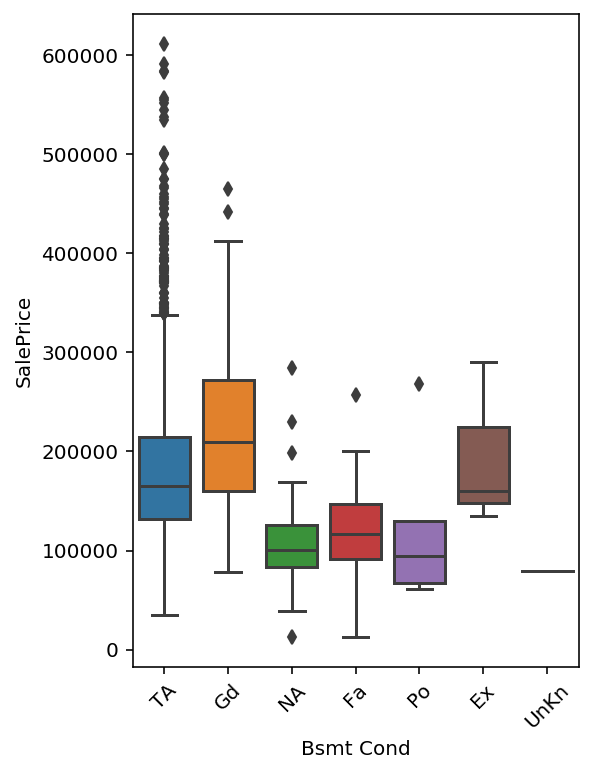

In [158]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Bsmt Cond", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [159]:
df_eda["Bsmt Cond"].value_counts()

TA      1834
Gd        89
Fa        65
NA        54
Po         5
Ex         3
UnKn       1
Name: Bsmt Cond, dtype: int64

#### Comments:
- A majority of house basements are of "TA" (Typical) conditions.
- While basements with "Gd" conditions have a higher median price, its sample size is low.
- Nevertheless, it is expected that the basement condition play a role in the saleprice.
- This feature will be included in our dataset.

### 5.31) Bsmt Exposure: Walkout or garden level basement walls

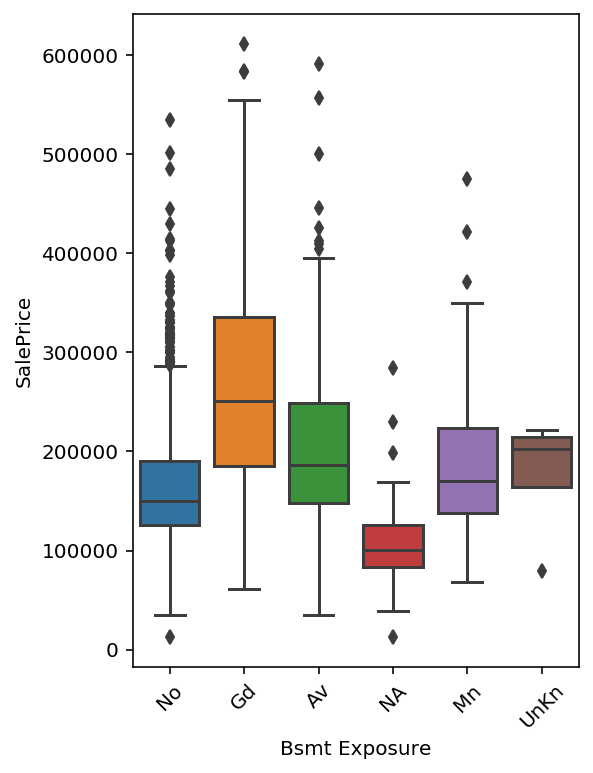

In [160]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Bsmt Exposure", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [161]:
df_eda["Bsmt Exposure"].value_counts()

No      1339
Av       288
Gd       203
Mn       163
NA        54
UnKn       4
Name: Bsmt Exposure, dtype: int64

#### Comments:
- Houses with no basement walkout or garden level walls have a lower sale price.
- This feature will be retained for further analysis.

### 5.32) BsmtFin Type 1: Quality of basement finished area

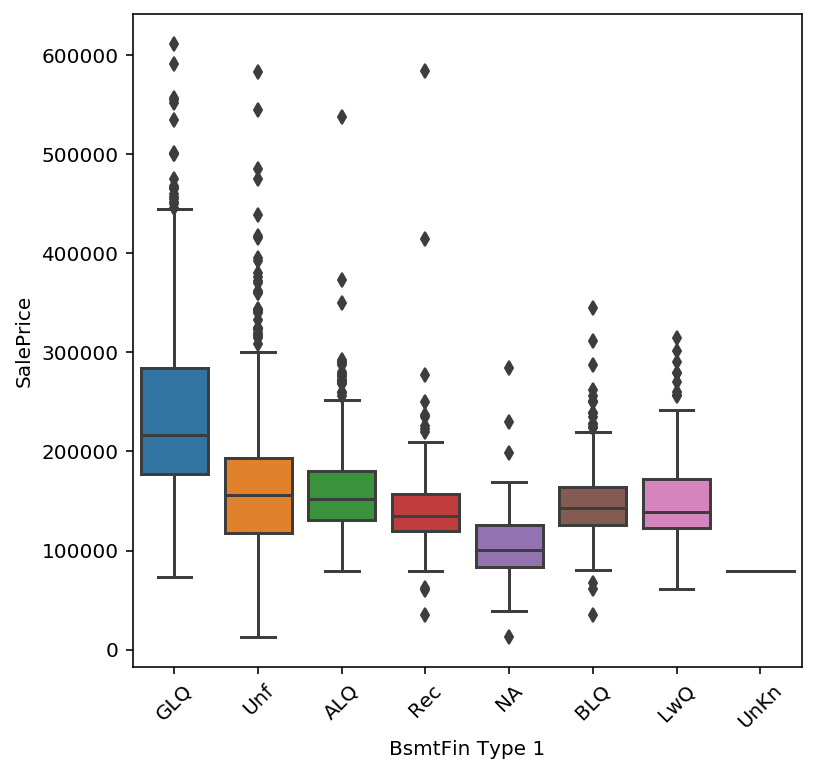

In [162]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="BsmtFin Type 1", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Comments:
- Basements that have a good living quality finished area (GLQ) fetch a higher sale price.
- This feature will be kept for further analysis.

### 5.33) BsmtFin SF1: Type 1 finished square feet

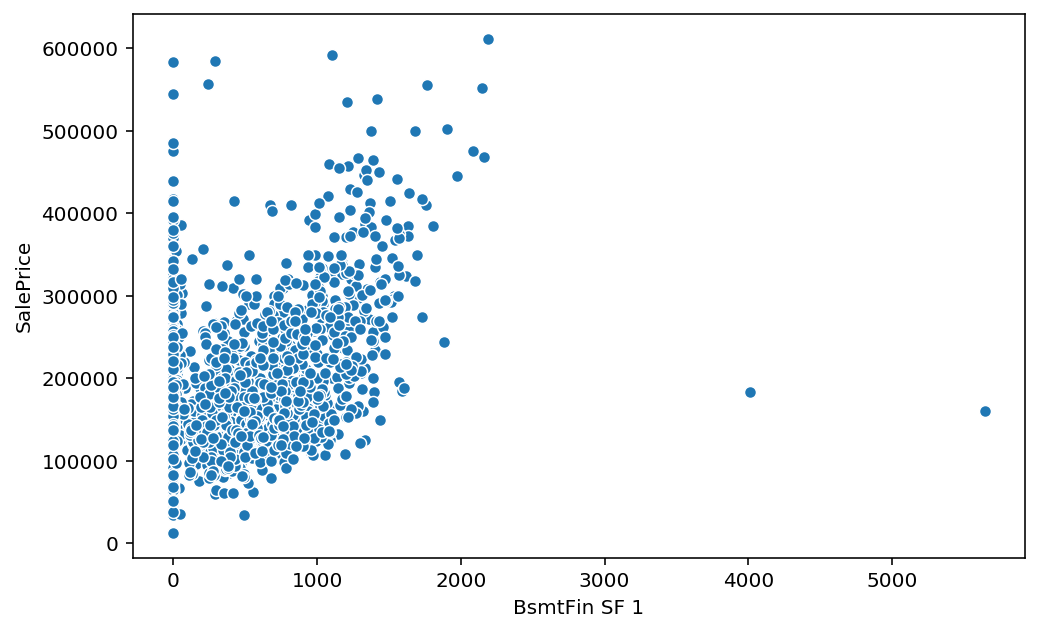

In [163]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="BsmtFin SF 1", y="SalePrice", data=df_eda);

In [164]:
df_eda["BsmtFin SF 1"].corr(df_eda["SalePrice"], method="pearson")

0.42385685061936484

#### Comments:
- There is a moderate positive correlation between the area of basement finished square feet and saleprice.
- This feature can be retained for further analysis.

### 5.34) BsmtFin Type2: Quality of second finished area (if present)
### 5.35) BsmtFin SF2: Quality of second finished area (if present)

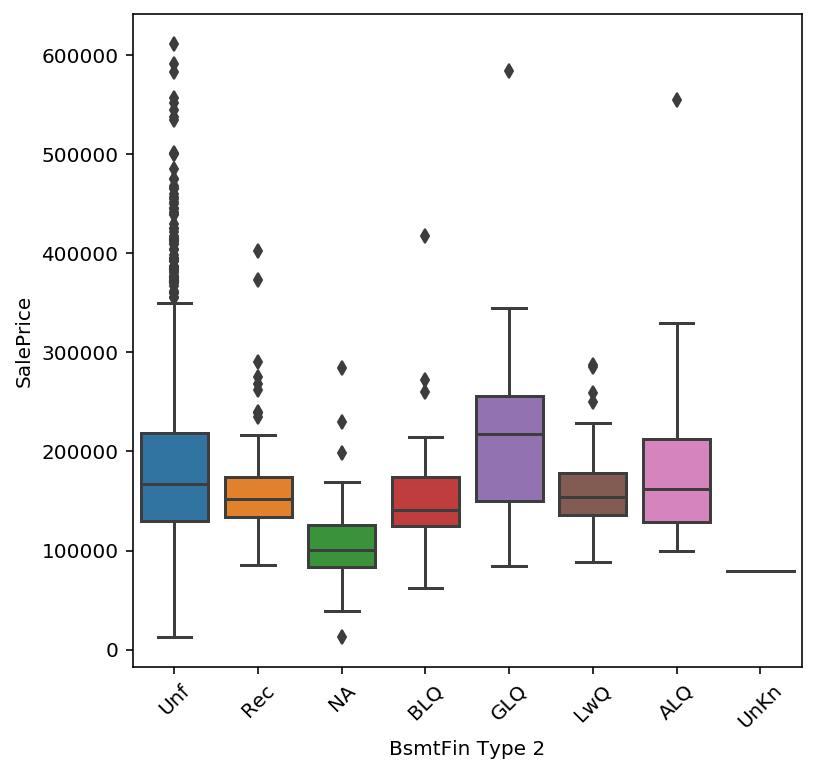

In [165]:
# BsmtFin Type 2
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="BsmtFin Type 2", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [166]:
# BsmtFin Type 2
df_eda["BsmtFin Type 2"].value_counts()

Unf     1750
Rec       80
LwQ       60
NA        54
BLQ       48
ALQ       35
GLQ       23
UnKn       1
Name: BsmtFin Type 2, dtype: int64

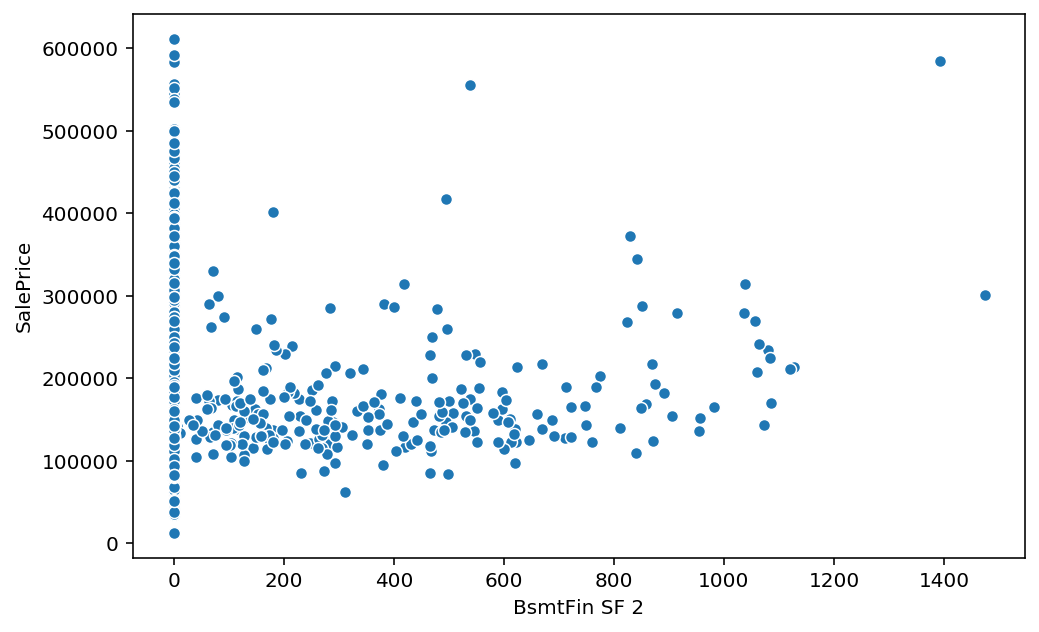

In [167]:
# BsmtFin SF 2
plt.figure(figsize=(8, 5))
sns.scatterplot(x="BsmtFin SF 2", y="SalePrice", data=df_eda);

In [168]:
df_eda["BsmtFin SF 2"].corr(df_eda["SalePrice"], method="pearson")

# A poor correlation with sale price

0.0164355019079674

In [169]:
df_eda.drop(["BsmtFin Type 2", "BsmtFin SF 2"], axis=1, inplace=True)

#### Comments:
- The "BsmtFin Type 2" and "BsmtFin SF2" are related variables.
- Different values under the "BsmtFin Type 2" feature did not exhibit noticeable difference in median prices.
- In addition, there is not correlation between the area size "BsmtFin SF2" with sale price.
- Therefore, both these features will be dropped from the subsequent analysis.

### 5.36) Total Bsmt SF: Total square feet of basement area

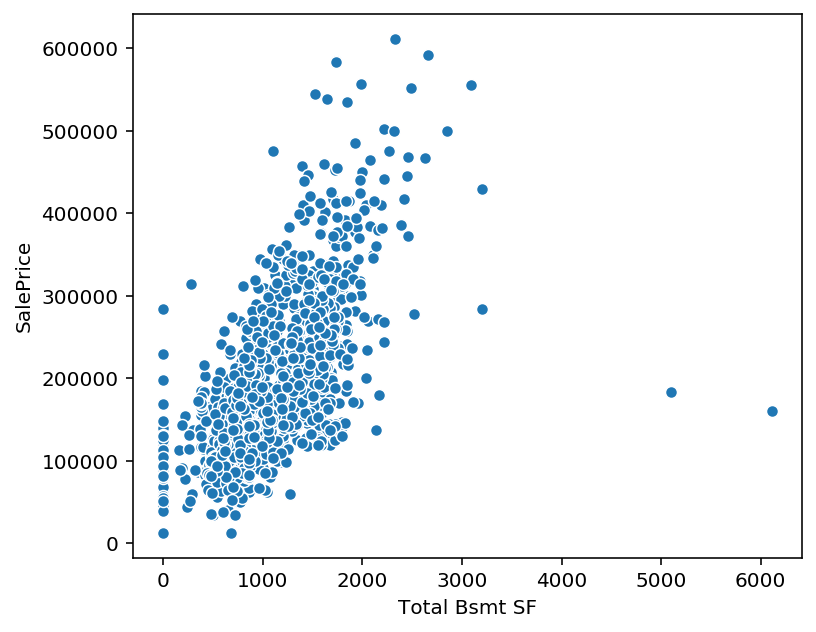

In [170]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Total Bsmt SF", y="SalePrice", data=df_eda);

In [171]:
df_eda["Total Bsmt SF"].corr(df_eda["SalePrice"], method="pearson")

0.6293028934953867

#### Comments:
- The "Total Bsmt SF" feature exhibits a positive correlation with the sale price of the house.
- This feature will be used for our modelling.

### 5.37) Heating: Type of heating

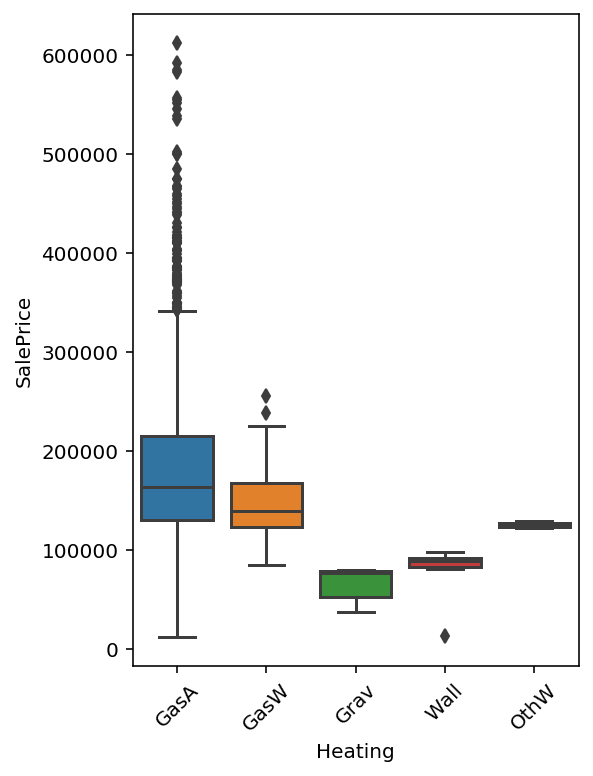

In [172]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Heating", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [173]:
df_eda["Heating"].value_counts()

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

In [174]:
df_eda.drop("Heating", axis=1, inplace=True)

#### Comments:
- There is a very high proportion of houses using "GasA" type heating (99%)
- As such, this feature does not provide any meaningful information and will be removed from the dataset.

### 5.38) Heating QC: Heating quality and condition

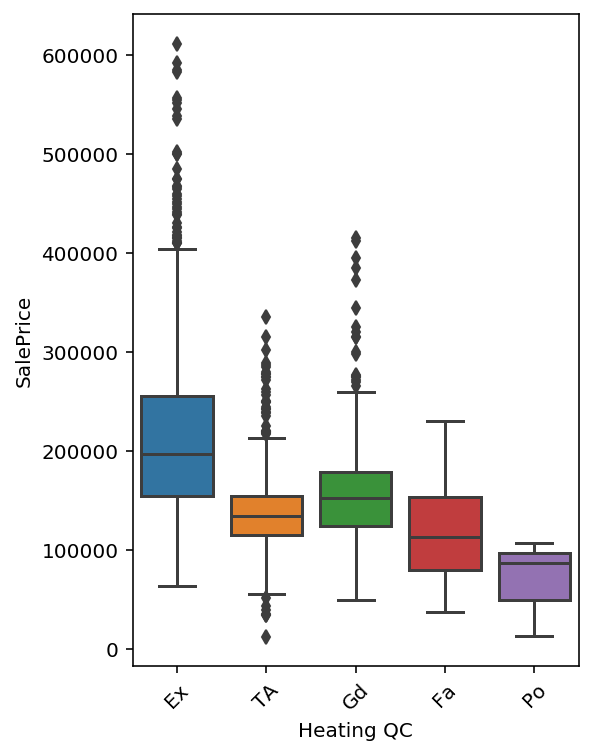

In [175]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Heating QC", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [176]:
df_eda["Heating QC"].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

#### Comments:
- Houses with excellent (Ex) heating appear to have a higher median sale price, as compared to houses with "Gd" or "TA" (average/typical) heating.
- This feature can be retained for further analysis.

### 5.39) Central Air: Central air conditioning

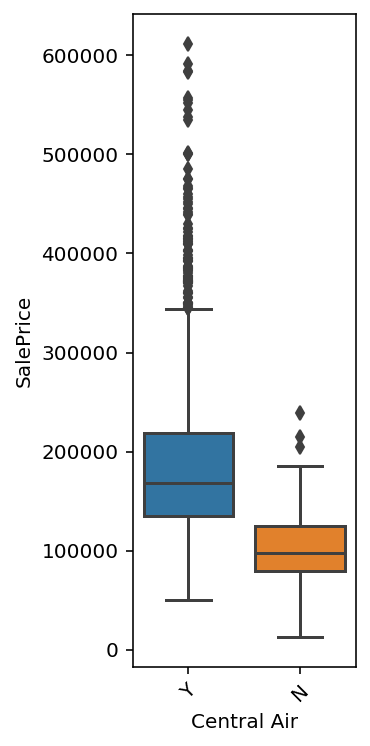

In [177]:
plt.figure(figsize=(2, 6))
ax = sns.boxplot(x="Central Air", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Comments:
- Houses with central air conditioning fetch a higher sale price, as compared to those without.
- This feature will be kept in our subsequent analysis.

### 5.40) Electrical: Electrical system

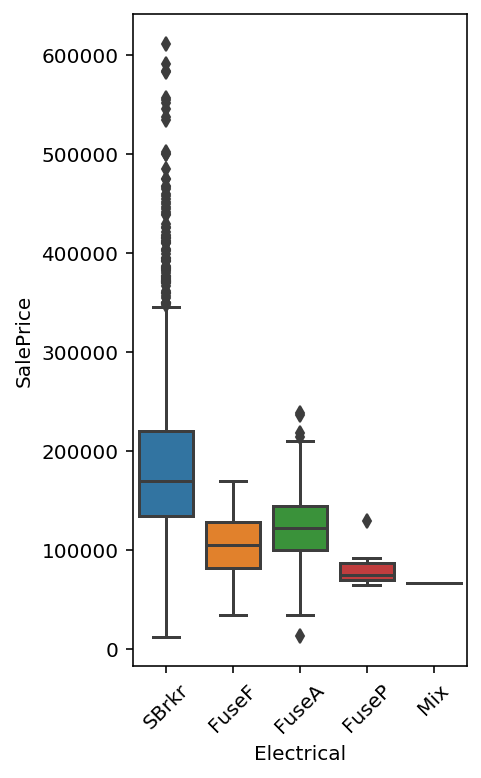

In [178]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Electrical", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [179]:
df_eda["Electrical"].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

#### Comments:
- More than 90% of houses have a standard electrical system, with the remainder having mostly average to fair electrical system.
- Houses with "SBrKr" have a higher sale price than others, thus this feature will be retained.

### 5.41) 1st Flr SF: First floor square feet
### 5.42) 2nd Flr SF: Second floor square feet
### 5.43) Gr Liv Area: Above grade (ground) living area square feet

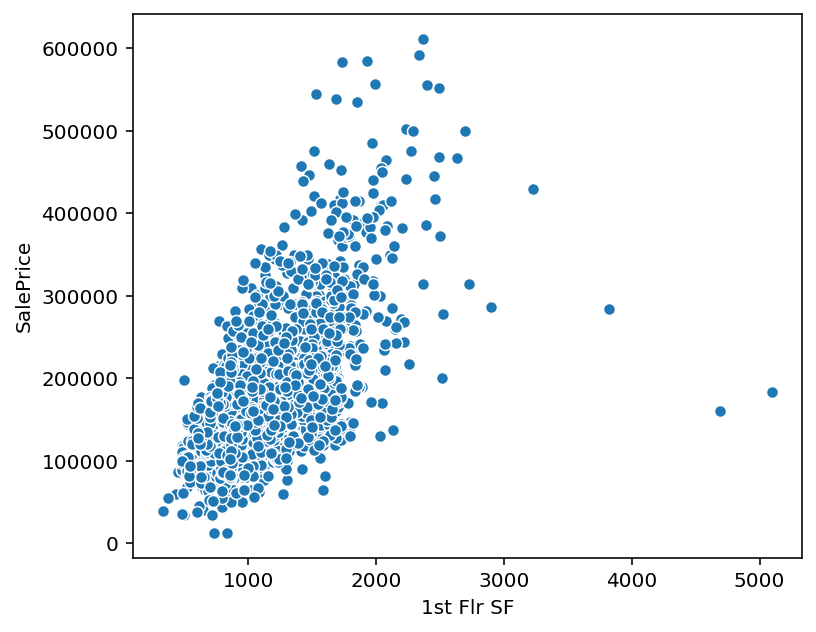

In [180]:
# 1st Flr SF

plt.figure(figsize=(6, 5))
sns.scatterplot(x="1st Flr SF", y="SalePrice", data=df_eda);

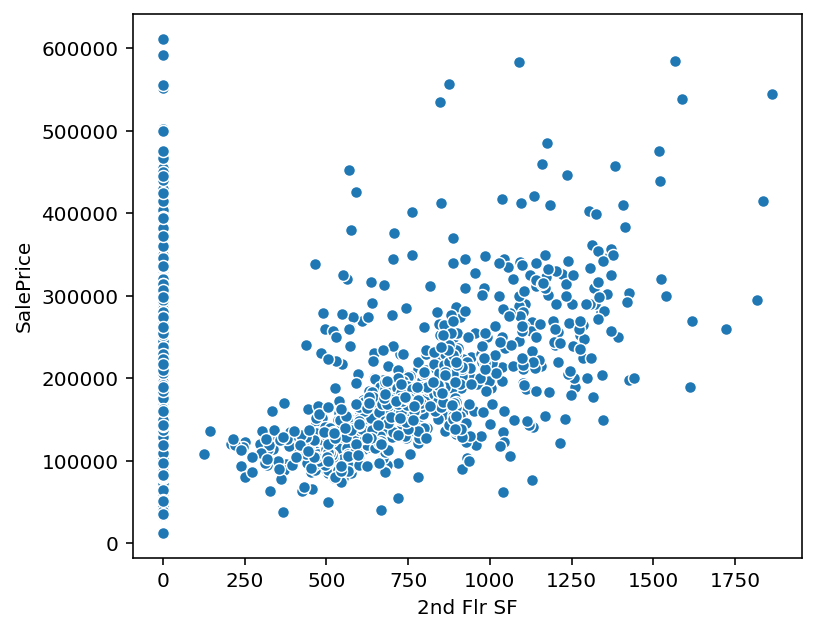

In [181]:
# 2nd Flr SF

plt.figure(figsize=(6, 5))
sns.scatterplot(x="2nd Flr SF", y="SalePrice", data=df_eda);

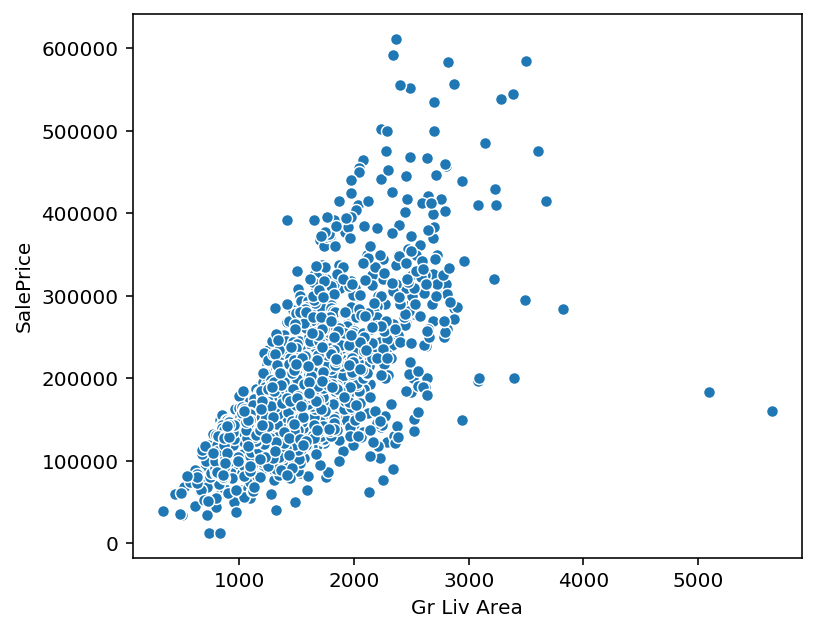

In [182]:
# Gr Liv Area

plt.figure(figsize=(6, 5))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df_eda);

In [183]:
print("The 1st floor correlation with sale price is " + 
      str(df_eda["1st Flr SF"].corr(df_eda["SalePrice"], method="pearson")))
print("The 2nd floor correlation with sale price is " + 
      str(df_eda["2nd Flr SF"].corr(df_eda["SalePrice"], method="pearson")))
print("The Gr Liv Area correlation with sale price is " + 
      str(df_eda["Gr Liv Area"].corr(df_eda["SalePrice"], method="pearson")))


The 1st floor correlation with sale price is 0.618486141053395
The 2nd floor correlation with sale price is 0.24845153013114246
The Gr Liv Area correlation with sale price is 0.6970384443056636


In [184]:
# Calculating the sum of 1st + 2nd floor area

df_total_sqft = pd.DataFrame(df_eda["1st Flr SF"] + df_eda["2nd Flr SF"])

In [185]:
# Calculating to see if the "Gr Liv Area" == "1st Flr SF" + "2nd Flr SF"

similar = 0
different = 0

for i in df_eda.index:
    if df_total_sqft[0][i] == df_eda["Gr Liv Area"][i]:
        similar += 1
    else:
        different += 1
        
print(f"The number of similar values is {similar}, while the number of different values is {different}.")

The number of similar values is 2018, while the number of different values is 33.


#### Comments:
- The Gr Liv Area is a very close match to the sum of "1st Flr SF" and "2nd Flr SF" values.
- It is also found that the Gr Liv Area is postively correlated with the housing sale price.
- Therefore, Gr Liv Area can be used to represent all three variables.
- "1st Flr SF" and "2nd Flr SF" features will be dropped.

In [186]:
df_eda.drop(["1st Flr SF", "2nd Flr SF"], axis=1, inplace=True)

### 5.44) Low Qual Fin SF: Low quality finished square feet (all floors)

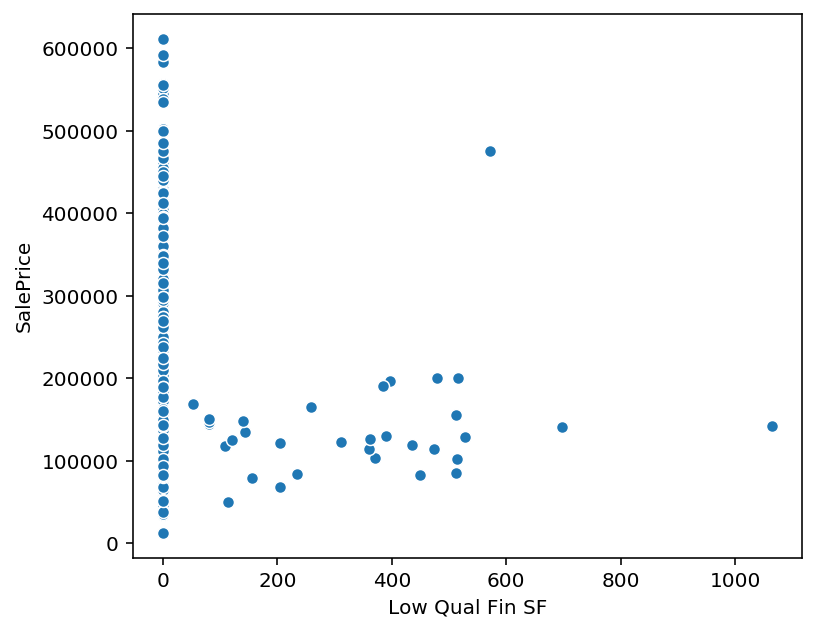

In [187]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Low Qual Fin SF", y="SalePrice", data=df_eda);

In [188]:
df_eda["Low Qual Fin SF"].corr(df_eda["SalePrice"], method="pearson")

-0.04159430329864864

#### Comments:
- This feature has no correlation with the sale price.
- The column will be dropped from the dataset.

In [189]:
df_eda.drop(["Low Qual Fin SF"], axis=1, inplace=True)

### 5.45) Bsmt Full Bath: Basement full bathrooms
### 5.46) Bsmt Half Bath: Basement half bathrooms

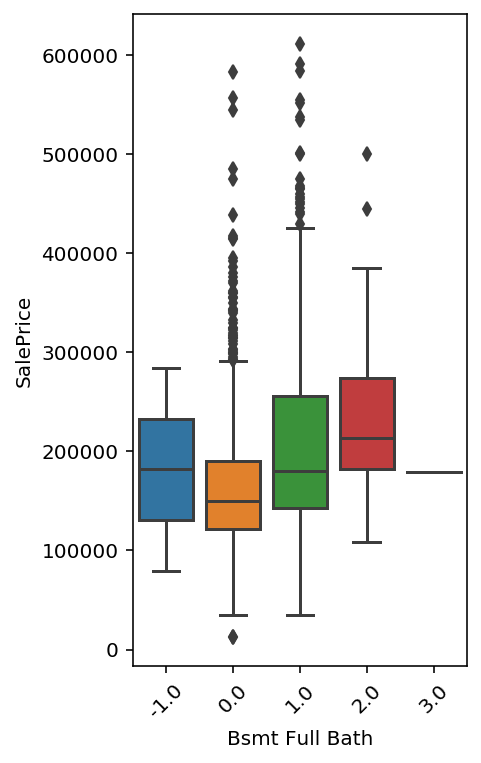

In [190]:
# Bsmt Full Bath

plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Bsmt Full Bath", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [191]:
# Bsmt Full Bath

df_eda["Bsmt Full Bath"].value_counts()

 0.0    1200
 1.0     824
 2.0      23
 3.0       2
-1.0       2
Name: Bsmt Full Bath, dtype: int64

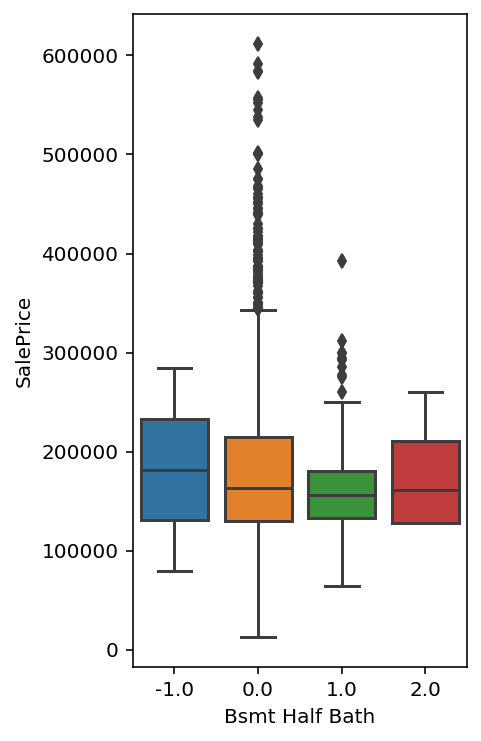

In [192]:
# Bsmt Half Bath

plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Bsmt Half Bath", y="SalePrice", data=df_eda);

In [193]:
# Bsmt Half Bath

df_eda["Bsmt Half Bath"].value_counts()

 0.0    1923
 1.0     122
 2.0       4
-1.0       2
Name: Bsmt Half Bath, dtype: int64

#### Comments:
- Houses with a basement full bath appear to have a higher sale price than basements without.
- This feature "Bsmt Full Bath" can thus be kept in our dataset.
- On the otherhand, a majority of houses do not have a basement half-bath, and even those with a half-bath did not exhibit a higher sale price.
- This feature "Bsmt Half Bath" can thus be removed.

In [194]:
df_eda.drop(["Bsmt Half Bath"], axis=1, inplace=True)

### 5.47) Full Bath: Full bathrooms above grade
### 5.48) Half Bath: Half baths above grade

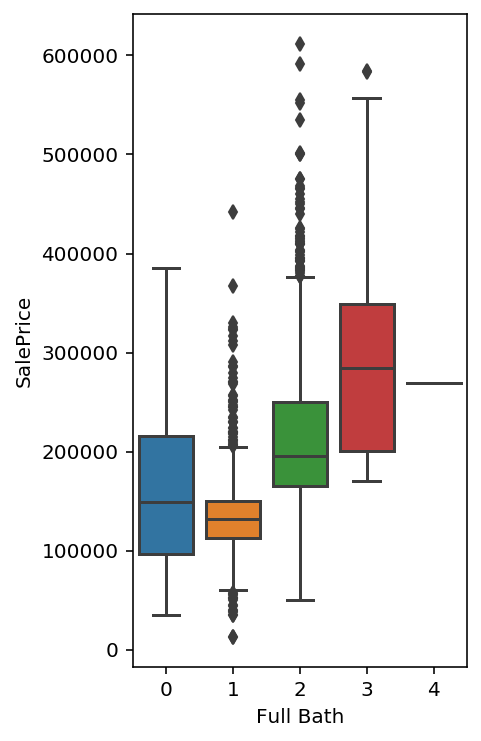

In [195]:
# Full Bath

plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Full Bath", y="SalePrice", data=df_eda)

In [196]:
# Full Bath

df_eda["Full Bath"].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64

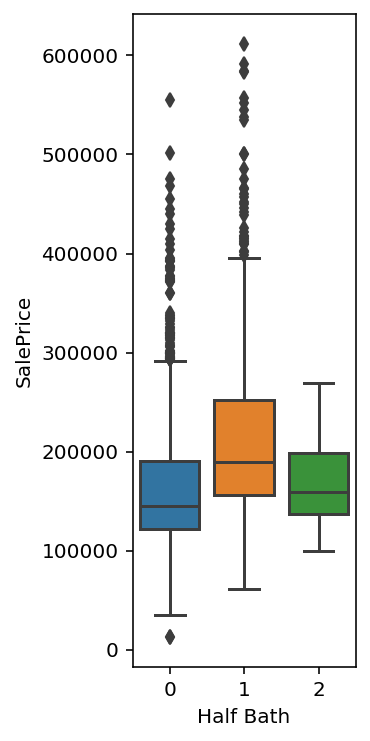

In [197]:
# Half Bath

plt.figure(figsize=(2, 6))
ax = sns.boxplot(x="Half Bath", y="SalePrice", data=df_eda)

In [198]:
# Half Bath

df_eda["Half Bath"].value_counts()

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

#### Comments:
- Houses with a increased number of full baths have a higher sale price. This feature "Full Bath" should thus be kept.
- Houses with 1 half-bath appear to have a slightly higher sale price. This feature "Half Bath" should also be kept.

### 5.49) Bedroom AbvGr: Number of bedrooms above basement level
### 5.50) Tot Rms AbvGrd: Total rooms above grade (does not include bathrooms)

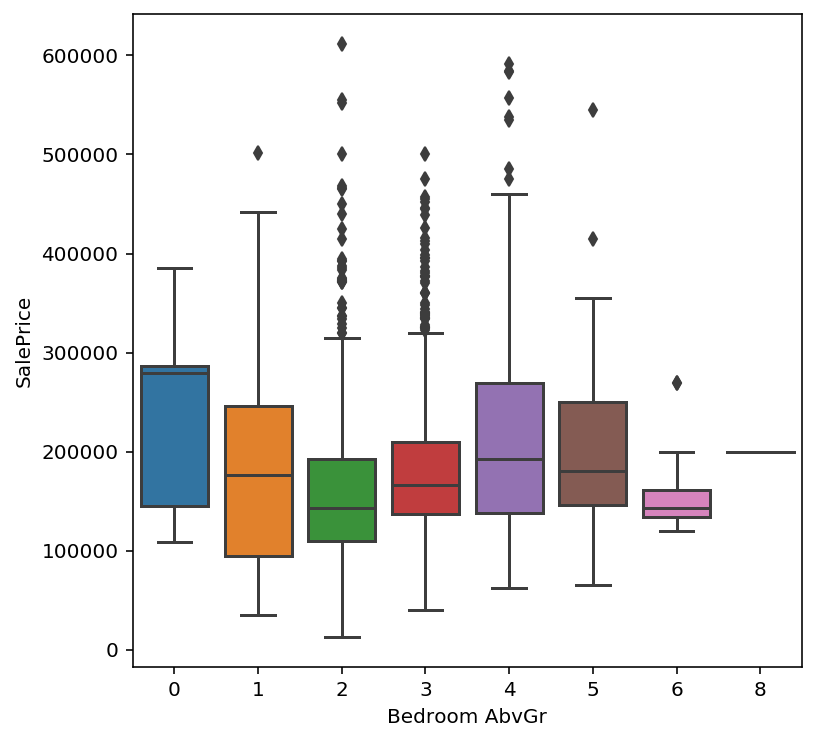

In [199]:
# Bedroom AbvGr

plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="Bedroom AbvGr", y="SalePrice", data=df_eda)

In [200]:
# Bedroom AbvGr

df_eda["Bedroom AbvGr"].value_counts()

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64

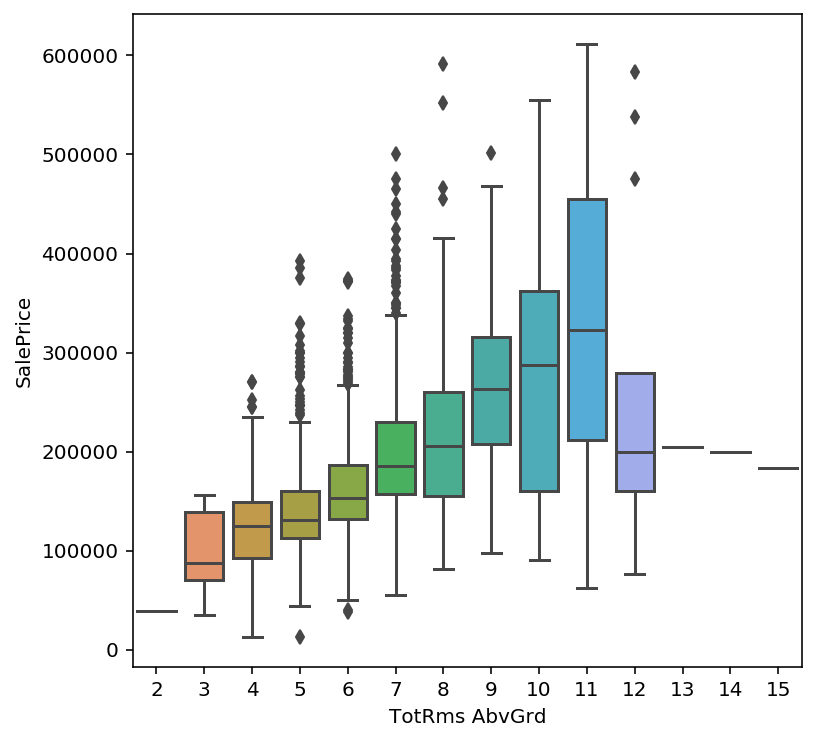

In [201]:
# TotRms Abv Grd

plt.figure(figsize=(6, 6))
ax = sns.boxplot(x="TotRms AbvGrd", y="SalePrice", data=df_eda)

In [202]:
df_eda["TotRms AbvGrd"].value_counts()

6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
15      1
13      1
14      1
2       1
Name: TotRms AbvGrd, dtype: int64

#### Comments:
- The number of bedrooms above ground does not appear to greatly affect the sale price.
- However, any increase in the total number of rooms in the house will result in a higher median sale price.
- As "Bedroom AbvGr" is a subset of "TotRms AbvGrd", it would be better to just use the "TotRms AbvGrd" feature.
- The "Bedroom AbvGr" feature would thus be dropped.

In [203]:
df_eda.drop(["Bedroom AbvGr"], axis=1, inplace=True)

### 5.51) Kitchen AbvGr: Number of kitchens

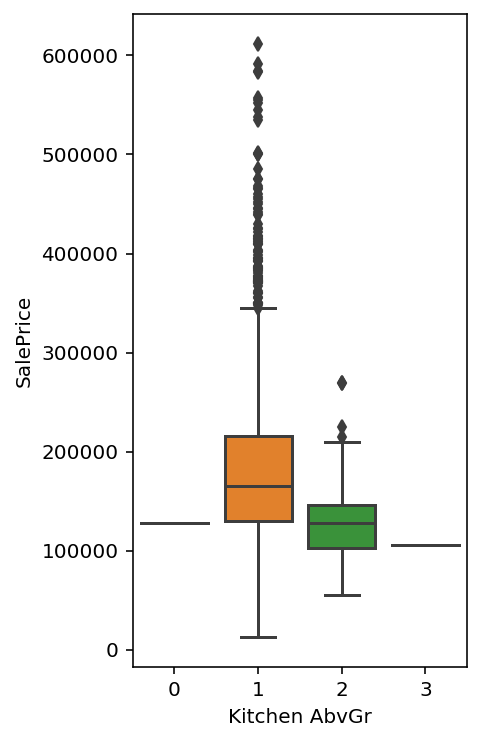

In [204]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Kitchen AbvGr", y="SalePrice", data=df_eda)

In [205]:
df_eda["Kitchen AbvGr"].value_counts()

1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64

#### Comments:
- The large majority of houses have 1 kitchen, with a minority having 2 kitchens.
- Houses with 2 kitchens appear to fetch a lower sale price, as compared to single kitchen houses.
- This feature essentially becomes a binary-choice, and may be retained for further analysis.

### 5.52) Kitchen Qual: Kitchen quality

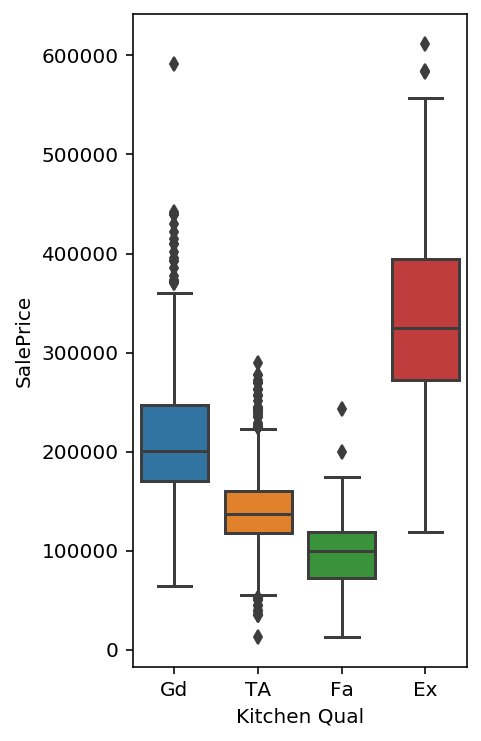

In [206]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Kitchen Qual", y="SalePrice", data=df_eda)

In [207]:
df_eda["Kitchen Qual"].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

#### Comments:
- Houses with "Gd" and "Ex" kitchen quality results in a higher sale price.
- This feature will thus be kept for downstream analysis.

### 5.53) Functional: Home functionality rating

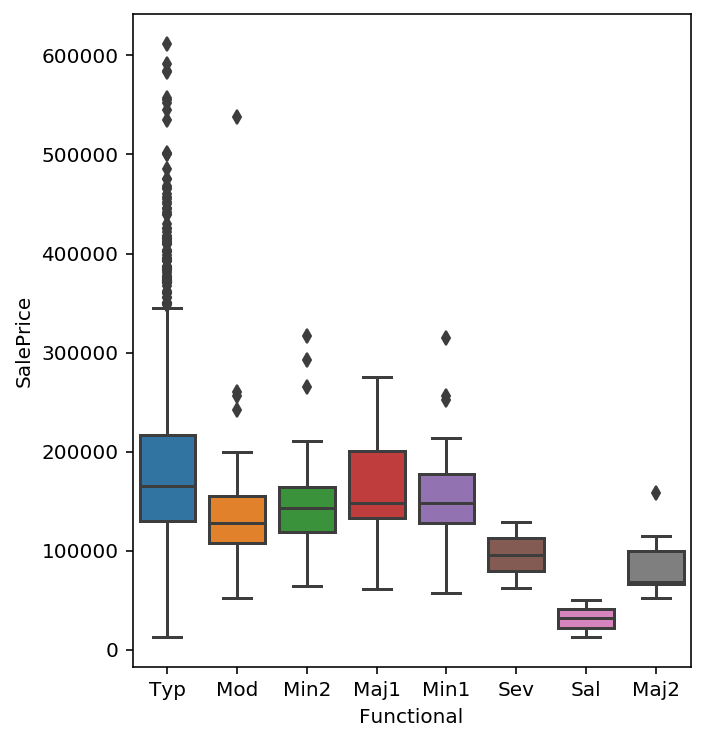

In [208]:
plt.figure(figsize=(5, 6))
ax = sns.boxplot(x="Functional", y="SalePrice", data=df_eda)

In [209]:
df_eda["Functional"].value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

#### Comments:
- A majority of houses have "Typ" (typical) functionality, but the sale price remains approximately at the same level.
- Houses which have major defects, or are salvage only have a much lower sale price.
- This feature would be retained as the house functional state is expected to affect sale price.

### 5.54) Fireplaces: Number of fireplaces
### 5.55) Fireplace Qu: Fireplace quality

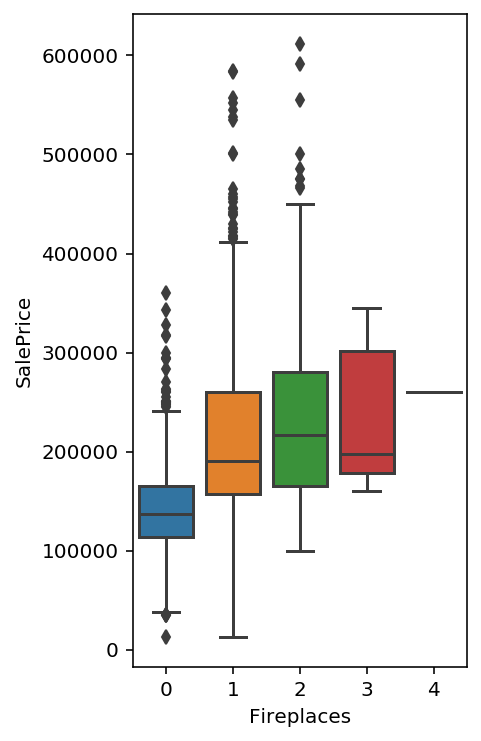

In [210]:
# Fireplaces

plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Fireplaces", y="SalePrice", data=df_eda)

In [211]:
# Fireplaces

df_eda["Fireplaces"].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

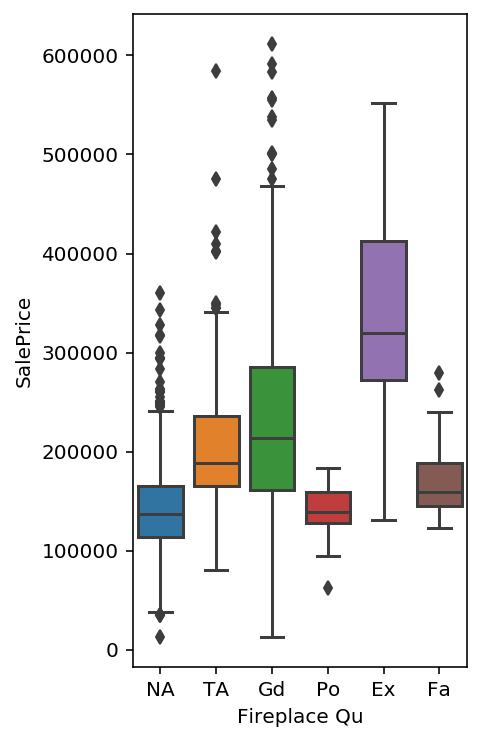

In [212]:
# Fireplace Qu

plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Fireplace Qu", y="SalePrice", data=df_eda)

In [213]:
# Fireplace Qu

df_eda["Fireplace Qu"].value_counts()

NA    1000
Gd     523
TA     407
Fa      59
Po      31
Ex      31
Name: Fireplace Qu, dtype: int64

#### Comments:
- Houses with a fireplace appear to fetch a higher sale price than house which do not have a fireplace.
- Houses with average or better fireplace quality also fetches a higher sale price.
- Therefore, both features will be kept in our dataset.

### 5.56) Garage Type: Garage location

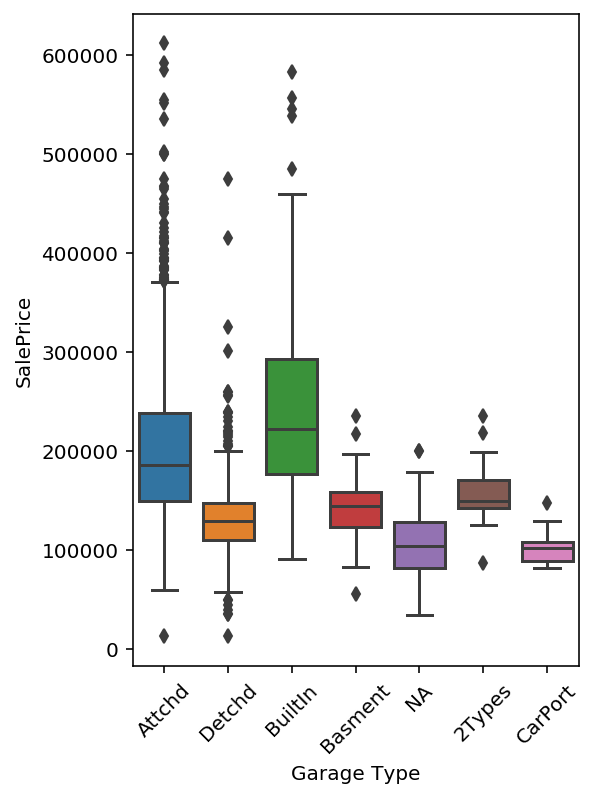

In [214]:
plt.figure(figsize=(4, 6))
ax = sns.boxplot(x="Garage Type", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [215]:
df_eda["Garage Type"].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

#### Comments:
- Houses with an "Attchd" and "BuiltIn" garage fetch a higher sale price.
- In contrast, house without a garage have a lower sale price.
- This feature "Garage Type" will be kept in our dataset.

### 5.57) Garage Yr Blt: Year garage was built

In [216]:
# An error entry was found in the "Garage Yr Blt" feature. Wrong year (23rd century year). Row 1699

df_eda[df_eda["Garage Yr Blt"] > 2019.00].filter(regex="Yr")

Garage Yr Blt  Yr Sold
1699         2207.0     2007

In [217]:
# This value would be changed to 0.0 to reflect its unknown construction date

df_eda["Garage Yr Blt"].iloc[1699] = 0.0

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [218]:
df_eda.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Land Contour',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       'Electrical', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold',

In [219]:
# The "Garage Yr Blt" has now been corrected.

df_eda["Garage Yr Blt"].describe()

count    2051.000000
mean     1867.649927
std       455.942847
min         0.000000
25%      1957.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

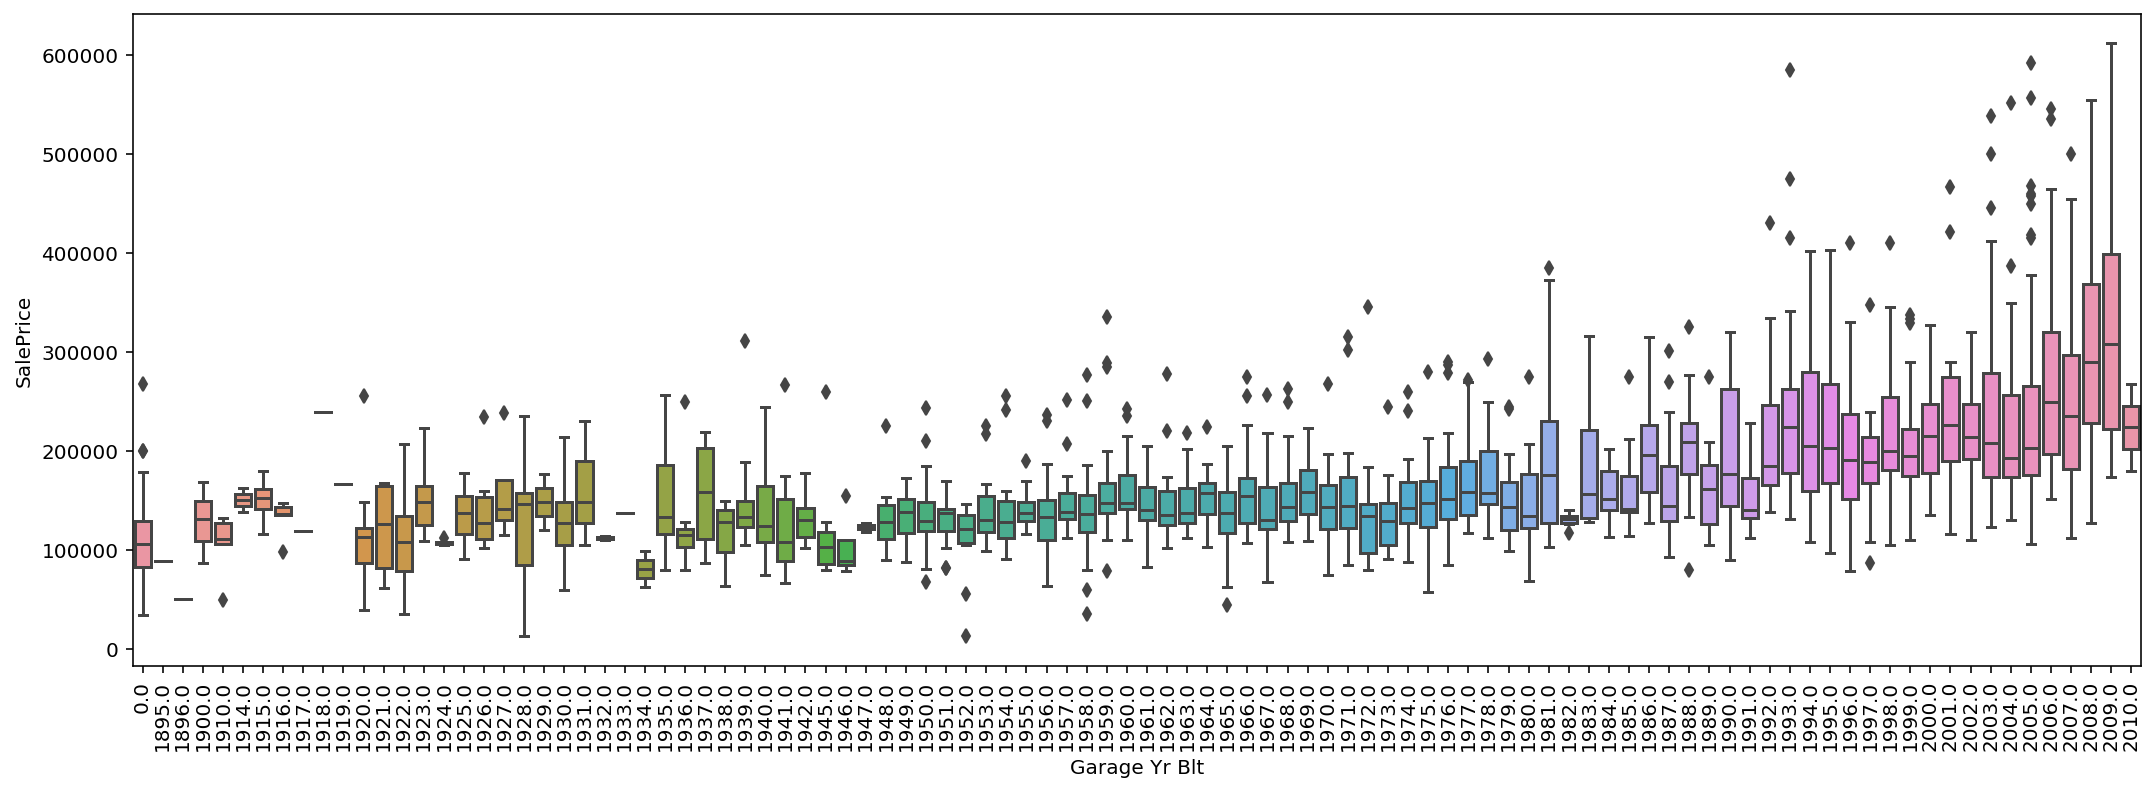

In [220]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(x="Garage Yr Blt", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

#### Comments:
- Garage built after 1990 generally have a higher sale price than garaged built before 1990.
- This feature "Garage Yr Blt" would thus be retained within the dataset.

### 5.58) Garage Finish: Interior finish of the garage

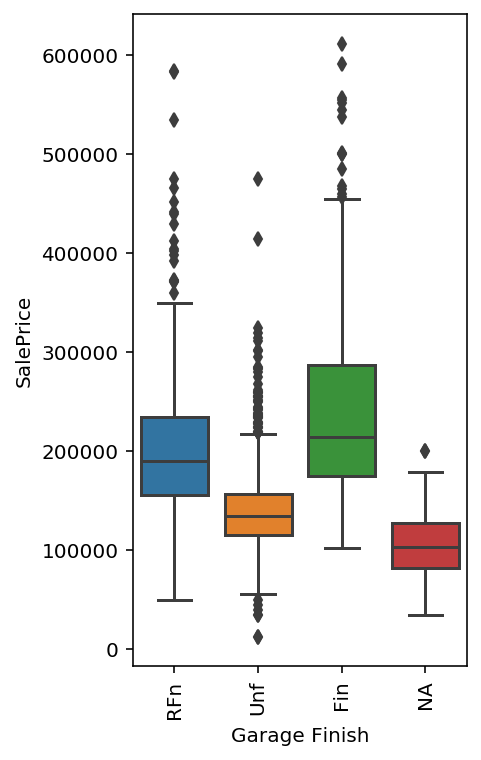

In [221]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Garage Finish", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [222]:
df_eda["Garage Finish"].value_counts()

Unf    850
RFn    579
Fin    509
NA     113
Name: Garage Finish, dtype: int64

#### Comments:
- The type of "Garage Finish" will impact the house sale price.
- This feature will be retained.

### 5.59) Garage Cars: Size of garage in car capacity

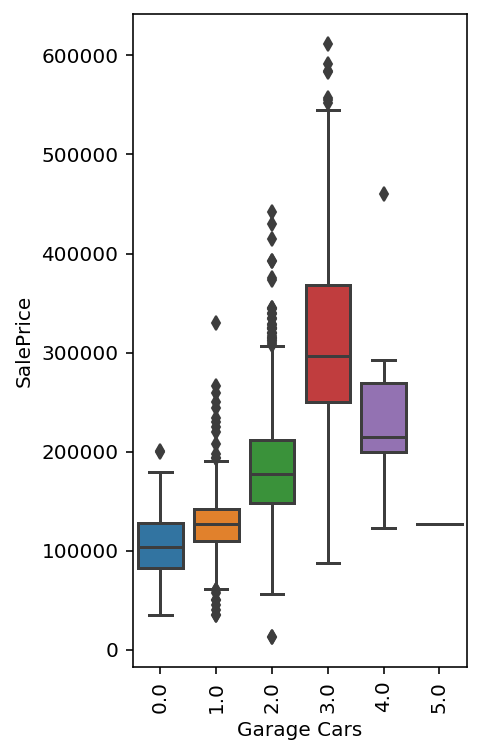

In [223]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Garage Cars", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [224]:
df_eda["Garage Cars"].value_counts()

2.0    1137
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

#### Comments:
- The number of cars which can fit into a garage appears to influence the sale price.
- This feature will be included.

### 5.60) Garage Area: Size of garage in square feet

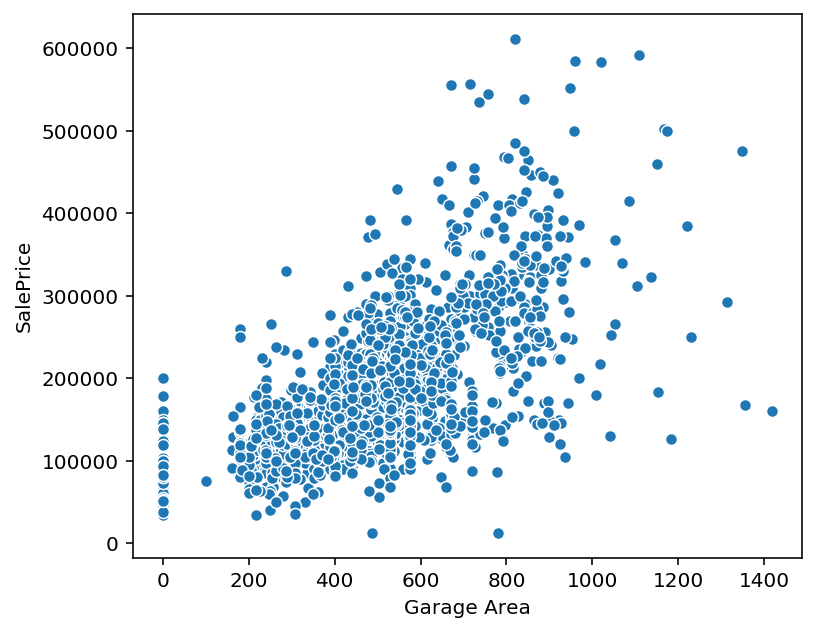

In [225]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Garage Area", y="SalePrice", data=df_eda);

In [226]:
df_eda["Garage Area"].corr(df_eda["SalePrice"], method="pearson")

0.6502464186723272

#### Comment:
- The size of the "Garage Area" demonstrates a positive correlation with the sale price of the house.
- This feature will be kept within our dataset.

### 5.61) Garage Qual: Garage quality

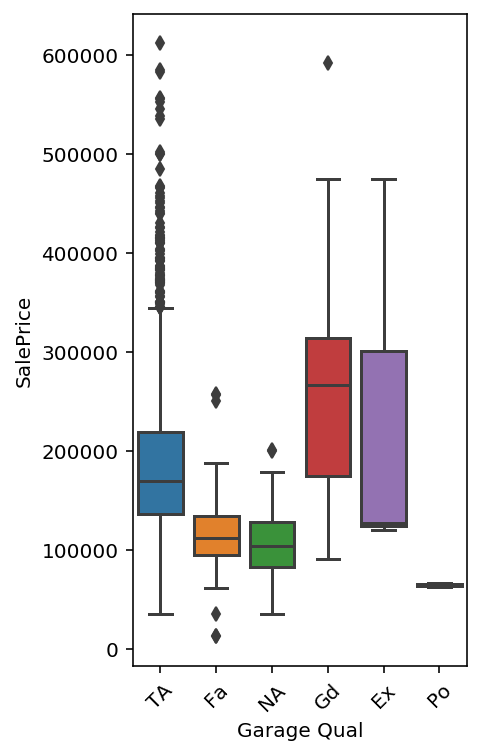

In [227]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Garage Qual", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [228]:
df_eda["Garage Qual"].value_counts()

TA    1833
NA     113
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

#### Comments:
- Houses with "Gd" or "Ex" garage conditions fetch a higher sale price, while houses with below average garage condition fetch a lower sale price.
- This feature will be retained in the dataset.

### 5.62) Garage Cond: Garage condition

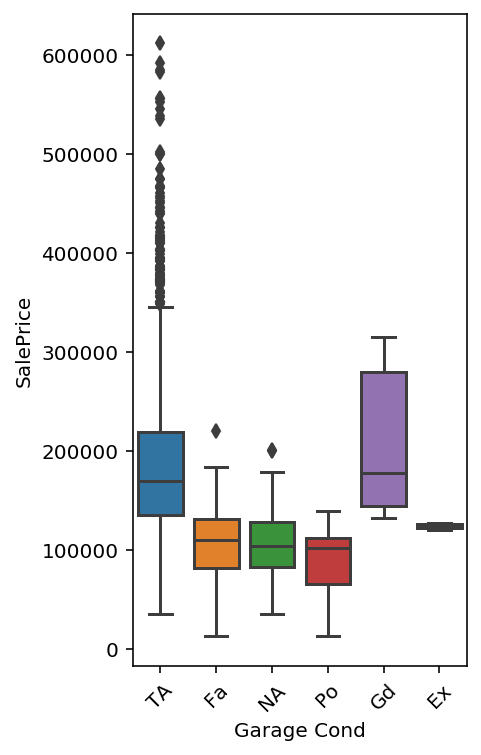

In [229]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Garage Cond", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [230]:
df_eda["Garage Cond"].value_counts()

TA    1869
NA     113
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

#### Comment:
- A large majority of values within the "Garage Cond" are "TA" (typical/average), or "NA" (no garage) (>95%).
- As such, this feature would not provide additional meaningful information.
- The "Garage Cond" feature will be removed.

In [231]:
df_eda.drop(["Garage Cond"], axis=1, inplace=True)

### 5.63) Paved Drive: Paved driveway

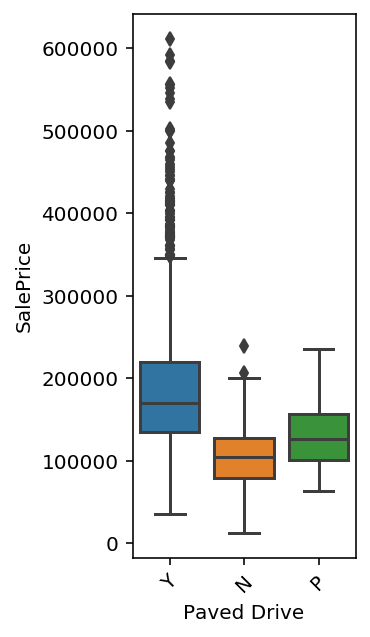

In [232]:
plt.figure(figsize=(2, 5))
ax = sns.boxplot(x="Paved Drive", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [233]:
df_eda["Paved Drive"].value_counts()

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

#### Comments:
- Houses with a paved driveway "Y" fetches a higher sale price than those without "N".
- This "Paved Drive" feature will be included in our dataset.

### 5.64) Wood Deck SF: Wood deck area in square feet

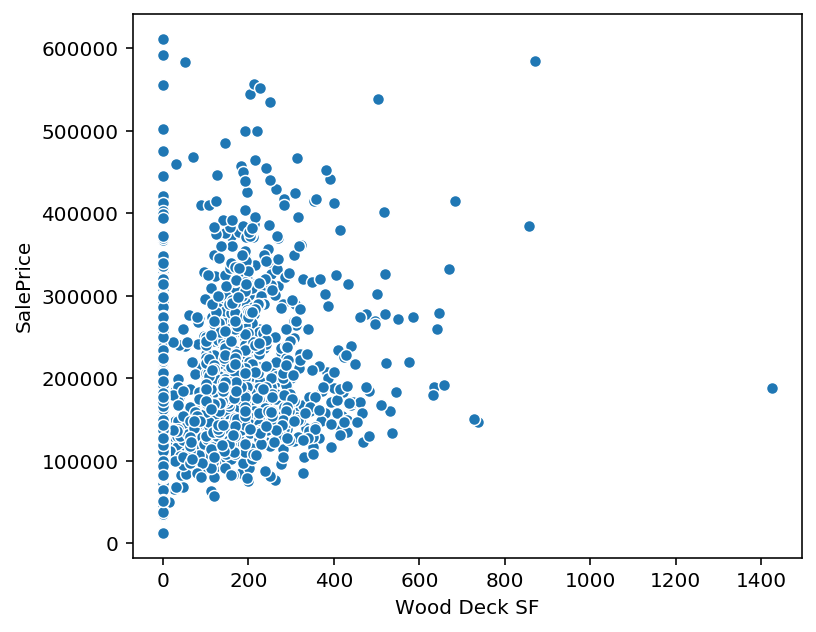

In [234]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Wood Deck SF", y="SalePrice", data=df_eda);

In [235]:
df_eda["Wood Deck SF"].corr(df_eda["SalePrice"], method="pearson")

0.3264897021896561

#### Comments:
- The feature "Wood Deck SF" is weakly positively correlated with the "SalePrice".
- This feature would thus be removed from the dataset

In [236]:
df_eda.drop(["Wood Deck SF"], axis=1, inplace=True)

### 5.65) Open Porch SF: Open porch area in square feet

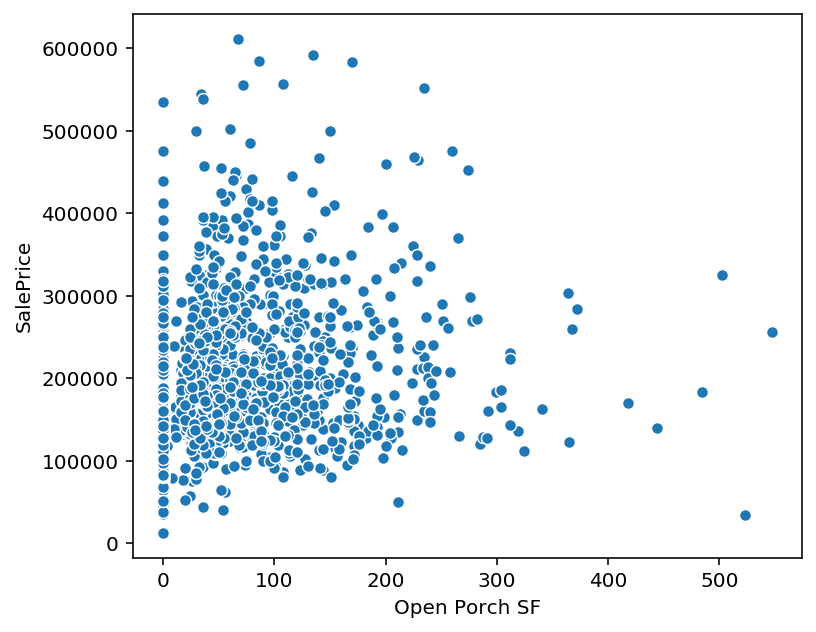

In [237]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Open Porch SF", y="SalePrice", data=df_eda);

In [238]:
df_eda["Open Porch SF"].corr(df_eda["SalePrice"], method="pearson")

0.3334760297920544

#### Comments:
- The feature "Open Porch SF" is weakly positively correlated with the "SalePrice".
- This feature will be removed from the dataset

In [239]:
df_eda.drop(["Open Porch SF"], axis=1, inplace=True)

### 5.66) Enclosed Porch: Enclosed porch area in square feet

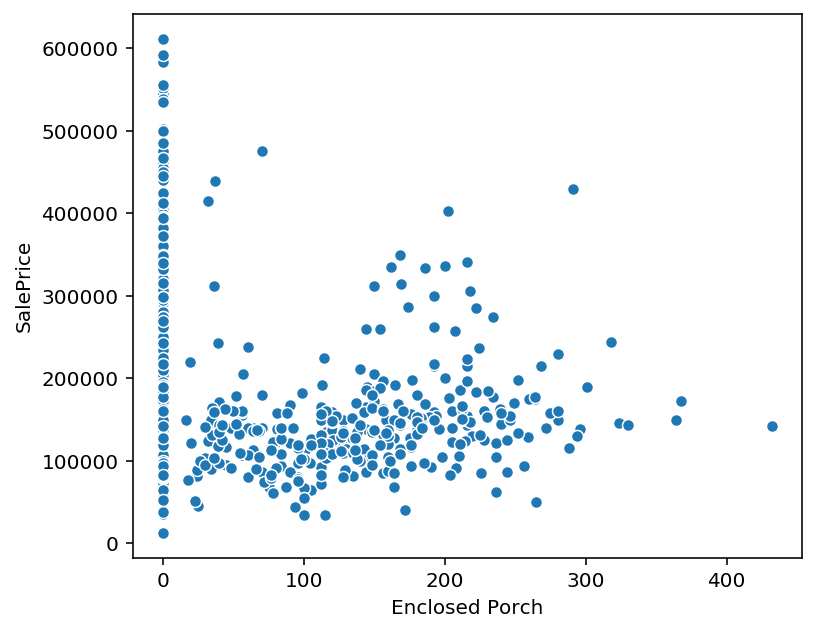

In [240]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Enclosed Porch", y="SalePrice", data=df_eda);

In [241]:
df_eda["Enclosed Porch"].corr(df_eda["SalePrice"], method="pearson")

-0.13565649182472106

#### Comments:
- The feature "Enclosed Porch" has no correlation with the "SalePrice".
- This feature will be removed from the dataset

In [242]:
df_eda.drop(["Enclosed Porch"], axis=1, inplace=True)

### 5.67) 3Ssn Porch: Three season porch area in square feet

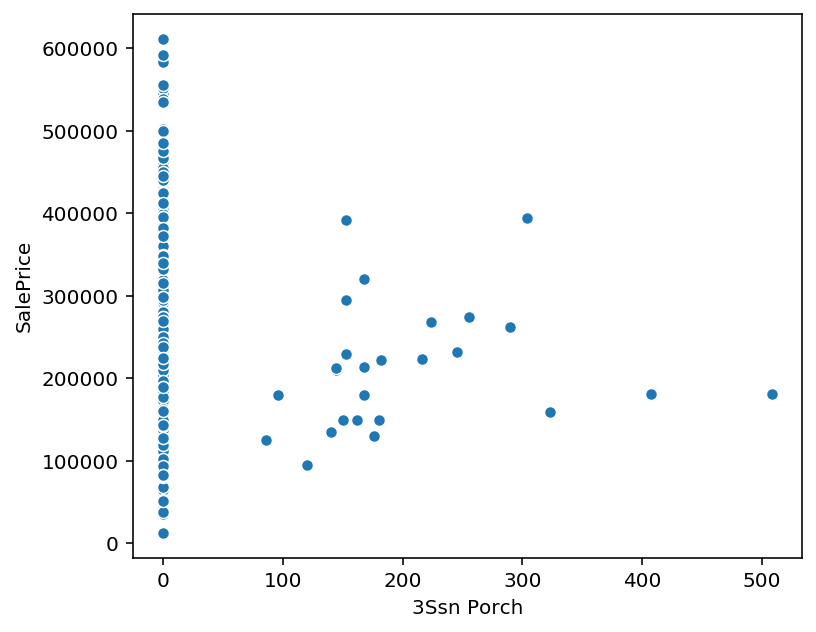

In [243]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="3Ssn Porch", y="SalePrice", data=df_eda);

In [244]:
df_eda["3Ssn Porch"].corr(df_eda["SalePrice"], method="pearson")

0.04873185398349616

#### Comments:
- The feature "3Ssn Porch" has no correlation with the "SalePrice".
- This feature will be removed from the dataset

In [245]:
df_eda.drop(["3Ssn Porch"], axis=1, inplace=True)

### 5.68) Screen Porch: Screen porch area in square feet

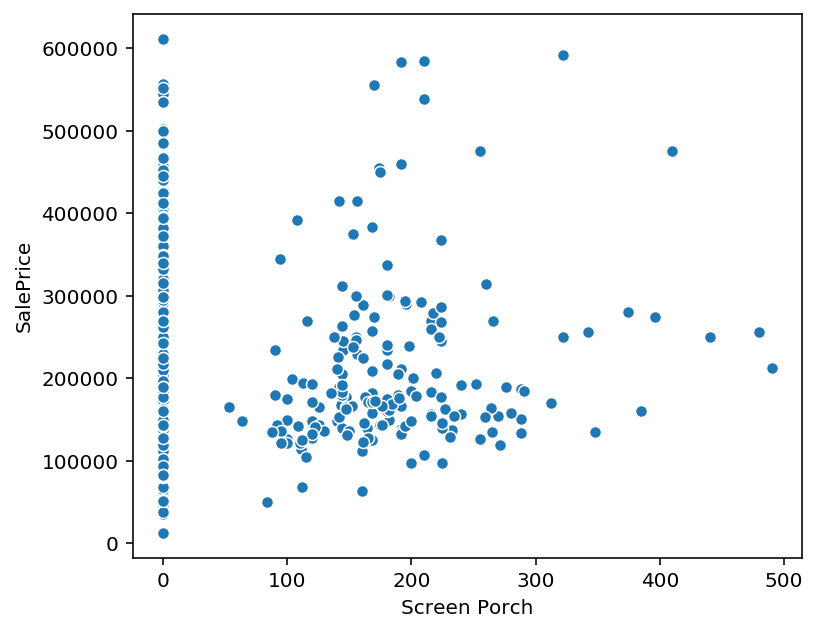

In [246]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Screen Porch", y="SalePrice", data=df_eda);

In [247]:
df_eda["Screen Porch"].corr(df_eda["SalePrice"], method="pearson")

0.13458135196225848

#### Comments:
- The feature "Screen Porch" has no correlation with the "SalePrice".
- This feature will be removed from the dataset

In [248]:
df_eda.drop(["Screen Porch"], axis=1, inplace=True)

### 5.69) Pool Area: Pool area in square feet

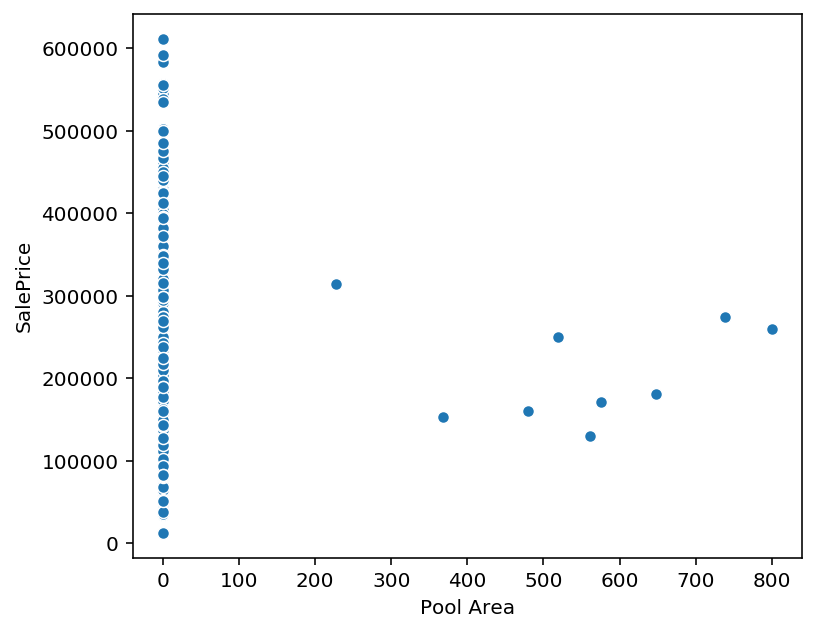

In [249]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Pool Area", y="SalePrice", data=df_eda);

In [250]:
df_eda["Pool Area"].corr(df_eda["SalePrice"], method="pearson")

0.023106317157886826

#### Comments:
- The feature "Pool Area" has no correlation with the "SalePrice".
- This feature will be removed from the dataset

In [251]:
df_eda.drop(["Pool Area"], axis=1, inplace=True)

### 5.70) Pool QC: Pool quality

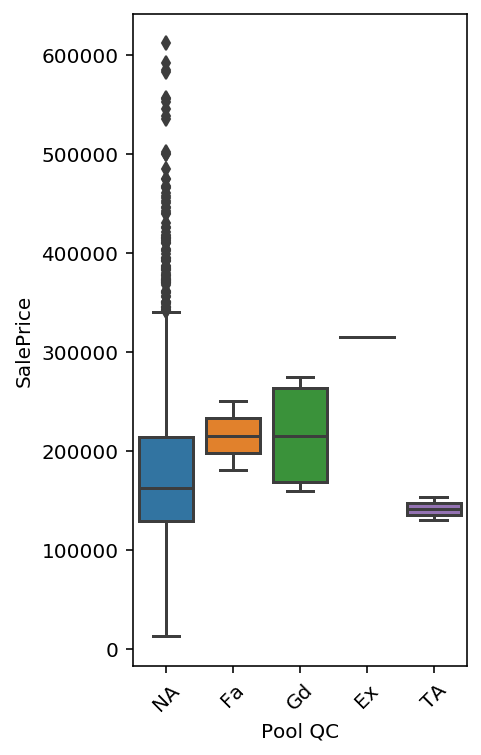

In [252]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Pool QC", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [253]:
df_eda["Pool QC"].value_counts()

NA    2042
Gd       4
Fa       2
TA       2
Ex       1
Name: Pool QC, dtype: int64

#### Comments:
- A large majority of the houses do not have a pool, as such, this feature does not add value towards our analysis.
- This "Pool QC" feature will be removed

In [254]:
df_eda.drop(["Pool QC"], axis=1, inplace=True)

### 5.71) Fence: Fence quality

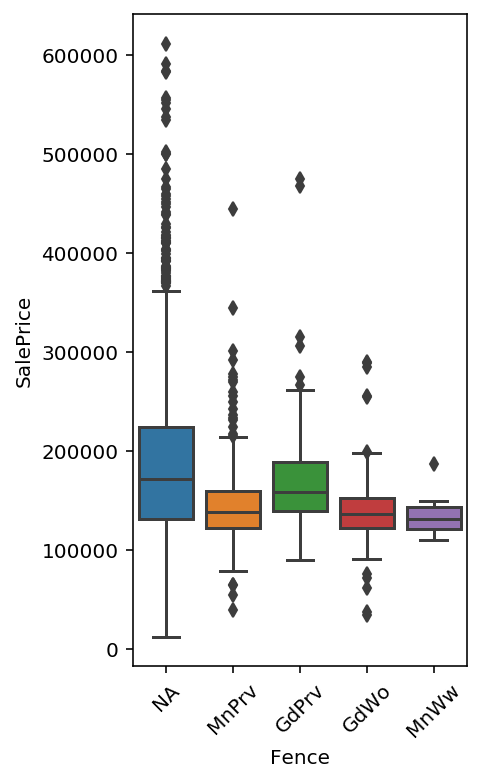

In [255]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Fence", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [256]:
df_eda["Fence"].value_counts()

NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

#### Comments:
- From this feature, a majority of values are "NA", which means these houses do not fences.
- In addition, meaningful values approximately fall within the same sale price region.
- As such, this feature "Fence" will be removed.

In [257]:
df_eda.drop(["Fence"], axis=1, inplace=True)

### 5.72) Misc Feature: Miscellaneous feature not covered in other categories

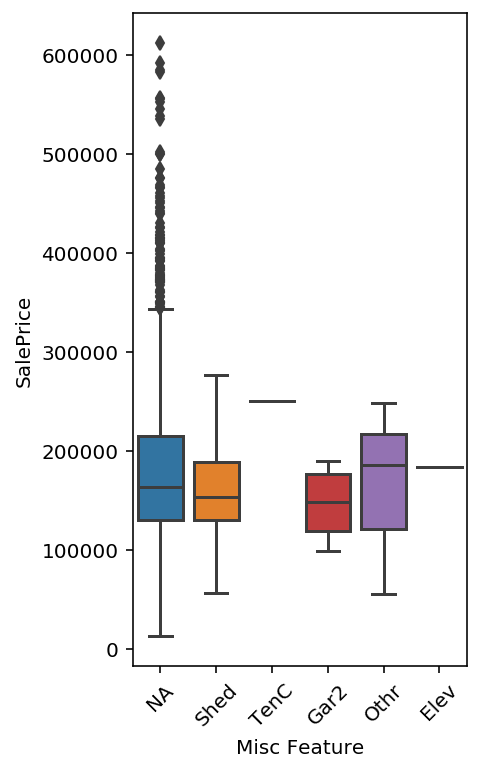

In [258]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Misc Feature", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [259]:
df_eda["Misc Feature"].value_counts()

NA      1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
Name: Misc Feature, dtype: int64

#### Comments:
- From this feature, a large majority of values are "NA", which means that these houses do not have miscellaneous features, this feature "Misc Feature" will be removed.

In [260]:
df_eda.drop(["Misc Feature"], axis=1, inplace=True)

### 5.73) Misc Val: Dollar value of miscellaneous feature

#### Comments:
- This "Misc Val" feature is related to the previous "Misc Feature".
- Therefore, this feature "Misc Val" will also be removed.

In [261]:
df_eda.drop(["Misc Val"], axis=1, inplace=True)

### 5.74) Mo Sold: Month Sold
### 5.75) Yr Sold: Year Sold

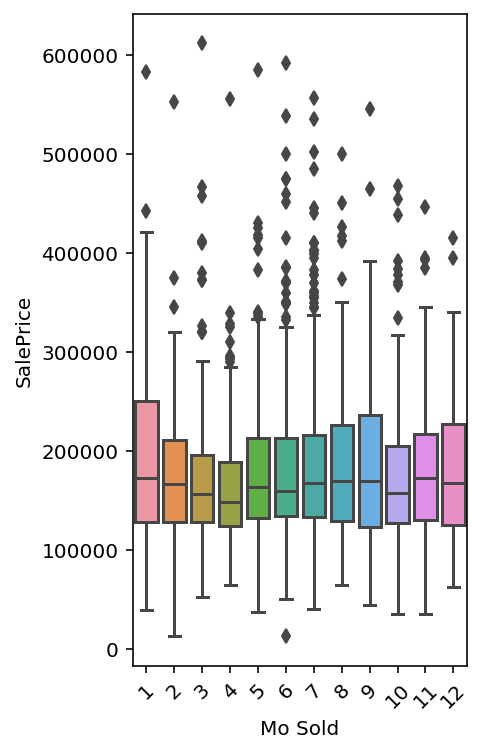

In [262]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Mo Sold", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

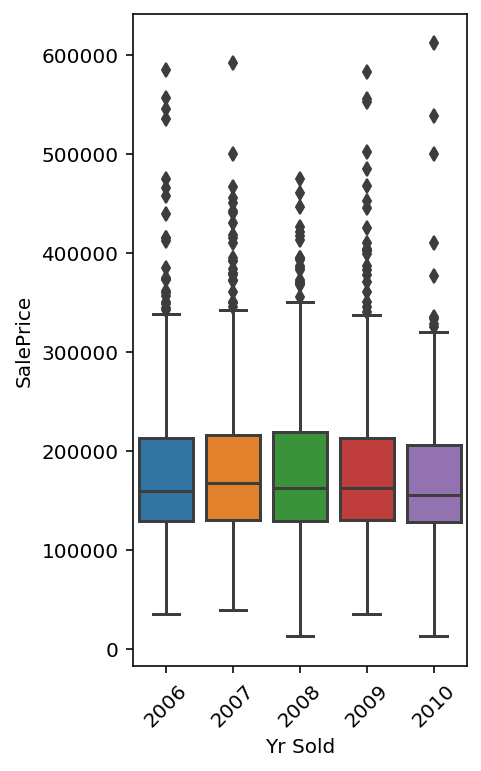

In [263]:
plt.figure(figsize=(3, 6))
ax = sns.boxplot(x="Yr Sold", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Comments:
- The "Mo Sold" and "Yr Sold" features do not show any visible impact on the sale price.
- These two features would thus be removed.

In [264]:
df_eda.drop(["Mo Sold", "Yr Sold"], axis=1, inplace=True)

### 5.76) Sale Type: Type of sale

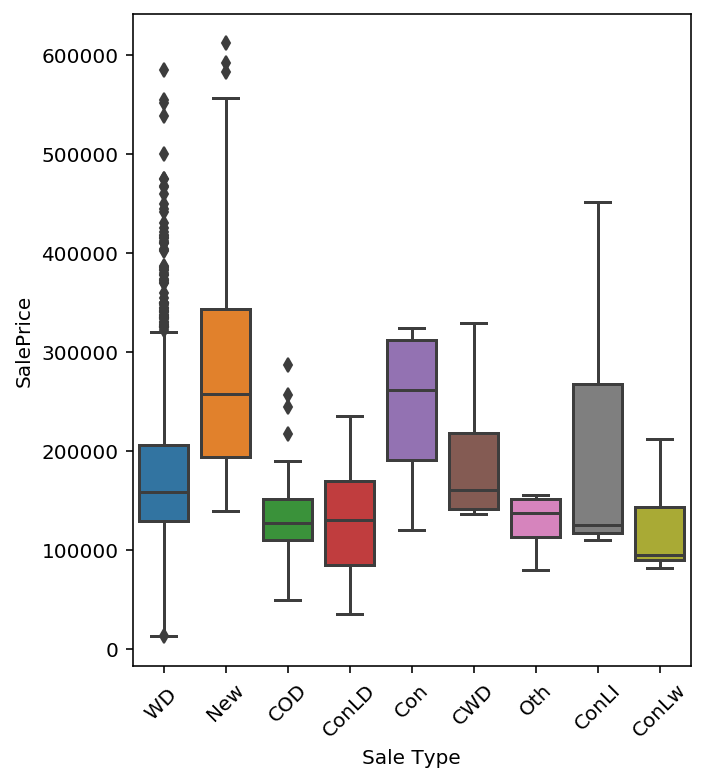

In [265]:
plt.figure(figsize=(5, 6))
ax = sns.boxplot(x="Sale Type", y="SalePrice", data=df_eda)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [266]:
df_eda["Sale Type"].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64

#### Comments:
- "New" houses which have just been constructed fetch a higher sale price.
- This feature "Sale Type" would thus be kept within the dataset.

### 5.77) Bsmt Unf SF: Unfinished square feet of basement area

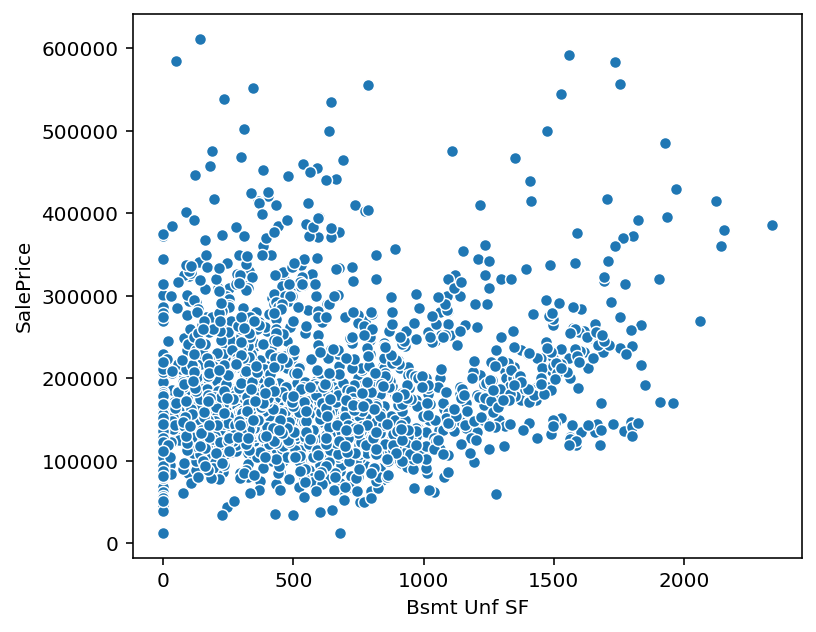

In [267]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Bsmt Unf SF", y="SalePrice", data=df_eda);

In [268]:
df_eda["Bsmt Unf SF"].corr(df_eda["SalePrice"], method="pearson")

0.19086239697720164

In [269]:
df_eda.drop(["Bsmt Unf SF"], axis=1, inplace=True)

#### Comments:
- The "Bsmt Unf SF" feature has a weak correlation with the overall sale price.
- This feature would thus be removed from the dataset.

### 5.78) Features to be used for Modelling.

In [270]:
df_eda.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Land Contour',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Paved Drive', 'Sale Type', 'SalePrice'],
      dtype='object')

In [271]:
df_train.shape

(2051, 80)

In [272]:
# 30 features have been trimmed during the EDA.

df_eda.shape

(2051, 50)

In [273]:
# Saving the EDA dataset

df_eda.to_csv("./datasets/train_clean_eda.csv")

### Continued in Part 2...